**Table of contents**<a id='toc0_'></a>    
- [DRACO - Milestone 2: Dataset exploration](#toc1_)    
  - [Importation of each datasets](#toc1_1_)    
    - [**CMU Movie corpus dataset**](#toc1_1_1_)    
    - [Character data](#toc1_1_2_)    
    - [CMU Movie data](#toc1_1_3_)    
    - [ **External dataset**](#toc1_1_4_)    
    - [Ethnicity data](#toc1_1_5_)    
    - [Kaggle dataset](#toc1_1_6_)    
  - [Preprocessing of the Data](#toc1_2_)    
    - [Cleaning the data](#toc1_2_1_)    
      - [Character data](#toc1_2_1_1_)    
      - [Movie data](#toc1_2_1_2_)    
        - [**CMU dataset**](#toc1_2_1_2_1_)    
        - [**Kaggle dataset**](#toc1_2_1_2_2_)    
      - [Merging the dataset](#toc1_2_1_4_)    
      - [Ethnicity data](#toc1_2_1_5_)    
      - [Grouping ethnicities in ethnic groups](#toc1_2_1_6_)    
    - [Merging dataframes](#toc1_2_2_)    
    - [Showing the feasibility of the project](#toc1_2_3_)    
        - [On the actor side](#toc1_2_3_1_1_)    
        - [On the movie side](#toc1_2_3_1_2_)    
  - [Plot summary analysis](#toc3_1_)
  - [Data Exploration](#toc1_3_)    
    - [Ethnicity Distribution](#toc1_3_1_)    
      - [Time-analysis time!](#toc1_3_1_1_)    
      - [Analysis based on gender](#toc1_3_1_2_)    
      - [Movie genres](#toc1_3_1_3_)    
      - [Movie revenue depending on the ethnicity proportion](#toc1_3_1_4_)    
      - [Role Analysis](#toc1_3_1_5_)    
    - [Diversity score (initial attempt)](#toc1_3_2_)  
  - [Machine learning analysis](#toc1_4_)  

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[DRACO - Milestone 2: Dataset exploration](#toc0_)


---

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LogNorm
import seaborn as sns
%matplotlib inline
from scipy import stats
import codecs
import spacy
from spacy import displacy

In [2]:
DATA_FOLDER = './Data'

MOVIES_SUMMARIES_FOLDER = DATA_FOLDER + '/MovieSummaries'
CHARACTER_PATH = MOVIES_SUMMARIES_FOLDER + '/character.metadata.tsv'
MOVIE_PATH = MOVIES_SUMMARIES_FOLDER + '/movie.metadata.tsv'
NAME_PATH = MOVIES_SUMMARIES_FOLDER + '/name.clusters.txt'
PLOT_PATH = MOVIES_SUMMARIES_FOLDER + '/plot_summaries.txt'


ETHNICITY_PATH = DATA_FOLDER + '/ethnicities_data.tsv'
ETHNICITY_GROUP_PATH = DATA_FOLDER + '/ethnicity_group_data.tsv'

KAGGLE_PATH = DATA_FOLDER + '/Kaggle'
MOVIES_KAGGLE_PATH = KAGGLE_PATH + '/movies_metadata.csv'
RATING_PATH = KAGGLE_PATH + '/ratings.csv'


## <a id='toc1_1_'></a>[Importation of each datasets](#toc0_)

### <a id='toc1_1_1_'></a>[**CMU Movie corpus dataset**](#toc0_)

### <a id='toc1_1_2_'></a>[Character data](#toc0_)

In [3]:
characters_original = pd.read_csv(CHARACTER_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name", "Birth", 
    "Gender", "Height", "Ethnicity ID", "Name", "Age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])

### <a id='toc1_1_3_'></a>[CMU Movie data](#toc0_)

In [4]:
movies_CMU = pd.read_csv(MOVIE_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name","Movie release date", "Box office revenue","Movie runtime","Movie language","Movie countries","Movie genres" ])

### <a id='toc1_1_4_'></a>[ **External dataset**](#toc0_)

### <a id='toc1_1_5_'></a>[Ethnicity data](#toc0_)

These data were created using the files `Ethnicity_extraction.iypnb` and `Ethnicity_grouped.iypnb`

In [5]:
ethnicities_original = pd.read_csv(ETHNICITY_PATH, sep='\t',  
                               header=0, names=["Ethnicity ID", "Ethnicity"])

ethnic_group_original = pd.read_csv(ETHNICITY_GROUP_PATH, sep='\t')

For more information refer to section [Ethnicity data](#toc1_2_1_5_)

### <a id='toc1_1_6_'></a>[Kaggle dataset](#toc0_)

To expand our dataset with additional information, we decided to include the full MovieLens Dataset found on [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data). This dataset contains the following files:
- **movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- **keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- **credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- **links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

- **links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

- **ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.

In [6]:
movies_kaggle = pd.read_csv(MOVIES_KAGGLE_PATH, header = 0,
    names = ["Adult", "Belongs to collection", "Budget", "Genres", "Homepage", 
    "Kaggle_ID", "IMBD_ID", "Language", "Orignal title", "Plot summary",
    "Popularity", "Poster path", "Production companies","Production countries",
    "Movie release date","Box office revenue","Movie runtime","Spoken language","status",
    "Tagline", "Movie name", "Video", "Vote average", "Vote count"],low_memory=False)

## <a id='toc1_2_'></a>[Preprocessing of the Data](#toc0_)

### <a id='toc1_2_1_'></a>[Cleaning the data](#toc0_)

#### <a id='toc1_2_1_1_'></a>[Character data](#toc0_)

Let's see what the movie dataset looks like.

In [7]:
characters_original.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [8]:
characters_original.describe()

,Wikipedia Movie ID,Height,Age at movie release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


As we can see there are issues in the dataset. 
- First some ethnicites as well as gender are not specified.
- Second we can see that the age at movie release spans from -7896 to 103 years.

For our analysis we have decided to discard all characters that don't have a specified ethnicity as well as a specified gender. Moreover, only strictly positive ages will be taken into account. 

The height and name of the actor are not relevant in our analysis. In addition, the column `Freebase Movie ID` is redundant with `Wikipedia Movie ID`. Therefore, we drop these 3 columns.

In [9]:
characters = characters_original.copy()
characters = characters.drop(['Freebase Movie ID','Height','Name'], axis=1)

In [10]:
characters = characters[characters['Ethnicity ID'].notna()]
characters = characters[characters['Gender'].notna()]
characters = characters[characters['Age at movie release'] > 0]

In [11]:
characters.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
1,975900,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,/m/044038p,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
11,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
27,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp


#### <a id='toc1_2_1_2_'></a>[Movie data](#toc0_)

##### <a id='toc1_2_1_2_1_'></a>[**CMU dataset**](#toc0_)

Let's see what the CMU movie dataset looks like.

In [12]:
movies_CMU = movies_CMU.drop(['Freebase Movie ID'], axis=1)

In [13]:
movies_CMU.head()

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


All columns of this dataset are relevant for the following justifications:
- Wikipedia Movie ID: used to get a unique identifier for each movie and to merge with the character dataset
- Movie name: used to merge other external movie dataset with MCU movie dataset
- Movie release date: used to merge the other datasets and to carry out temporal analysis
- Box office revenue: useful for the data analysis
- Movie runtime: useful for the data analysis
- Movie language: (could be) useful for the data analysis
- Movie countries: useful for the data analysis
- Movie genres: useful for the data analysis


Then let's do preliminary pre-processing steps related to the dataset (the remaining pre-processing will be done later after merging the datasets). We first need to correct the format of columns which contains dictionaries, i.e. `Movie language`, `Movie countries` and `Movie genres`. In our case, it would be much more convenient to have lists instead. Let's process it accordingly.

In [14]:
movies_CMU["Movie countries"] = movies_CMU["Movie countries"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies_CMU["Movie genres"] = movies_CMU["Movie genres"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies_CMU["Movie language"] = movies_CMU["Movie language"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')

Plus for an esier and "safer" use of the movie country and genres, let's lowercase all element in this column. We're not going to lowercase the movie genres as their fomrat is constant. Indeed by further looking at the dataset, we don't have 'Crime' and 'crime' for the genre but we have 'English language' and 'English Language' for the language.

In [15]:
movies_CMU['Movie countries'] = movies_CMU['Movie countries'].apply(lambda x : list(map(lambda y: y.lower(), x)))
movies_CMU['Movie language'] = movies_CMU['Movie language'].apply(lambda x : list(map(lambda y: y.lower(), x)))

As the dataset was released in 2013, the data from that year is not complete and thus should be removed. To simplify this step we can add a category for the year of release in addition to the date of release.

In [16]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies_CMU["Movie release year"] = pd.to_datetime(movies_CMU["Movie release date"],format='mixed',errors = 'coerce').dt.year
#Remove the NaN and NaT values
movies_CMU = movies_CMU[movies_CMU["Movie release year"].notna()]
#Express all years of realese as int.
movies_CMU["Movie release year"] = movies_CMU["Movie release year"].astype("int")

#Finaly let's remove the movies released in 2013
movies_CMU = movies_CMU[movies_CMU['Movie release year'] < 2013]


We want to verify that no movies are duplicated, and if they are we want to keep the ones that have the correct information. We show here the movie titles that appear multiple times. The example of Indiana Jones and the Last Crusade is shown here, the choice of the kept movies is done manually.

In [17]:
columns_to_compare = ['Movie name', 'Movie release date']
movie_duplicates = movies_CMU.duplicated(subset=columns_to_compare, keep=False)
equal_rows_df = movies_CMU[movie_duplicates]
names=equal_rows_df['Movie name'].unique()
print(f"Duplicate movies : \n{names}")
display(equal_rows_df[equal_rows_df['Movie name']== 'Indiana Jones and the Last Crusade'])

Duplicate movies : 
['Landspeed: CKY' 'Apocalypse' 'Buck Rogers in the 25th Century'
 'Indiana Jones and the Last Crusade' 'Fist of the North Star'
 'The Other Side' 'Three Sisters' 'Secrets of Nature' 'Treasure Island'
 'Little Big Horn' 'Jeepers Creepers' 'The Living and the Dead'
 'Invincible' 'Moscow Strikes Back' 'Gossip' 'The Ambassador' 'Camille'
 'Orange' 'Milan' 'Armour of God II: Operation Condor' 'Going Back'
 'Brahmachari' 'The Job' 'Endgame' 'Facing the Music' 'Outpost' 'Exodus'
 'Fragile' 'Yours, Mine and Ours' 'Oliver Twist' 'Durango' 'Sangam' 'A'
 'The Duke' 'Intermezzo' 'Perpetual Wake']


,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
4856,3184269,Indiana Jones and the Last Crusade,1989-05-24,NaN,127.0,"[greek language, german language, english lang...",[united states of america],"[Costume Adventure, Action, Adventure Comedy, ...",1989
49203,51888,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,"[n, a, n]","[n, a, n]",[Adventure],1989


When the movie metadata is very similar, we also check the character metadata to differentiate. If none of the possibilities have characters, we can drop all of them. Of course, if the possibilities shown are indeed different, we keep all of them.

Below we show the characters associated to two duplicate movies (Indiana Jones and the Last Crusade). Note the different Wikipedia Movie ID but the attributes are very similar.

In [18]:
display(characters[characters['Wikipedia Movie ID']==3184269])
display(characters[characters['Wikipedia Movie ID']==51888])

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
2419,3184269,1989-05-24,Indiana Jones,1942-07-13,M,/m/01qhm_,46.0,/m/0jzx7x,/m/03ttl,/m/0c0k1
2420,3184269,1989-05-24,"Henry Jones, Sr.",1930-08-25,M,/m/03lmx1,58.0,/m/0jzx81,/m/0bss74,/m/06mr6
2421,3184269,1989-05-24,Sallah,1944-05-05,M,/m/06gbnc,45.0,/m/0jzx86,/m/0g2byj,/m/01846t
2425,3184269,1989-05-24,General Vogel,1943-11-07,M,/m/02w7gg,45.0,/m/03jqxj0,/m/0h5sxnp,/m/0c6mv6
2426,3184269,1989-05-24,Gestapo,1937-05-19,M,/m/0g96wd,52.0,/m/03mk_ty,/m/0hgyvv2,/m/036m4c
2427,3184269,1989-05-24,Indiana Jones,1970-08-23,M,/m/041rx,18.0,/m/0448qqk,/m/03ttl,/m/015076
2431,3184269,1989-05-24,Sultan,1952-08-07,M,/m/041rx,36.0,/m/0h2qcg5,/m/0h2qcg8,/m/01nxwv


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
260297,51888,1989-05-24,NaN,1970-08-23,M,/m/041rx,18.0,/m/0k3fynx,NaN,/m/015076
260298,51888,1989-05-24,NaN,1944-05-05,M,/m/06gbnc,45.0,/m/0k3fmhl,NaN,/m/01846t
260301,51888,1989-05-24,NaN,1930-08-25,M,/m/03lmx1,58.0,/m/0k3g4_p,NaN,/m/06mr6
260302,51888,1989-05-24,NaN,1942-07-13,M,/m/01qhm_,46.0,/m/0k3g5x9,NaN,/m/0c0k1


We notice that the second ID doesn't give correct information, this is the one that we will let go of. However, it also contains information that is missing from the first ID. We verify the veracity of the information and transfer it to the other row if correct, in our case this only happens once.

In [19]:
movies_CMU[movies_CMU['Wikipedia Movie ID'].isin([51888,3184269])]=movies_CMU[movies_CMU['Wikipedia Movie ID'].isin([51888,3184269])].bfill()

In [20]:
#we make a list of the movie IDs to drop
ids_to_drop=[51888,8721073,30755379,22609983,35075250,20774714, 24904539,32276034,14592879,33041728,34014517,11805916,9562585,28683974,6678894,5710355,6674887,18519065,1407235,
             31214305,9141521,20306762,30367860,15391331]
movies_CMU=movies_CMU[~movies_CMU['Wikipedia Movie ID'].isin(ids_to_drop)]

Let's verify that the process of merging duplicates happened correctly

In [21]:
display(movies_CMU[movies_CMU['Movie name']== 'Indiana Jones and the Last Crusade'])

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
4856,3184269,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,"[greek language, german language, english lang...",[united states of america],"[Costume Adventure, Action, Adventure Comedy, ...",1989


Everything looks correct, we kept the version of the movie with the more character information (`Wikipedia Movie ID` = 3184269) and added it the box office revenue from the other version.

Let's have a look at our MCU movie dataset after the pre-processing step.

In [22]:
movies_CMU.head()

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,Brun bitter,1988,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",1988
3,9363483,White Of The Eye,1987,NaN,110.0,[english language],[united kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,A Woman in Flames,1983,NaN,106.0,[german language],[germany],[Drama],1983


#### <a id='#toc1_2_1_2_2_'></a>[**Kaggle dataset**](#toc0_)

As explained before, to expand our dataset with more information, we are going to use the Kaggle dataset. Let's then see what kind of information could be relevant for our project.

In [23]:
movies_kaggle.head()

,Adult,Belongs to collection,Budget,Genres,Homepage,Kaggle_ID,IMBD_ID,Language,Orignal title,Plot summary,...,Movie release date,Box office revenue,Movie runtime,Spoken language,status,Tagline,Movie name,Video,Vote average,Vote count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Among these different columns, the informations relevant to analyze the success depending on the cast ethnicity of a movie are : `Budget`, `Plot summary`, `Movie release date`, `Box office revenue`, `Movie runtime`, `Movie name`, `Vote average` and `Vote count`.
Thus let's drop of the other unnecessary columns.

In [24]:
movies_kaggle = movies_kaggle.drop(["Adult", "Belongs to collection",  "Genres", "Homepage", 
                                    "Kaggle_ID", "IMBD_ID", "Language", "Orignal title", 
                                    "Popularity", "Poster path", "Production companies","Production countries",
                                    "Spoken language","status", "Tagline", "Video"],axis=1)

As for the CMU, let's also change the movie release date format by adding the year of release instead.

In [25]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies_kaggle["Movie release year"] = pd.to_datetime(movies_kaggle["Movie release date"],format='mixed',errors = 'coerce').dt.year

#Remove the NaN and NaT values
movies_kaggle= movies_kaggle.dropna(subset=["Movie release year"])

#Express all years of realese as int.
movies_kaggle["Movie release year"] = movies_kaggle["Movie release year"].astype("int")
#Express the budget as a float 
movies_kaggle['Budget'] = movies_kaggle['Budget'].astype(float)

We also have to take care of the duplicate movies for this dataset

In [26]:
columns_to_compare = ['Movie name', 'Movie release date']
movie_duplicates = movies_kaggle.duplicated(subset=columns_to_compare, keep=False)
equal_rows_df = movies_kaggle[movie_duplicates]
names=equal_rows_df['Movie name'].unique()
print(f"Duplicate movies : \n{names}")

Duplicate movies : 
['The Promise' 'Wife' 'A Farewell to Arms' 'A Place at the Table'
 'Pokémon: Spell of the Unknown' 'Camille Claudel 1915' 'Clockstoppers'
 'Pokémon 4Ever: Celebi - Voice of the Forest' 'Rich and Famous'
 'Confessions of a Dangerous Mind' 'Le Samouraï' 'The Warrior'
 'The Phantom of the Opera' 'Bubble' 'Black Gold' 'Offside'
 'Why We Fight: Divide and Conquer' 'Blackout'
 'Nana, the True Key of Pleasure' 'Seven Years Bad Luck'
 'Days of Darkness' 'Deal' 'King Lear' 'The Viking' 'Brotherhood'
 'The Tempest' 'The Congress' 'Force Majeure' 'Cemetery of Splendour']


In [27]:
movies_kaggle[movies_kaggle['Movie name'] == 'Seven Years Bad Luck']

,Budget,Plot summary,Movie release date,Box office revenue,Movie runtime,Movie name,Vote average,Vote count,Movie release year
13946,0.0,"After breaking a mirror in his home, superstit...",1921-02-06,0.0,62.0,Seven Years Bad Luck,5.6,4.0,1921
40276,0.0,"After breaking a mirror in his home, superstit...",1921-02-06,0.0,62.0,Seven Years Bad Luck,5.6,4.0,1921


These 2 duplicates are exactly the same and therefore we can drop the duplicate without being afraid of loosing information.
Plus after manual verification, every duplicates of the Kaggle dataset are exactly the same and will also be removed.

In [28]:
movies_kaggle = movies_kaggle.drop_duplicates(subset='Movie name')

In [29]:
movies_kaggle.head()

,Budget,Plot summary,Movie release date,Box office revenue,Movie runtime,Movie name,Vote average,Vote count,Movie release year
0,30000000.0,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995
1,65000000.0,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995
2,0.0,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995
3,16000000.0,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995
4,0.0,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995


#### <a id='toc1_2_1_4_'></a>[Merging the dataset](#toc0_)

For better efficiency, we're going to merge the 2 datasets together and clean them after this step.
Before merging let's have a general idea of the size of each datasets and the number of values that can be used directly (not Nan values). This is important to know how much data we could lose if we decided to keep informations present in only one dataset.

In [30]:
#Print the datasets size
print("Length of the MCU dataset : " ,movies_CMU.shape[0])
print("Length of the Kaggle dataset : " ,movies_kaggle.shape[0])

Length of the MCU dataset :  74626
Length of the Kaggle dataset :  42196


In [31]:
#Print the sum of not Nan values 
print(f"Sum of not Nan values in the MCU dataset:\n-------\n{movies_CMU.notna().sum()}")
print(f"===============================")
print(f"Sum of not Nan values in the Kaggle dataset :\n-------\n{movies_kaggle.notna().sum()}")

Sum of not Nan values in the MCU dataset:
-------
Wikipedia Movie ID    74626
Movie name            74626
Movie release date    74626
Box office revenue     8327
Movie runtime         58591
Movie language        74626
Movie countries       74626
Movie genres          74626
Movie release year    74626
dtype: int64
Sum of not Nan values in the Kaggle dataset :
-------
Budget                42196
Plot summary          41294
Movie release date    42196
Box office revenue    42196
Movie runtime         41957
Movie name            42196
Vote average          42196
Vote count            42196
Movie release year    42196
dtype: int64


Even though the MCU dataset has higher number of missing values, it also has the higher number of values. Therefore it should be used for merging using the left join. However the left join should be only done on the `Movie name` and `Movie release date` to let the possibility of using the values from the Kaggle dataset to complete the `Nan` values of the CMU dataset. We choose the 2 columns to ensure of the identity of the movie, as we can have multiple movies with the same name.
Concerning the general smaller size of the Kaggle dataset, we should also keep in mind that if we want to analyze the vote scores of the merged dataset, we're going to loss half or more of the MCU dataset. But a deeper feasibility analysis will be perform after the data cleaning.

In [32]:
#Let's merge the data
movies = movies_CMU.copy().merge(movies_kaggle,on=['Movie name','Movie release date'],how='left')
#Vizualise the new mereged dataset
movies.head()

,Wikipedia Movie ID,Movie name,Movie release date,Box office revenue_x,Movie runtime_x,Movie language,Movie countries,Movie genres,Movie release year_x,Budget,Plot summary,Box office revenue_y,Movie runtime_y,Vote average,Vote count,Movie release year_y
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",2001,28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,14010832.0,98.0,4.8,299.0,2001.0
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[english language],[united states of america],"[Mystery, Biographical film, Drama, Crime Drama]",2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,Brun bitter,1988,NaN,83.0,[norwegian language],[norway],"[Crime Fiction, Drama]",1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9363483,White Of The Eye,1987,NaN,110.0,[english language],[united kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,261236,A Woman in Flames,1983,NaN,106.0,[german language],[germany],[Drama],1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On the merged dataset, we have 2 columns for the `Box office revenue` and the `Movie runtime`. As the Kaggle dataset contains more information concerning the box office than the MCU dataset, we should used its information to complete the missing values of the MCU one. Same thing for the `Movie runtime`. <br>
Plus we should only keep the year of release.

In [33]:
#Let's replace the Nan values of the MCU dataset by the one of the Kaggel dataset
movies['Box office revenue'] = movies['Box office revenue_x'].fillna(movies['Box office revenue_y'])
movies['Movie runtime'] = movies['Movie runtime_x'].fillna(movies['Movie runtime_y'])
movies['Movie release year']=movies['Movie release year_x'].fillna(movies['Movie release year_y'])

#Let's drop the Box office revenue, movie runtime and also the date of release
movies = movies.drop(['Box office revenue_x','Box office revenue_y','Movie runtime_x','Movie runtime_y', 'Movie release year_x', 'Movie release year_y'],axis=1)

After this, let's see the change in available data on the merged dataset.

In [34]:
#Print the sum of not Nan values 
print(f"Sum of not Nan values in the CMU dataset:\n-------\n{movies_CMU.notna().sum()}")
print(f"===================================")
print(f"Sum of not Nan values of the merged dataset:\n-------\n{movies.notna().sum()}")

Sum of not Nan values in the CMU dataset:
-------
Wikipedia Movie ID    74626
Movie name            74626
Movie release date    74626
Box office revenue     8327
Movie runtime         58591
Movie language        74626
Movie countries       74626
Movie genres          74626
Movie release year    74626
dtype: int64
Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID    74626
Movie name            74626
Movie release date    74626
Movie language        74626
Movie countries       74626
Movie genres          74626
Budget                 7869
Plot summary           7845
Vote average           7869
Vote count             7869
Box office revenue    13064
Movie runtime         58767
Movie release year    74626
dtype: int64


Thanks to the Kaggle dataset we went from 8327 values for the box office revenue to 13064.

In [35]:
movies.describe()

,Wikipedia Movie ID,Budget,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
count,7.462600e+04,7.869000e+03,7869.000000,7869.000000,1.306400e+04,5.876700e+04,74626.000000
mean,1.700172e+07,6.832016e+06,5.848710,146.972042,3.154148e+07,1.124533e+02,1977.397489
std,1.102403e+07,1.923311e+07,1.477202,529.044240,9.324465e+07,4.452268e+03,28.867972
min,3.300000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1888.000000
25%,6.795092e+06,0.000000e+00,5.300000,6.000000,0.000000e+00,8.100000e+01,1956.000000
50%,1.695957e+07,0.000000e+00,6.100000,18.000000,2.136522e+06,9.300000e+01,1985.000000
75%,2.662501e+07,1.850000e+06,6.700000,78.000000,2.003637e+07,1.070000e+02,2003.000000
max,3.750192e+07,3.000000e+08,10.000000,12269.000000,2.782275e+09,1.079281e+06,2012.000000


To always have the maximal number of available values, we're going to remove the `Nan` values only when the analysis we want to perfom needs it. 
However to perform an analysis which is relevant to our subject, there are some pre-processing steps to do. We want to focus on movies that could potentially be found on TV or cinema and where real actors are playing in. <br> It means that we should keep movies of duration greater than 10min but smaller than smaller than 4 hours (240min). <br>


In [36]:
#Let's remove the movies of the wrong direction
movies = movies[movies['Movie runtime'] >= 10]
movies = movies[movies['Movie runtime'] < 240]

By doing further analysis, we noticed that movies before 1940 have too few movies (1 or 2) to be used for relevant analysis.

In [37]:
movies = movies[movies['Movie release year']>1940]

Plus we should also pay attention to the movie of the Animation field as the actors that have played inside are rather voice actors than actors. 

In [38]:
# First let's see all the unique genres, to discard the animation ones:
unique_genres = set()
movies['Movie genres'].apply(lambda x: unique_genres.update(x))
print(unique_genres)

{'Courtroom Drama', 'Cold War', 'Workplace Comedy', 'Caper story', 'Anti-war film', "Children's Entertainment", 'Family Film', 'Period piece', 'Rockumentary', 'Art film', 'B-movie', 'Beach Film', 'Spaghetti Western', 'Instrumental Music', 'Hybrid Western', 'Sword and sorcery', 'Environmental Science', 'Exploitation', 'Avant-garde', 'Coming-of-age film', 'Mondo film', 'Doomsday film', 'Cyberpunk', 'Escape Film', 'Indie', 'Extreme Sports', 'N', 'Gay Themed', 'Gay pornography', 'Documentary', 'Outlaw', 'Northern', 'Punk rock', 'Psychological thriller', 'British Empire Film', 'Media Satire', 'Black-and-white', 'Stop motion', 'Monster', 'Drama', 'War film', 'Teen', 'Anthropology', 'Homoeroticism', 'Archives and records', 'Inventions & Innovations', 'Monster movie', 'Historical drama', "Children's Fantasy", 'Hip hop movies', 'Malayalam Cinema', 'Road movie', 'Animation', 'Fantasy', 'Graphic & Applied Arts', 'Romance Film', 'Law & Crime', 'Concert film', 'Private military company', 'Film-Oper

In [39]:
values_to_find = ['Anime', 'Animation', 'Computer Animation', 'Clay animation', 'Animated cartoon','Stop motion']
movies = movies[movies['Movie genres'].apply(lambda x: not(any(value in x for value in values_to_find)))]

Let' see how is the movies dataset after pre-processing it.

In [40]:
movies.head()

,Wikipedia Movie ID,Movie name,Movie release date,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,Ghosts of Mars,2001-08-24,[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,[english language],[united states of america],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
2,28463795,Brun bitter,1988,[norwegian language],[norway],"[Crime Fiction, Drama]",NaN,NaN,NaN,NaN,NaN,83.0,1988
3,9363483,White Of The Eye,1987,[english language],[united kingdom],"[Thriller, Erotic thriller, Psychological thri...",NaN,NaN,NaN,NaN,NaN,110.0,1987
4,261236,A Woman in Flames,1983,[german language],[germany],[Drama],NaN,NaN,NaN,NaN,NaN,106.0,1983


#### <a id='toc1_2_1_5_'></a>[Ethnicity data](#toc0_)

Let's see what the ethnicity dataset looks like.

In [41]:
ethnicities_original.head()

,Ethnicity ID,Ethnicity
0,/m/044038p,NaN
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans


Here again we have NaN values for some ethnicities, we can drop them now.

In [42]:
ethnicities = ethnicities_original.copy()
ethnicities = ethnicities[ethnicities['Ethnicity'].notna()]

In [43]:
ethnicities.head()

,Ethnicity ID,Ethnicity
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans
5,/m/04gfy7,Indian Americans


#### <a id='toc1_2_1_6_'></a>[Grouping ethnicities in ethnic groups](#toc0_)

In [44]:
nb_ethnicities = len(np.unique(ethnicities['Ethnicity']))
print('Number of ethncities:',nb_ethnicities)

Number of ethncities: 431


As we can see we have a lot of different ethnicities in the dataframe. For our analysis it could be interesting to group them according to [UK's list of ethnic groups ](https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups). This list groups ethnicity in five main groups:
- White
- Black, Caribbean or African
- Asian
- Mixed or multiple ethnic groups
- Other ethnic group

Due to inconsistencies in ethnicity names, we decided to classify them manually. The ethnicities present in each group can be found in the `Ethnicity_grouping.ipynb` file.

Nevertheless to have clusters of similar size, we have decided to combine `Asian` with `Other ethnic group` to a larger group called `Asian, Middle East and Tribes`. Thus, the four resulting groups are:
- White
- Black, Caribbean or African
- Asian, Middle East and Tribes
- Mixed or multiple ethnic groups

In [45]:
ethnic_group = ethnic_group_original.copy()
ethnic_group.head()

,Ethnicity,Ethnic Group
0,Aceh,"Asian, Middle East and Tribes"
1,Afghans in India,"Asian, Middle East and Tribes"
2,Agrawal,"Asian, Middle East and Tribes"
3,Asian people,"Asian, Middle East and Tribes"
4,Bengali Brahmins,"Asian, Middle East and Tribes"


In [46]:
ethnic_group_palette = {
    'White': (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
    'Asian, Middle East and Tribes': (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
    'Mixed or multiple ethnic groups': (0.41568627450980394, 0.8, 0.39215686274509803),
    'Black, Caribbean or African': (0.8392156862745098, 0.37254901960784315, 0.37254901960784315)
}

### <a id='toc1_2_2_'></a>[Merging dataframes](#toc0_)

Now that all the datasets are cleaned, we can merge them into one big dataframe.

Let's first merge the character dataset with the list of ethnicities, so we can add their ethinicity to the dataset

In [47]:
characters_extended = characters.copy().merge(ethnicities, how='inner', on='Ethnicity ID')
characters_extended.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans
2,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans
3,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans
4,156558,2001-06-27,Jody,1978-12-30,M,/m/0x67,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans


Let's merge the characters with the list of ethnic groups to obtain the ethnic group of each actor

In [48]:
characters_extended = characters_extended.merge(ethnic_group, how='inner', on='Ethnicity')
characters_extended.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity,Ethnic Group
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans,"Black, Caribbean or African"
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans,"Black, Caribbean or African"
2,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans,"Black, Caribbean or African"
3,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans,"Black, Caribbean or African"
4,156558,2001-06-27,Jody,1978-12-30,M,/m/0x67,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans,"Black, Caribbean or African"


Then let's merge the character dataset with the movie dataset to link the actors with the movies they have played


In [49]:
characters_movies = characters_extended.copy().merge(movies, how='inner', on=['Wikipedia Movie ID','Movie release date'])
characters_movies.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie language,Movie countries,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001
3,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,...,[english language],[united states of america],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,95.0,2000
4,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,...,[english language],[united states of america],"[Crime Fiction, Drama, Coming of age]",16000000.0,"The story of Jody, a misguided, 20-year-old Af...",7.3,57.0,29381649.0,123.0,2001


### <a id='toc1_2_3_'></a>[Showing the feasibility of the project](#toc0_)

In this section, we are only interested in the number of different films, actors and characters we have in the processed dataframe. This is to determine whether or not the dataframe contains enough data to be analyzed.

##### <a id='toc1_2_3_1_1_'></a>[On the actor side](#toc0_)

In [50]:
nb_actors = len(np.unique(characters_movies['Freebase actor ID']))
print("Number of actors:",nb_actors)
nb_characters = np.shape(characters_movies)[0]
print("Number of characters:",nb_characters)
#Print the number of actors on each of the categories

print(f"\nDistribution of actors' ethnic group in the dataset (without duplicate actors):\n---------\n{characters_movies.drop_duplicates(subset='Freebase actor ID')['Ethnic Group'].value_counts()}")
print(f"\n===================================\n")
print(f"Distribution of actors' ethnic group in the dataset (with duplicate actors):\n---------\n{characters_movies['Ethnic Group'].value_counts()}")

Number of actors: 6722
Number of characters: 73563

Distribution of actors' ethnic group in the dataset (without duplicate actors):
---------
Ethnic Group
White                              2534
Asian, Middle East and Tribes      1906
Black, Caribbean or African        1337
Mixed or multiple ethnic groups     945
Name: count, dtype: int64


Distribution of actors' ethnic group in the dataset (with duplicate actors):
---------
Ethnic Group
White                              28633
Asian, Middle East and Tribes      23936
Mixed or multiple ethnic groups    12192
Black, Caribbean or African         8802
Name: count, dtype: int64


We can see that even if we consider the actors as unique individuals, we are still left with a reasonable amount of data. 
Conversely, if we simply accept the fact that actors played in multiple years, we are left with substantial amounts of data.
Thus, an analysis based on actor ethnicity seems feasible.

##### <a id='toc1_2_3_1_2_'></a>[On the movie side](#toc0_)

In [51]:
unique_movies_id = np.unique(characters_movies['Wikipedia Movie ID'])
print(f"Number of movies: {len(unique_movies_id)}\n")
movie_categories = ["Wikipedia Movie ID", "Movie name","Movie release year", "Box office revenue",
                    "Movie runtime","Movie language","Movie countries","Movie genres","Budget",
                    "Plot summary","Vote average","Vote count"]
print(f"Sum of not Nan values of the merged dataset:\n-------\n{characters_movies[movie_categories].drop_duplicates(subset='Wikipedia Movie ID').notna().sum()}")

Number of movies: 25174

Sum of not Nan values of the merged dataset:
-------
Wikipedia Movie ID    25174
Movie name            25174
Movie release year    25174
Box office revenue     8996
Movie runtime         25174
Movie language        25174
Movie countries       25174
Movie genres          25174
Budget                 5230
Plot summary           5224
Vote average           5230
Vote count             5230
dtype: int64


We see that globally there is enough data for our next analysis. Nevertheless, we should be aware that there are more limited amounts of data for `Budget`, `Plot summary`, `Vote average` and `Vote count`.

## <a id='toc3_1_'></a>[Plot summary analysis](#toc0_)

It can be interesting to analyze the ethnicity of the actors playing the main character in a movie. Indeed, we can imagine that some ethnic groups are more likely to play an 'important' role compared to others.

In this project, we define an important/main character if its name is mentioned in the movie's plot summary. As such, we implemented a main character extraction pipeline using the `plot_summaries.txt` file. For each movie summary, we do the following:
1. Use `spacy` to obtain break the summary into a set of labeled word tokens.
2. Consider all the tokens with the label `NNP`, corresponding to 'noun, proper singular'.
3. Compare each `NNP` token with the known list of characters in the movie. If the word token is present in the character name, then we consider this character as a main character.
4. Repeat for each movie.

The function that performs steps 1 to 3 is located in `./utils/main_characters_extract.py`. After iterating through all the plot summaries, we save the data as a csv file (`main_characters_data.tsv`), where the columns are `Wikipedia Movie ID`, `Character name` and `Main character`.

In [52]:
from utils.main_characters_extract import main_characters_extract
import os
import codecs

# main characters extraction
if os.path.exists('./Data/main_characters_data.tsv'):
    main_characters_df = pd.read_csv('./Data/main_characters_data.tsv', sep='\t')
else:
    # ESTIMATED TIME: ~2h45min
    # find main characters in plot summaries
    plot_summaries = []
    plot_movie_id = []

    # read txt and append each line to plot_summaries
    with codecs.open('./Data/MovieSummaries/plot_summaries.txt',encoding="utf8") as f:
        for line in f:
            plot_movie_id.append(int(line.split('\t')[0]))
            plot_summaries.append(line.split('\t')[1])

    print("Number of plot summaries: ", len(plot_summaries))

    movies_unique = characters_movies['Wikipedia Movie ID'].unique()

    main_characters_df = pd.DataFrame({'Wikipedia Movie ID':[], 'Character name':[], 'Main character':[]})

    for idx, movie_id in enumerate(plot_movie_id):
        if movie_id in movies_unique:
            main_characters = main_characters_extract(plot_summaries[idx], 
                                characters_movies[characters_movies['Wikipedia Movie ID'] == movie_id]['Character name'].astype(str).unique())
            for charac in main_characters:
                main_characters_df.loc[len(main_characters_df.index)] = [movie_id, charac, True]
        if idx % 100 == 0:
            print(idx, end=' ')

    # save to csv
    main_characters_df.to_csv('./Data/main_characters_data.tsv', sep='\t', index=False)


Let's take a look at the `main_characters_data.tsv` dataframe:

In [53]:
main_characters_df.head()

,Wikipedia Movie ID,Character name,Main character
0,31186339,Caesar Flickerman,True
1,31186339,President Snow,True
2,20663735,Marancheri Induchoodan,True
3,20663735,M.K. Menon,True
4,20663735,Nandagopal Marar,True


In [54]:
print(f"main_characters_df shape: {main_characters_df.shape}")
print(f"Number of main characters: {len(main_characters_df)}")
print(f"Number of unique movies with main characters: {len(main_characters_df['Wikipedia Movie ID'].unique())}")

main_characters_df shape: (25558, 3)
Number of main characters: 25558
Number of unique movies with main characters: 11297


As we can see, we have over 25000 main characters which is sufficiently high to make the analysis feasible.

Sanity check: let's have a look at the main characters in the `Indiana Jones and the Raiders of the Lost Ark` movie (`Wikipedia movie ID = 54166`).

In [55]:
print(f"Wikipedia movie ID: 54166\nMovie name: {movies[movies['Wikipedia Movie ID'] == 54166]['Movie name'].values[0]}")
main_characters_df[main_characters_df['Wikipedia Movie ID'] == 	54166]

Wikipedia movie ID: 54166
Movie name: Indiana Jones and the Raiders of the Lost Ark


,Wikipedia Movie ID,Character name,Main character
20369,54166,Indiana Jones,True
20370,54166,Marion Ravenwood,True
20371,54166,Sallah,True


Now, let's merge this new column into our dataset. We show a few columns in the final dataset for better interpretibility:

In [56]:
# merge main characters with characters_movies
characters_movies = characters_movies.merge(main_characters_df, how='left', on=['Wikipedia Movie ID', 'Character name'])
characters_movies[['Wikipedia Movie ID', 'Character name', 'Gender', 'Ethnic Group', 'Main character']].head()

,Wikipedia Movie ID,Character name,Gender,Ethnic Group,Main character
0,975900,Desolation Williams,M,"Black, Caribbean or African",True
1,975900,Commander Helena Braddock,F,"Black, Caribbean or African",True
2,975900,Tres,M,"Asian, Middle East and Tribes",NaN
3,3196793,NaN,M,"Black, Caribbean or African",NaN
4,156558,Yvette,F,"Black, Caribbean or African",True


We notice `NaN` values for certain characters. This indicates that this character was not mentioned in the plot summary, hence we have no information on whether or not this character was important in the movie. Therefore it cannot confirmed as a main character. For the machine learning task that will come latter, we decided to binarize the values. As such, the value `1` corresponds to a main character and the value `0` corresponds to a side character.

In [57]:
characters_movies['Main character'] = characters_movies['Main character'].fillna(0).astype(int)
characters_movies[['Wikipedia Movie ID', 'Character name', 'Gender', 'Ethnic Group', 'Main character']].head()

,Wikipedia Movie ID,Character name,Gender,Ethnic Group,Main character
0,975900,Desolation Williams,M,"Black, Caribbean or African",1
1,975900,Commander Helena Braddock,F,"Black, Caribbean or African",1
2,975900,Tres,M,"Asian, Middle East and Tribes",0
3,3196793,NaN,M,"Black, Caribbean or African",0
4,156558,Yvette,F,"Black, Caribbean or African",1


Now that the data has been preprocessed let's see what we can get from it. 

In this first part we focus on the distribution of ethnic groups among the main roles but also among the side roles.

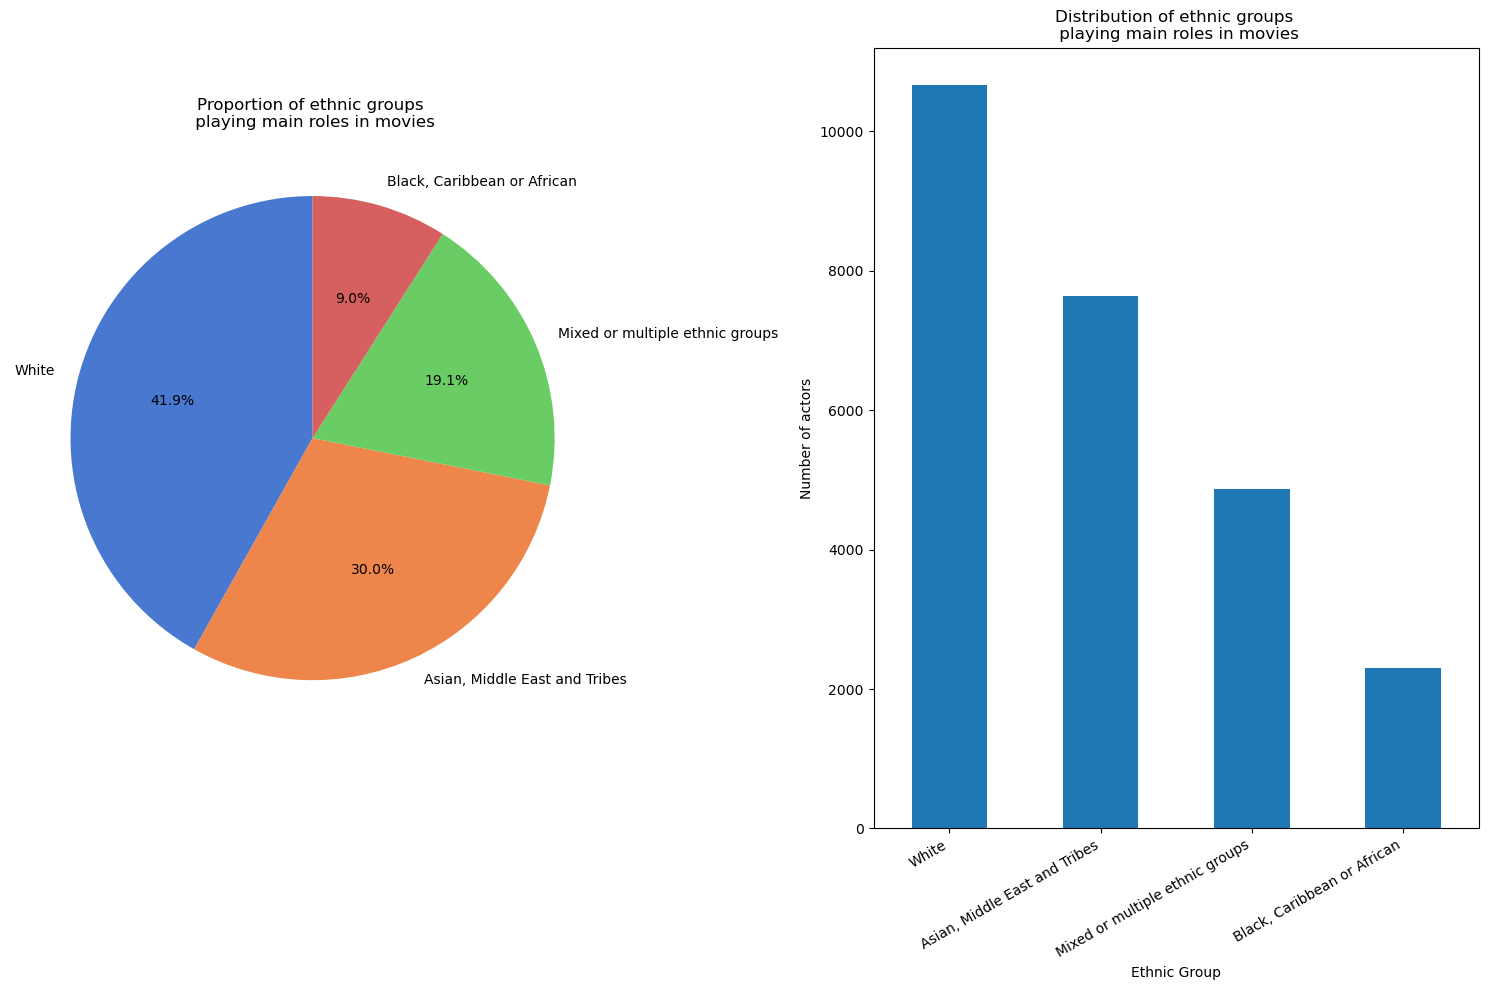

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies[characters_movies['Main character'] == 1].copy().groupby(['Ethnic Group']).count()
grouped_ethnicity = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(grouped_ethnicity.index))

grouped_ethnicity.plot(kind='bar', ax=axs[1])
axs[1].set_title("Distribution of ethnic groups \n playing main roles in movies")
axs[1].set_ylabel("Number of actors")
axs[1].set_xticklabels(grouped_ethnicity.index, rotation=30, ha='right')

grouped_ethnicity.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnic groups \n playing main roles in movies', label='', ax = axs[0], colors=[ethnic_group_palette[i] for i in grouped_ethnicity.index])

plt.tight_layout()
plt.show()


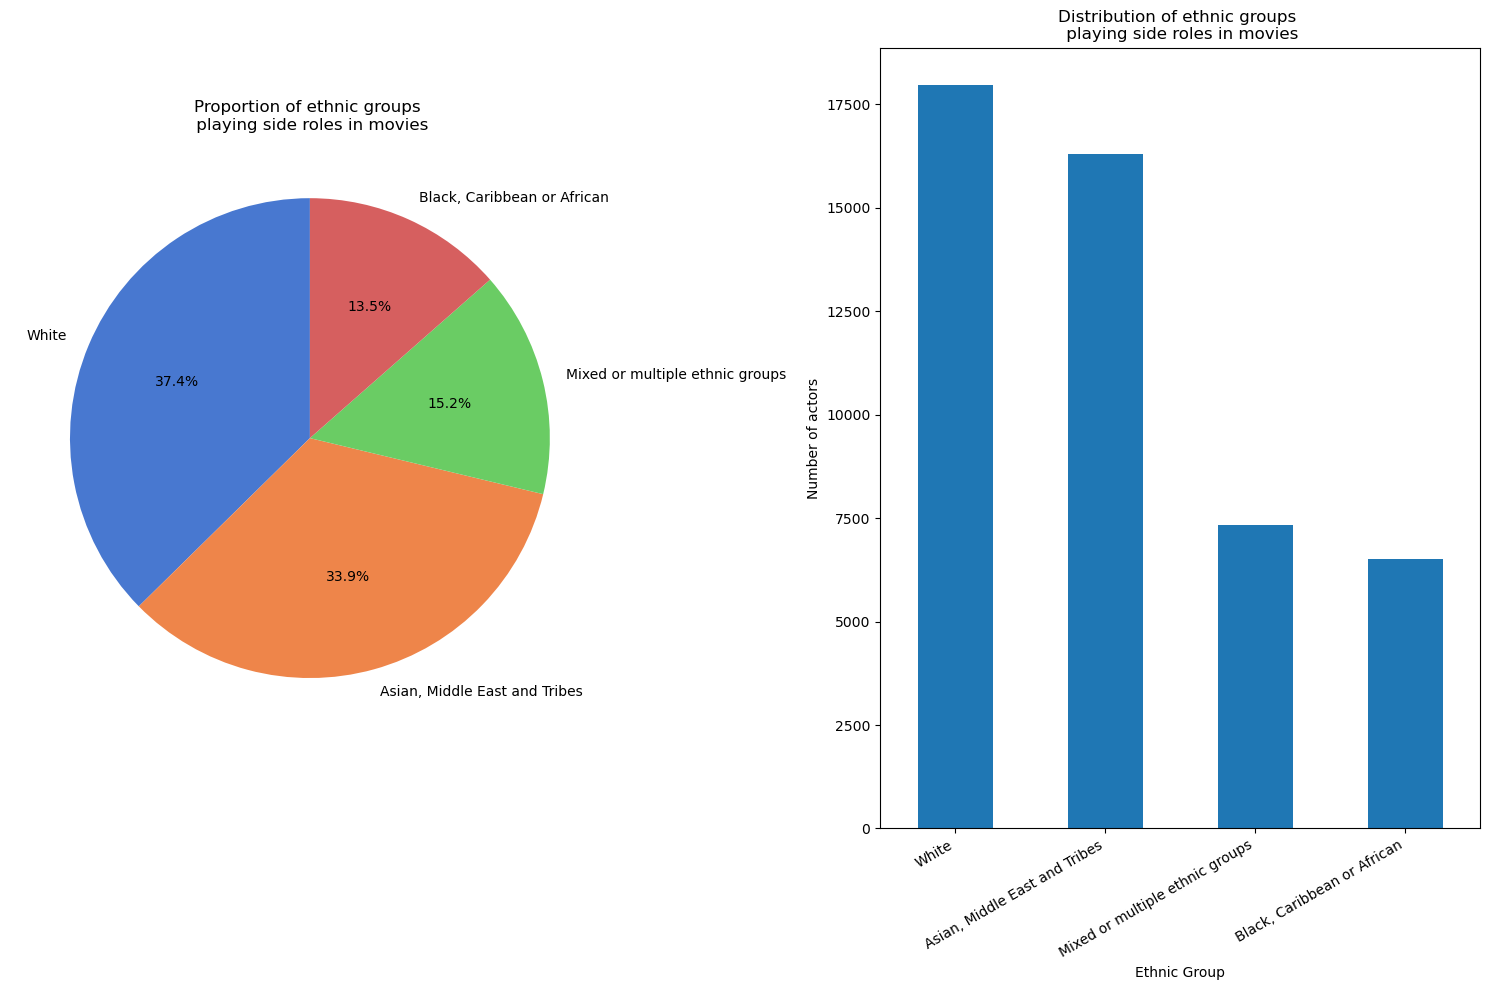

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies[characters_movies['Main character'] == 0].copy().groupby(['Ethnic Group']).count()
grouped_ethnicity = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(grouped_ethnicity.index))

grouped_ethnicity.plot(kind='bar', ax=axs[1])
axs[1].set_title("Distribution of ethnic groups \n playing side roles in movies")
axs[1].set_ylabel("Number of actors")
axs[1].set_xticklabels(grouped_ethnicity.index, rotation=30, ha='right')

grouped_ethnicity.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnic groups \n playing side roles in movies', label='', ax = axs[0], colors=[ethnic_group_palette[i] for i in grouped_ethnicity.index])

plt.tight_layout()
plt.show()


Before analyzing the piecharts let's analyze the barplots representing the distribution of ethnic groups playing main/side roles. As we can see there are much more people playing side roles than main roles, this first observation is to be expected because in a movie, for 3-5 main characters there are much more side characters. Then we can observe that, in both barplots, the *ranking* of the most important ethnic group based on the number of actor are the same. However we can see that those proportions vary between main roles and side roles. Indeed for main roles the difference in number of actors from an ethnic group to another seems to be constant ($\approx 3000$), whereas for side roles we can see that this difference is no more constant. In fact the ethnic group ``Asia, Middle East and Tribes`` is almost as important as the ethnic group ``White`` and those two categories dominate the distribution. Similarly, ``Mixed or mulpiple ethnic group`` and ``Black, Caribbean or African`` have a similar number of side actors, even if they represent a smaller part of the barplot. 

The same observations can be done with the two piecharts.


Next we can go deeper in the analysis by splitting each ethnic group in two sub-groups representing the gender of the actor.

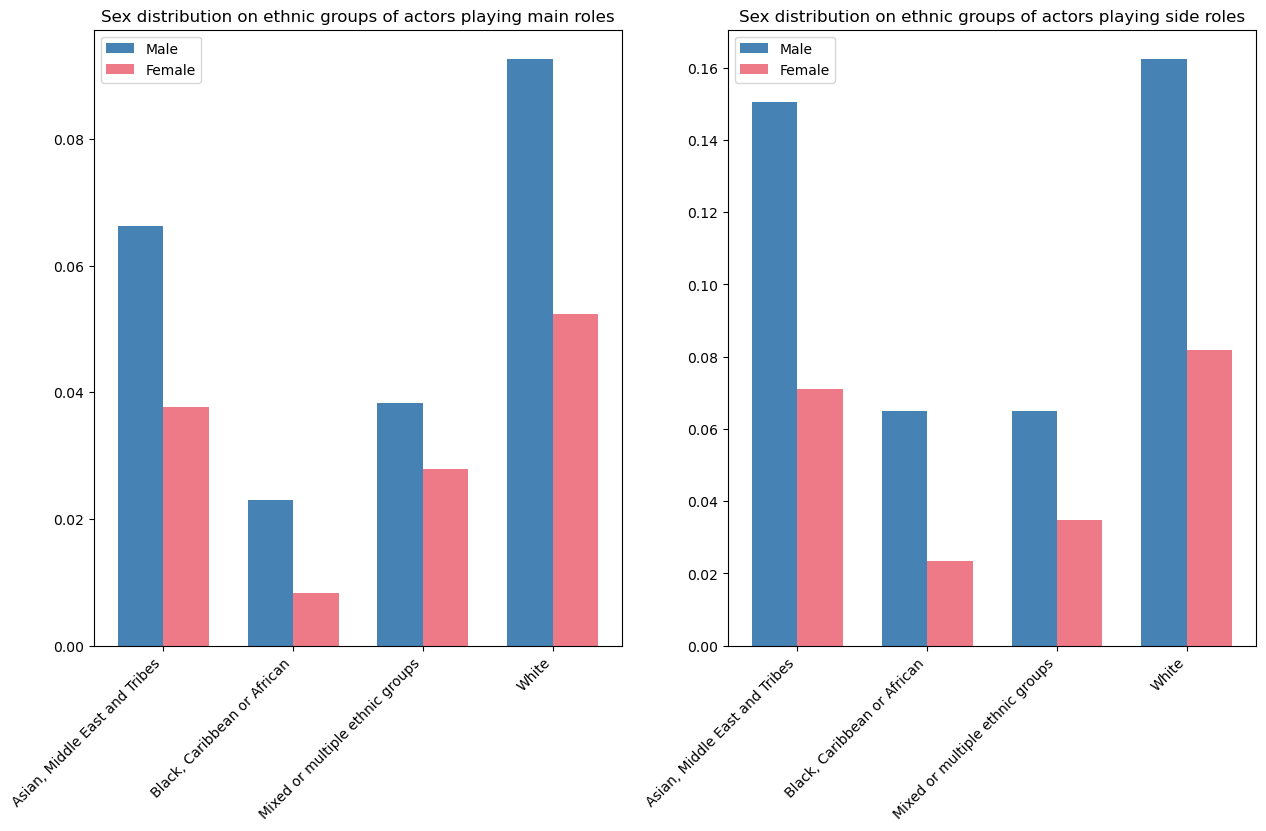

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

proportion_ethinity_M = characters_movies[np.logical_and(characters_movies['Gender'] == 'M',
                                                         characters_movies['Main character'] == 1)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))
proportion_ethinity_F = characters_movies[np.logical_and(characters_movies['Gender'] == 'F',
                                                         characters_movies['Main character'] == 1)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))

bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
axs[0].bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
axs[0].bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
axs[0].set_xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

axs[0].legend()
axs[0].set_title("Sex distribution on ethnic groups of actors playing main roles")

proportion_ethinity_M = characters_movies[np.logical_and(characters_movies['Gender'] == 'M',
                                                         characters_movies['Main character'] == 0)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))
proportion_ethinity_F = characters_movies[np.logical_and(characters_movies['Gender'] == 'F',
                                                         characters_movies['Main character'] == 0)].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(characters_movies['Gender'])))

bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
axs[1].bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
axs[1].bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
axs[1].set_xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

axs[1].legend()
axs[1].set_title("Sex distribution on ethnic groups of actors playing side roles")

plt.show()

In this case the results are very similar to the observations done earlier except that we can see that the females represent always roughly 1/3 of the total ethnic group main/side role; except for the main role played by the ethnic group ``Mixed or multiple ethnic group`` where here it is closer to 50/50.

All the analysis before were done on the overall years, so let's see how the distribution of main/side character has evolved during the years.

Text(0, 0.5, 'Frequency of ethnic group')

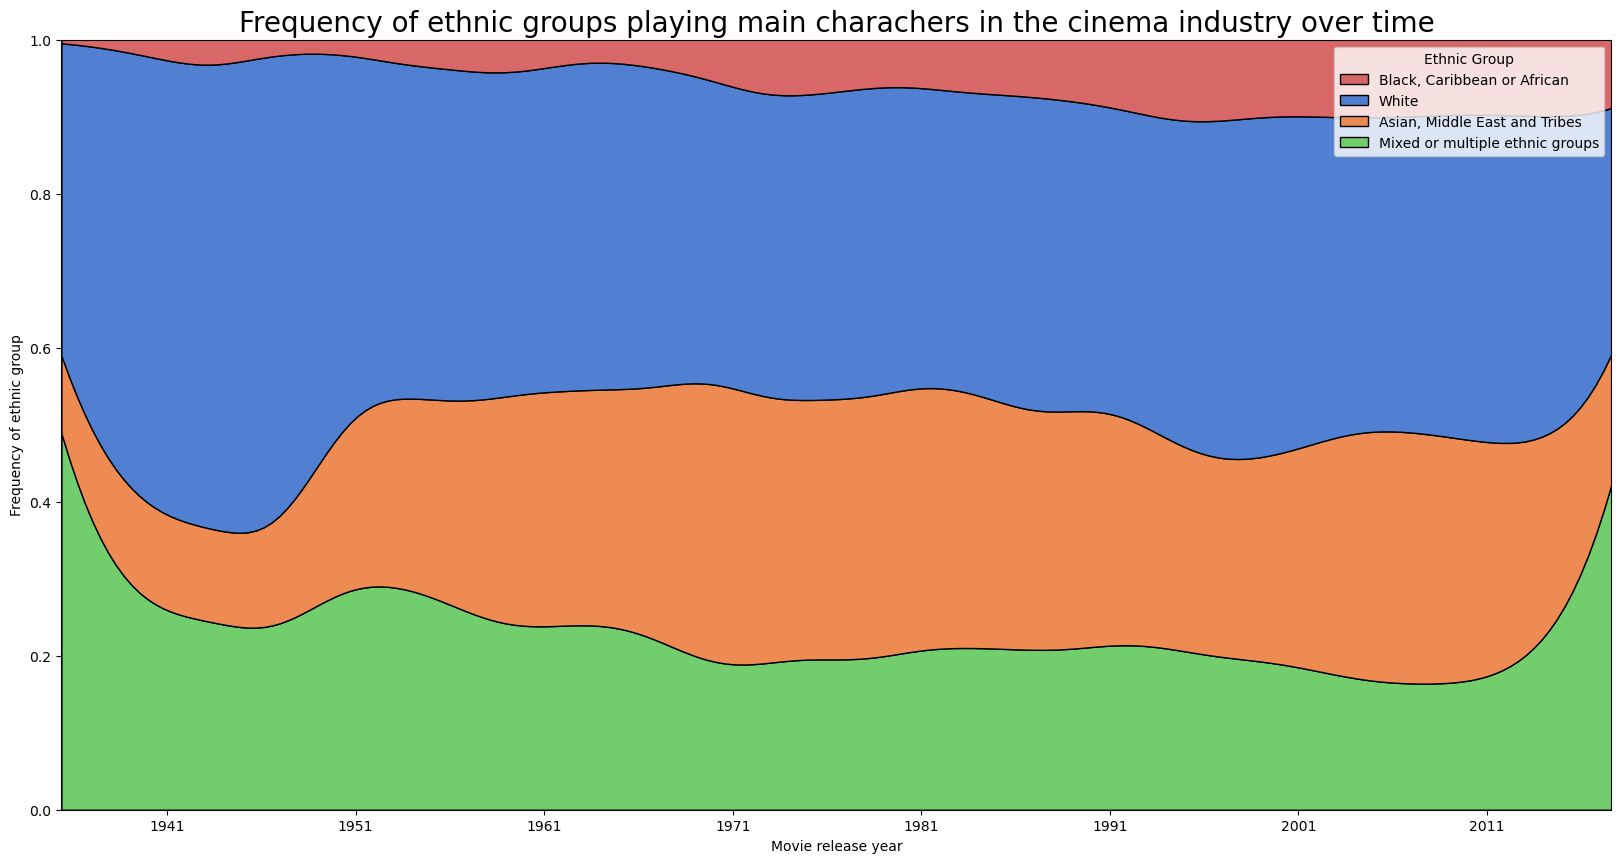

In [61]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies[characters_movies['Main character'] == 1],x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups playing main charachers in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

Text(0, 0.5, 'Frequency of ethnic group')

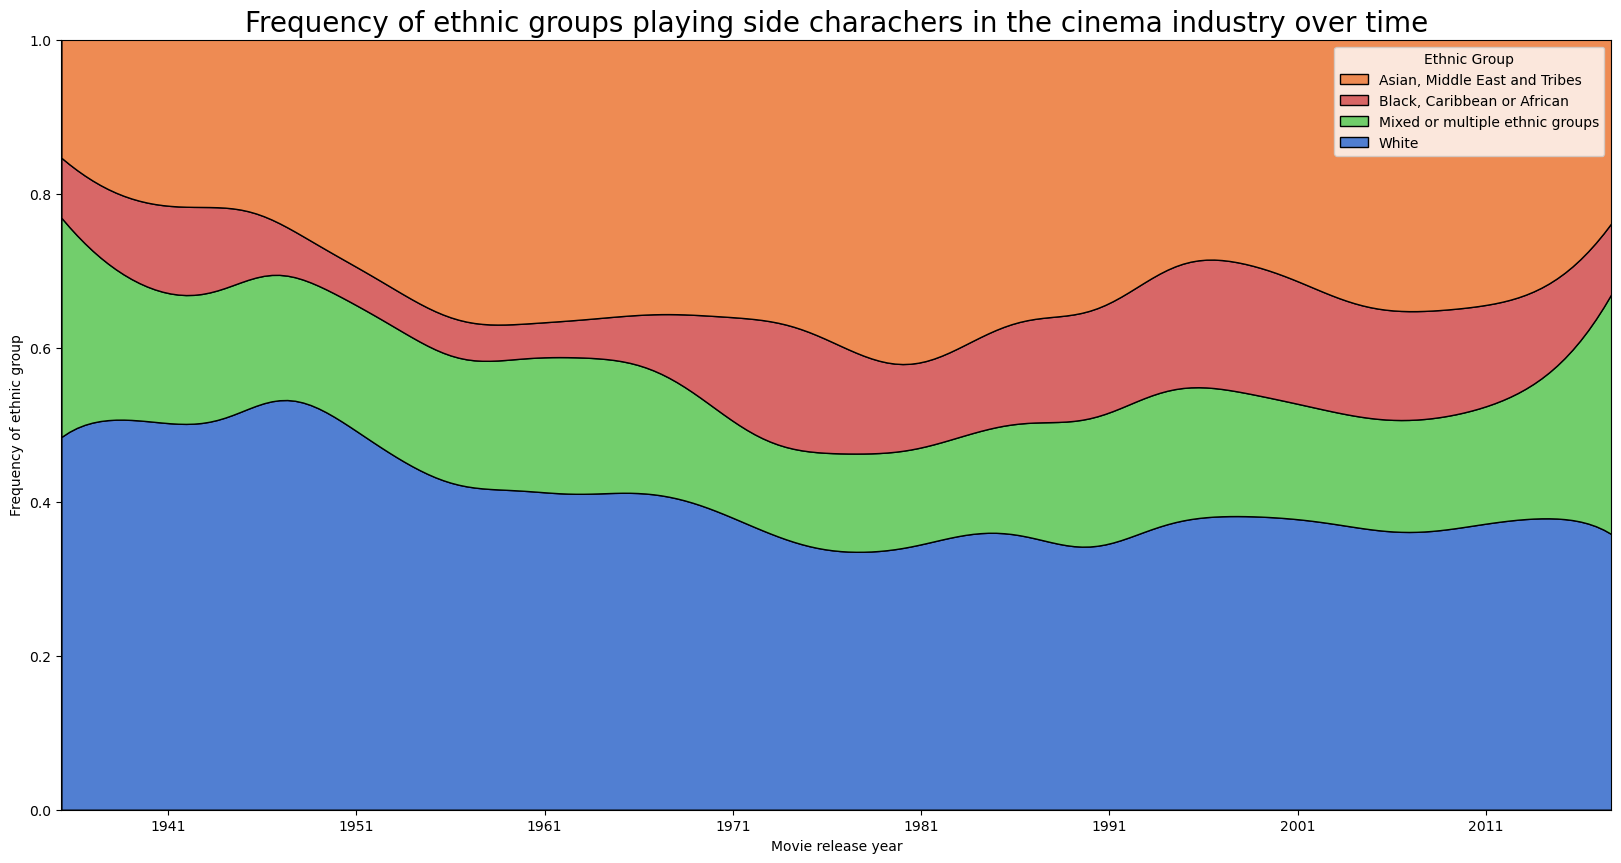

In [62]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies[characters_movies['Main character'] == 0],x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups playing side charachers in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

We can observe that for the main roles, the proportion was highly dominated by the ethnic group ``White`` until 1960. After this the repartition is much more homogeneous until the recent years where we can observe an increase of the ethnic group ``Mixed or multiple ethnic group``. It is important to note that around 1950 the ethnic group ``Asian, Middle east and tribes`` quickly gained importance. This could be related to the end of the war and the gain in political influence of eastern contries.

Regarding the proportion of side characters, we can observe that it is much more stable over time. Indeed from 1940 the proportions seems to be set. We can notice that the group ``Mixed or multiple ethnic group`` gained importance until 1960 to reach the same iinfluence as the group ``White``.

It's also important to have a general idea of the proportion of main characters over time.

Text(0.5, 0, 'Time')

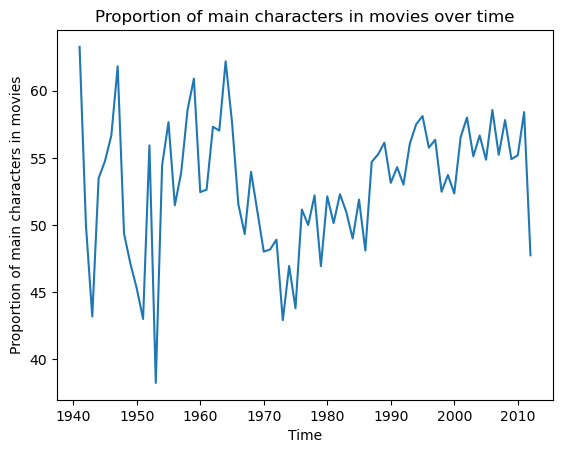

In [63]:
proportion_main_characters = characters_movies[characters_movies['Main character'] == 1].groupby('Movie release year').count()['Freebase character ID']/characters_movies.groupby('Movie release year')['Freebase character ID'].count()*100
proportion_main_characters.plot()
plt.title("Proportion of main characters in movies over time")
plt.ylabel("Proportion of main characters in movies")
plt.xlabel("Time")

This ratio is globally constant around 50% across all time.

## <a id='toc1_3_'></a>[Data Exploration](#toc0_)

### <a id='toc1_3_1_'></a>[Ethnicity Distribution](#toc0_)

Let's create a histogram to better see the Ethnicity Distribution. We will analyze two cases:
- By removing the Duplicates, i.e. count unique actors.
- By keeping the Duplicates, i.e. count actors that appeared multiple times in different movies. 

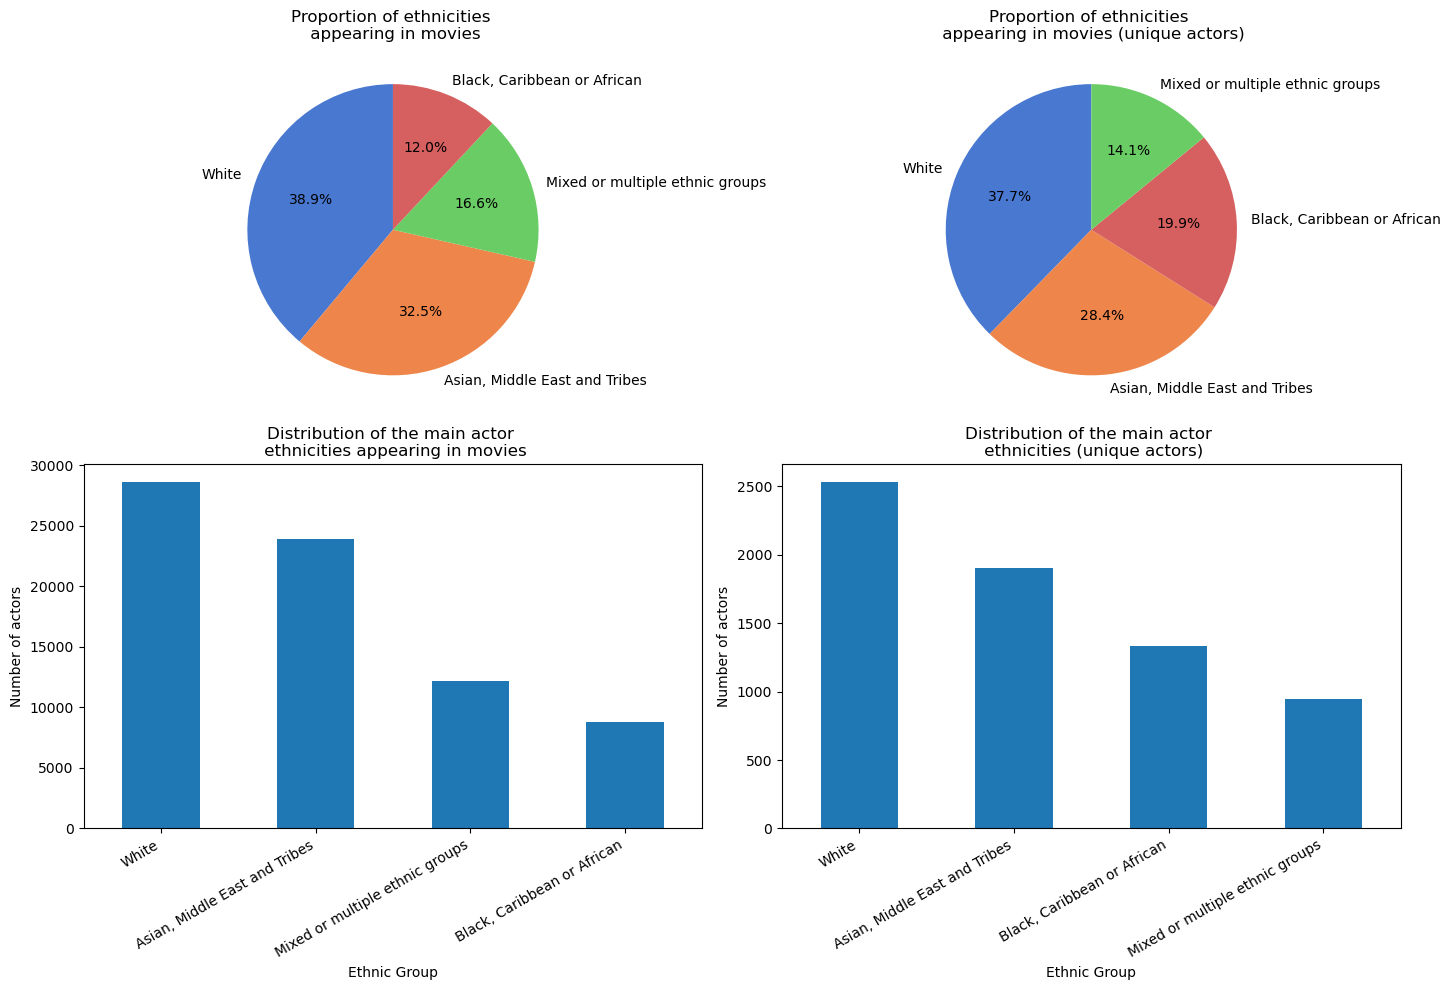

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Non unique
grouped_ethnicity = characters_movies.copy().groupby(['Ethnic Group']).count()
grouped_ethnicity = grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)

# Unique
unique_characters_movies = characters_movies.copy().drop_duplicates(subset='Freebase actor ID')
grouped_ethnicity_unique = unique_characters_movies.groupby(['Ethnic Group']).count()
grouped_ethnicity_unique = grouped_ethnicity_unique['Freebase actor ID'].sort_values(ascending=False)

cmap = sns.color_palette('muted' , len(grouped_ethnicity.index))

grouped_ethnicity.plot(kind='bar', ax=axs[1,0])
axs[1,0].set_title("Distribution of the main actor \n ethnicities appearing in movies")
axs[1,0].set_ylabel("Number of actors")
axs[1,0].set_xticklabels(grouped_ethnicity.index, rotation=30, ha='right')

grouped_ethnicity_unique.plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title("Distribution of the main actor \n ethnicities (unique actors)")
axs[1,1].set_ylabel("Number of actors")
axs[1,1].set_xticklabels(grouped_ethnicity_unique.index, rotation=30, ha='right')



grouped_ethnicity.plot.pie( autopct='%1.1f%%', startangle=90, title='Proportion of ethnicities \n appearing in movies', label='', ax = axs[0,0], colors=[ethnic_group_palette[i] for i in grouped_ethnicity.index])

grouped_ethnicity_unique.plot.pie(autopct='%1.1f%%', startangle=90, title='Proportion of ethnicities \n appearing in movies (unique actors)', label='', ax = axs[0,1], colors=[ethnic_group_palette[i] for i in grouped_ethnicity_unique.index])

plt.tight_layout()
plt.show()


In [65]:
grouped_ethnicity.head()

Ethnic Group
White                              28633
Asian, Middle East and Tribes      23936
Mixed or multiple ethnic groups    12192
Black, Caribbean or African         8802
Name: Freebase actor ID, dtype: int64

In [66]:
import plotly.graph_objs as obs
import plotly.express as px

# equivalent graph with plotly for website
ethnic_group_counts = characters_movies['Ethnic Group'].value_counts().reset_index()
ethnic_group_counts.columns = ['Ethnic Group', 'Count']

fig = px.pie(ethnic_group_counts, names='Ethnic Group', values='Count', 
             title='Proportion of Ethnic Groups appearing in movies', 
             template='plotly', hole=0.3)

# fig.show()
fig.write_html("Graphs_html/ethnic_group_counts.html")

We can see that Black, Caribbean or African actors do not tend to appear multiple times in different movies compared to the other ethinicities.

#### <a id='toc1_3_1_1_'></a>[Time-analysis time!](#toc0_)
Let's see how the participation of the different ethnic groups evolved over time. 

Text(0, 0.5, 'Frequency of ethnic group')

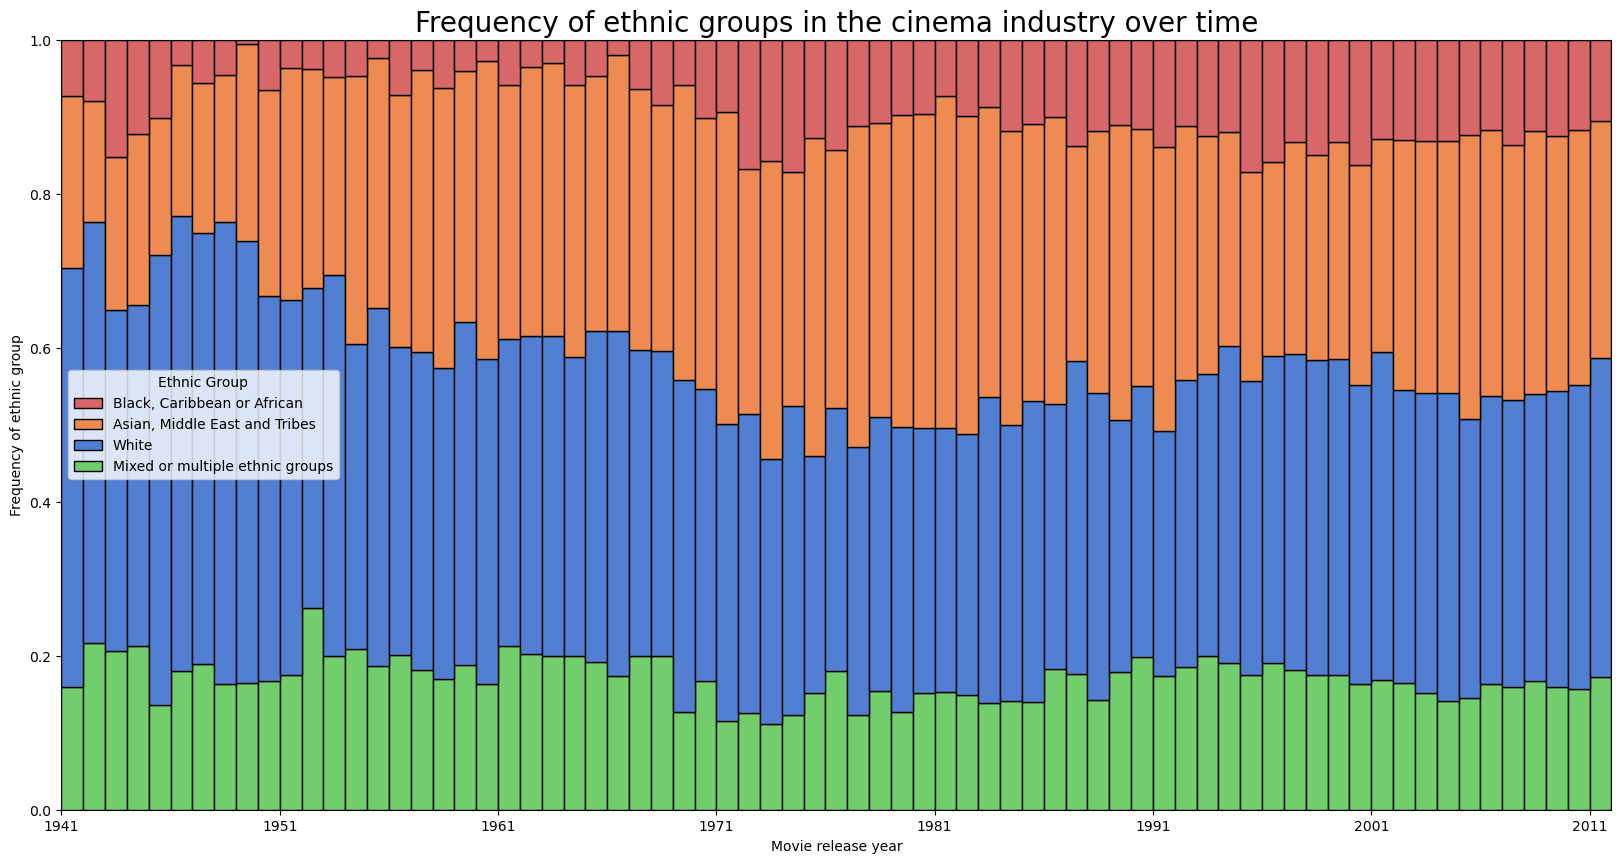

In [67]:
plt.figure(figsize=(20,10))
sns.histplot(data=characters_movies,x='Movie release year',hue='Ethnic Group',multiple='fill',stat='probability', binwidth=1, palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

In [68]:
import plotly.express as px

# equivalent graph with plotly for website
fig = px.histogram(characters_movies, x='Movie release year', color='Ethnic Group')

fig.update_layout(
    title="Frequency of Ethnic Groups in the cinema industry over time",
    xaxis=dict(tickvals=list(range(characters_movies['Movie release year'].min(), characters_movies['Movie release year'].max(), 10))),
    yaxis=dict(title='Ethnic Groups Frequency'),
)
# fig.show()
fig.write_html("Graphs_html/actor_diversity_over_time.html")


To better visualize let's "Smooth" the plot:

Text(0, 0.5, 'Frequency of ethnic group')

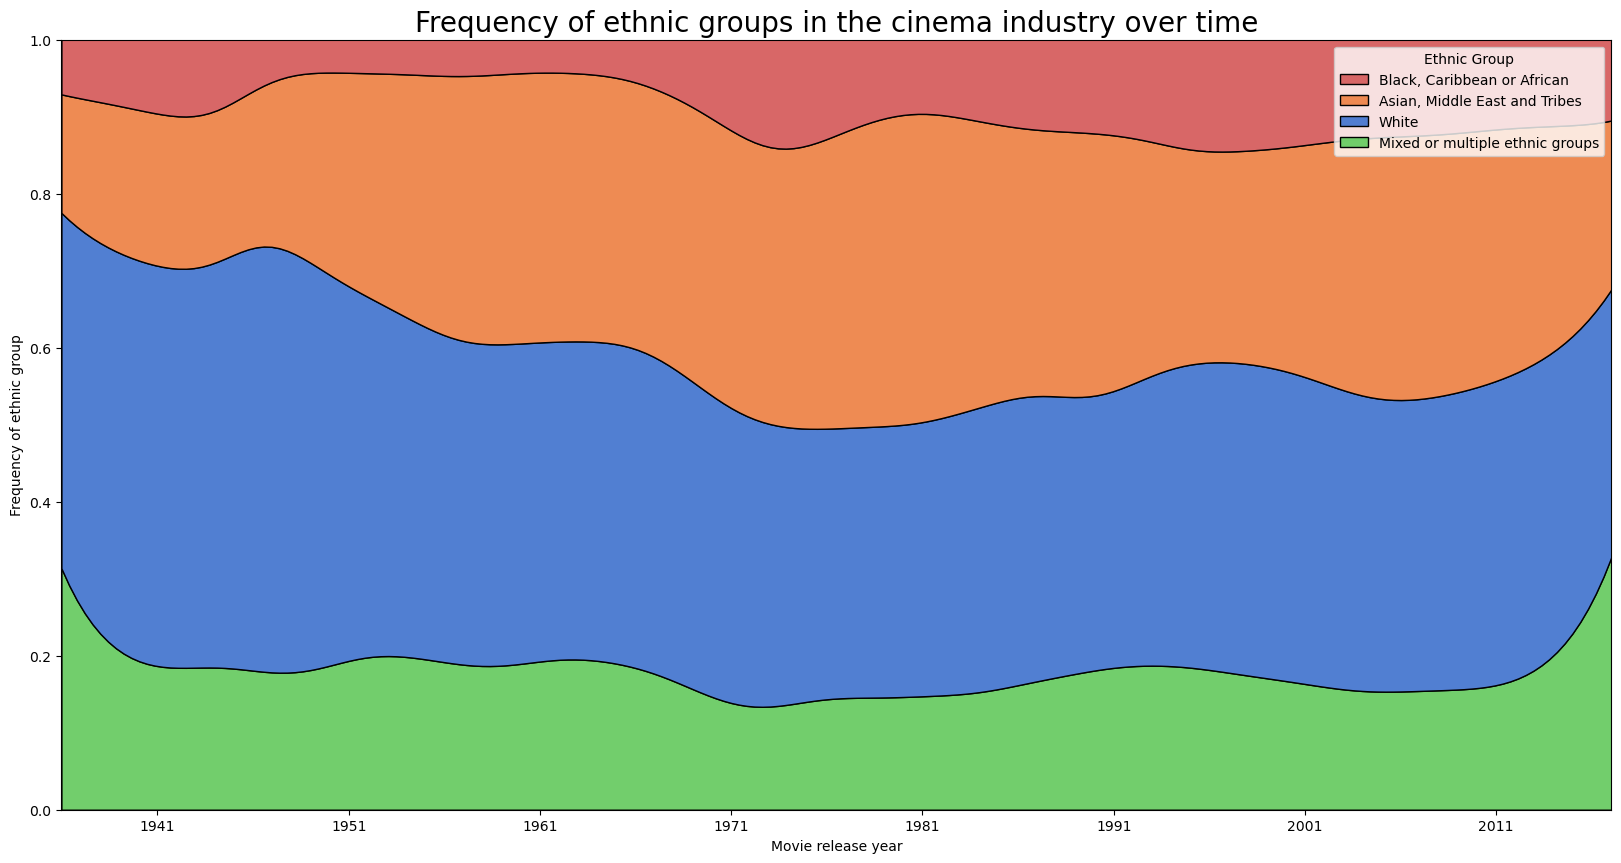

In [69]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=characters_movies,x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Frequency of ethnic groups in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Frequency of ethnic group')

We notice a considerably larger proportion of Black, Caribbean or African in the 1920s. This is a surprising feature which can be worth investigating in the future.

Heat maps can also be useful to visualize this information by also taking into account the ethnic diversity of the cast in movies instead of just proportions. The histogram below shows the evolution of the number of characters over the years.

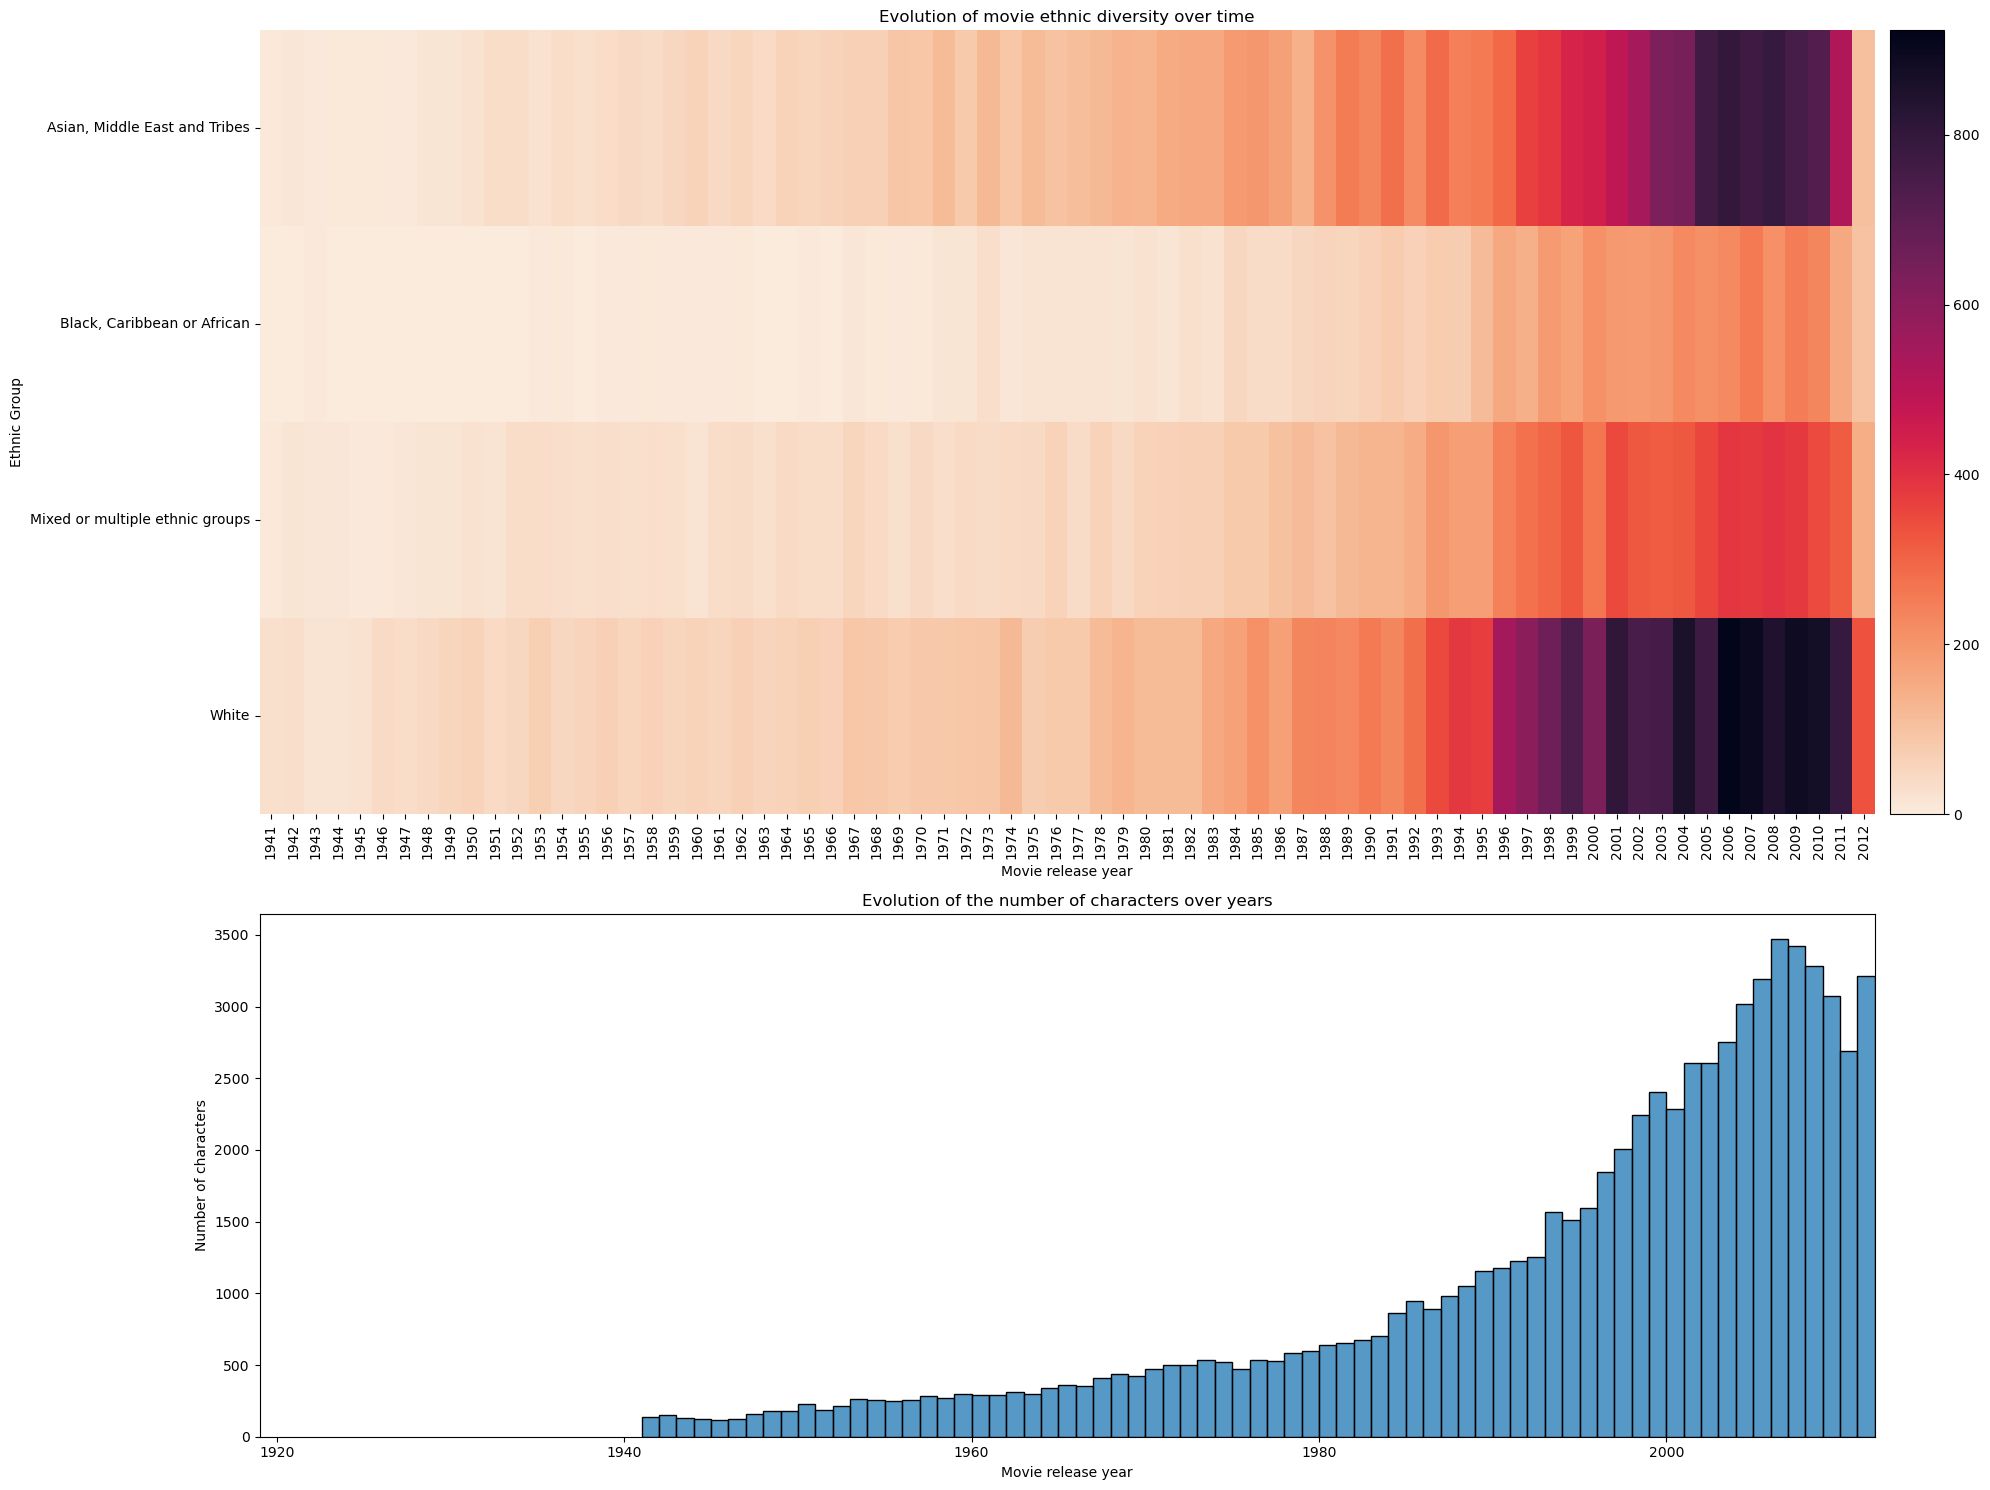

In [70]:
map_year_actor = characters_movies.pivot_table(index=['Movie release year'], columns='Ethnic Group', values='Freebase character ID', aggfunc='count')
df_year_actor = pd.DataFrame(map_year_actor.values,columns=map_year_actor.columns.values.tolist(),index=map_year_actor.index.values.tolist())


fig, axs = plt.subplots(2,2, figsize=(20, 15), gridspec_kw={'height_ratios': [1.5, 1], 'width_ratios': [30, 1]})

# Create the heatmap without a color bar
cax = sns.heatmap(map_year_actor.transpose(),cmap="rocket_r", ax= axs[0, 0], cbar=False)
axs[0, 0].set_title("Evolution of movie ethnic diversity over time")
axs[0, 0].set_xlabel("Movie release year")

# Create a color bar in axs[1,1]
cb = Colorbar(ax=axs[0,1], mappable=cax.get_children()[0])

sns.histplot(data= characters_movies ,x='Movie release year',stat='count', binwidth=1, ax = axs[1, 0])
axs[1, 0].set_title('Evolution of the number of characters over years')
axs[1, 0].set_ylabel('Number of characters')
axs[1, 0].set_xlabel("Movie release year")
axs[1, 0].set_xlim([1919, 2012])

# Hide the unused subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

We can see that the number of actors increased over the years. We also see that the Asian, Middle East and Tribes, and the White Ethnic groups were the ones that increased the most.

#### <a id='toc1_3_1_2_'></a>[Analysis based on gender](#toc0_)
Here the genders of the different Ethnic groups will be analyzed to see disproportions between male and female actors.  

In [71]:
H_ethinity_M = unique_characters_movies[unique_characters_movies['Gender'] == 'M'].groupby(['Ethnic Group'])['Freebase actor ID'].count().sort_values()
H_ethinity_M_reversed = H_ethinity_M*(-1)
H_ethinity_F = unique_characters_movies[unique_characters_movies['Gender'] == 'F'].groupby(['Ethnic Group'])['Freebase actor ID'].count().sort_values()

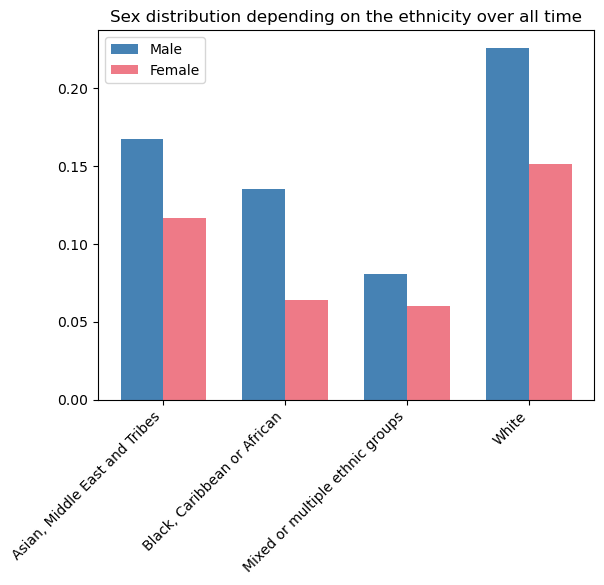

In [72]:
proportion_ethinity_M = unique_characters_movies[unique_characters_movies['Gender'] == 'M'].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(unique_characters_movies['Gender'])))
proportion_ethinity_F = unique_characters_movies[unique_characters_movies['Gender'] == 'F'].groupby(['Ethnic Group'])['Freebase actor ID'].apply(lambda x: len(x)/(len(unique_characters_movies['Gender'])))


bar_width = 0.35
bar_l = np.arange(len(proportion_ethinity_M))
tick_pos = [i + bar_width / 2 for i in bar_l]
plt.bar(bar_l, proportion_ethinity_M.values, width=bar_width, color="#4682b4", label="Male")
plt.bar(bar_l + bar_width, proportion_ethinity_F.values, width=bar_width, color="#ee7a87", label="Female")
plt.xticks(tick_pos, proportion_ethinity_M.index, rotation=45, ha='right')

plt.legend()
plt.title("Sex distribution depending on the ethnicity over all time")

plt.show()

For all ethnic groups we see that there is a majority of men over women. Now let's see the distribution of men and women over the years for different ethnic groups. To do so, same actors can appear in two or more different years.

In [73]:
# Let's groupby Ethincity and Year and separate the genders.
H_ethinity_M_year = characters_movies[characters_movies['Gender'] == 'M'].groupby(['Ethnic Group', 'Movie release year'])['Freebase actor ID'].count().sort_values()

H_ethinity_F_year = characters_movies[characters_movies['Gender'] == 'F'].groupby(['Ethnic Group', 'Movie release year'])['Freebase actor ID'].count().sort_values()

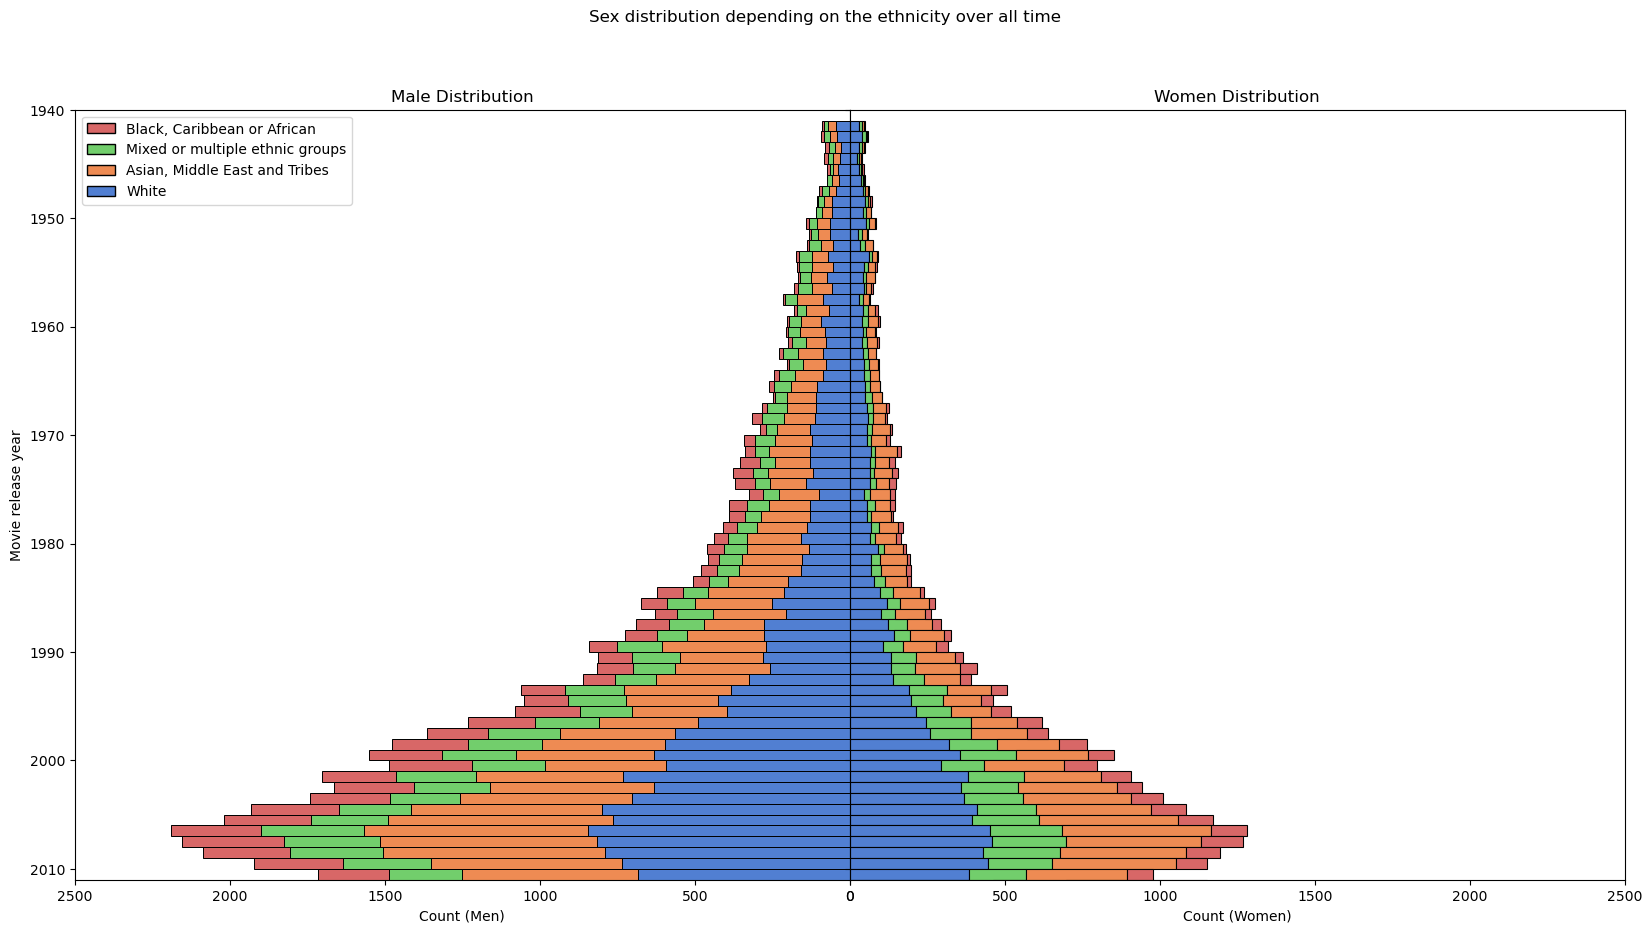

In [74]:
ethnicities_M, years_M = zip(*H_ethinity_M_year.index)
ethnicities_F, years_F = zip(*H_ethinity_F_year.index)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
plt.subplots_adjust(wspace=0)

# Plot for men
sns.histplot(ax=ax[0], y=list(years_M), weights=np.abs(H_ethinity_M_year.values), hue=list(ethnicities_M), multiple='stack', stat='count', binwidth=1, palette=ethnic_group_palette,alpha=0.95)

ax[0].set_xlabel("Count (Men)")
ax[0].invert_xaxis()# Flip the x-axis
ax[0].set_ylabel("Movie release year")
ax[0].set_ylim(2011, 1940)  # Flip the y-axis
ax[0].set_xlim(2500, 0)
ax[0].set_title('Male Distribution')

# Plot for women
sns.histplot(ax=ax[1], y=list(years_F), weights=np.abs(H_ethinity_F_year.values), hue=list(ethnicities_F), multiple='stack', stat='count', binwidth=1, legend= False, palette=ethnic_group_palette,alpha=0.95)
  
ax[1].set_xlabel("Count (Women)")
ax[1].set_ylim(2011, 1940)  # Flip the y-axis
ax[1].set_xlim(0, 2500)
ax[1].set_title('Women Distribution')

plt.suptitle("Sex distribution depending on the ethnicity over all time")
plt.show()

In [75]:
print(ethnic_group_palette)

{'White': (0.2823529411764706, 0.47058823529411764, 0.8156862745098039), 'Asian, Middle East and Tribes': (0.9333333333333333, 0.5215686274509804, 0.2901960784313726), 'Mixed or multiple ethnic groups': (0.41568627450980394, 0.8, 0.39215686274509803), 'Black, Caribbean or African': (0.8392156862745098, 0.37254901960784315, 0.37254901960784315)}


In [93]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Filter data for male and female
male_data = characters_movies[characters_movies['Gender'] == 'M']
female_data = characters_movies[characters_movies['Gender'] == 'F']

# create palette for each Ethnic Group
palette = {'White': '#1f77b4', 'Asian, Middle East and Tribes': '#d62728', 
           'Mixed or multiple ethnic groups': '#2ca02c', 'Black, Caribbean or African': '#9467bd'}

# Create histograms for male and female separately
fig_male = px.histogram(male_data,
                       x='Movie release year',
                       color='Ethnic Group',
                       barmode='stack',
                       color_discrete_map=palette)

fig_female = px.histogram(female_data,
                         x='Movie release year',
                         color='Ethnic Group',
                         barmode='stack',
                         color_discrete_map=palette)

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=['', ''], shared_xaxes=True,
                    vertical_spacing=0)  # Adjust the vertical spacing as needed

# Add male histogram to the first subplot
for data in fig_male.data:
    fig.add_trace(data, row=1, col=1)

# Add female histogram to the second subplot
for data in fig_female.data:
    fig.add_trace(data, row=2, col=1)

# Add subtitles on the side
fig.add_annotation(text="Male", xref="paper", yref="paper", x=0.04, y=0.92, showarrow=False, font=dict(size=16))
fig.add_annotation(text="Female", xref="paper", yref="paper", x=0.04, y=0.08, showarrow=False, font=dict(size=16))

fig.update_layout(
    title="Frequency of Ethnic Groups in the cinema industry over time",
    xaxis=dict(tickvals=list(range(characters_movies['Movie release year'].min(), characters_movies['Movie release year'].max(), 10))),
    yaxis=dict(title='Ethnic Groups Frequency'),
    showlegend=True,
    barmode='stack'
)

fig.update_yaxes(range=[2300, 0], row=2, col=1)
fig.update_yaxes(range=[0, 2300], row=1, col=1)

# fig.show()
fig.write_html("Graphs_html/actor_diversity_over_time_gender.html")


We still see that there are almost no years where ethnic groups had more women than men. The most balanced ethnic group is the Mixed one. 

Now let's analyze the age distribution of the actors, and compare them between male and female.


Text(0.5, 0.98, '')

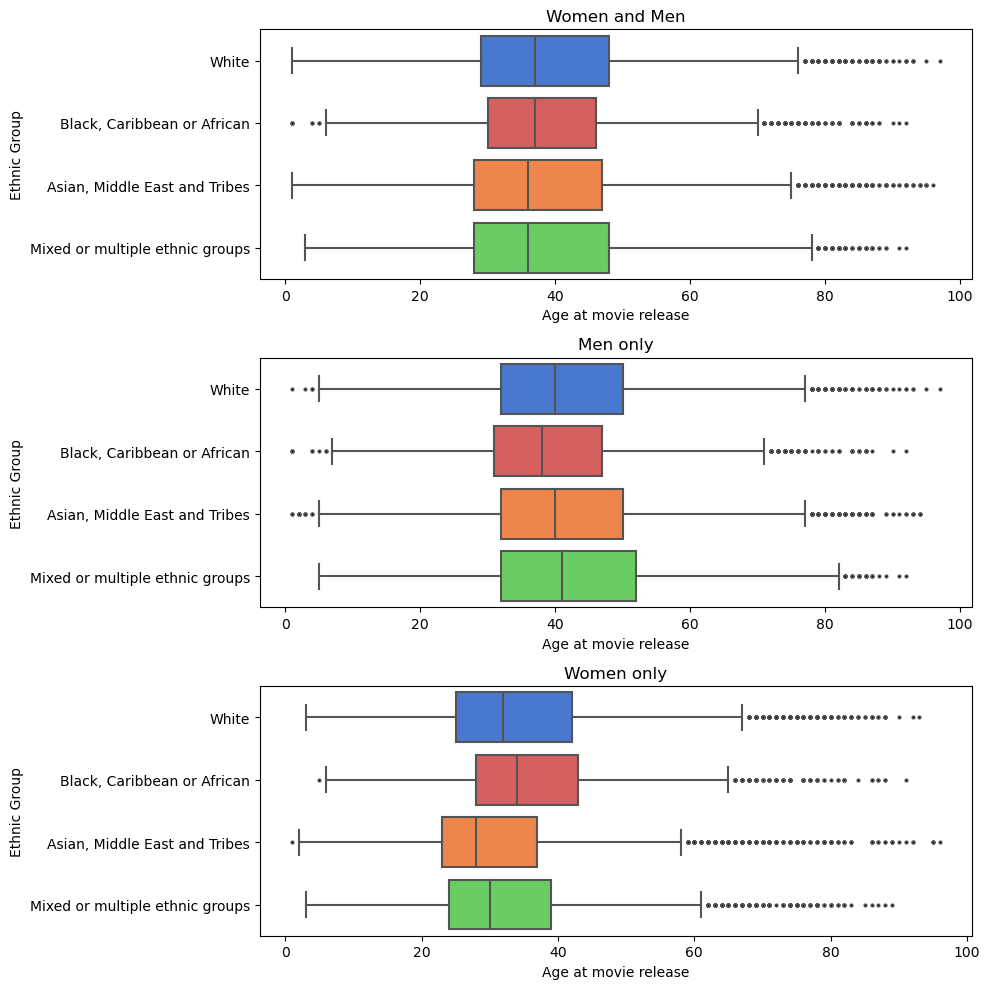

In [75]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
flierprops = dict(marker='o', markerfacecolor='black', markersize=2)

sns.boxplot(data=characters_movies, x="Age at movie release", y="Ethnic Group", 
            ax=ax[0], flierprops=flierprops,
            palette=ethnic_group_palette,saturation=1,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[0].set_title('Women and Men')
ax[0].set_xlabel('Age at movie release')

sns.boxplot(data=characters_movies[characters_movies['Gender'] == 'M'], 
            x="Age at movie release", y="Ethnic Group", ax=ax[1], flierprops=flierprops,
            palette=ethnic_group_palette,saturation=1,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[1].set_title('Men only')
ax[1].set_xlabel('Age at movie release')

sns.boxplot(data=characters_movies[characters_movies['Gender'] == 'F'], 
            x="Age at movie release", y="Ethnic Group", ax=ax[2], flierprops=flierprops,
            palette=ethnic_group_palette,saturation=1,
            order=['White', 'Black, Caribbean or African', 'Asian, Middle East and Tribes', 'Mixed or multiple ethnic groups'])
ax[2].set_title('Women only')
ax[2].set_xlabel('Age at movie release')
fig.tight_layout()

plt.suptitle('', fontsize=20)

We see that women tend to be much younger than men for all ethnic groups. The smallest difference is in the Black, Caribbean or African ethnic group, where the men are only slightly older than the women.

#### <a id='toc1_3_1_3_'></a>[Movie genres](#toc0_)

First, it's relevant to determine what are the dominant movies genres and how lucrative they are. Knowing this could help us to remove cofactors that could influence the movie revenue depending on the ethnicity.
In order to analyze the distribution of ethnicity depending on the movie genre, we want to duplicate the character to have one entry for each genre of a movie. 

In [76]:
#First, for each character let's isolate all the genres of the movie where it is in
genres = pd.DataFrame(characters_movies['Movie genres'].tolist())
genres.columns = [f'Genre {i}' for i in range(0,len(genres.columns))]

#After this let's create a new dataset, where all the chacharacter will be duplicate to all the genre they're in
characters_genres = pd.DataFrame(columns=np.append(characters_movies.columns.values,'genre'))
for col in genres.columns:
    base_genre = characters_movies.copy()
    base_genre['genre'] = genres[col]
    base_genre = base_genre[base_genre['genre'].notna()]
    characters_genres = pd.concat([characters_genres,base_genre],ignore_index=True)
characters_genres.head(4)
characters_genres[characters_genres['Wikipedia Movie ID'] == 975900].head(6)

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie genres,Budget,Plot summary,Vote average,Vote count,Box office revenue,Movie runtime,Movie release year,Main character,genre
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Thriller
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Thriller
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,0,Thriller
73563,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Science Fiction
73564,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,1,Science Fiction
73565,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,"[Thriller, Science Fiction, Horror, Adventure,...",28000000.0,Melanie Ballard (Natasha Henstridge) is a hard...,4.8,299.0,14010832.0,98.0,2001,0,Science Fiction


Now let's determine what are the dominant movie genres, the genres which are the most common among movies.

In [77]:
characters_genres.drop_duplicates(subset='Wikipedia Movie ID')['genre'].value_counts()[0:10]

genre
Thriller            4045
Drama               3050
Crime Fiction       2126
Romantic comedy     1706
Action/Adventure     950
Romantic drama       827
Romance Film         815
Comedy               741
Musical              596
Parody               556
Name: count, dtype: int64

Let's also verify the genres which have the highest number of characters.

In [78]:
main_genres = characters_genres['genre'].value_counts()[0:10]
main_genres

genre
Drama               41043
Comedy              25235
Romance Film        17368
Thriller            16064
Action              14389
World cinema        12591
Crime Fiction       10957
Action/Adventure    10494
Indie                8523
Romantic drama       8144
Name: count, dtype: int64

We notice that the top 10 of genres for movies and characters are quite similar, which actully makes sense. <br>
Nonetheless, it would be more appropriate to merge movie genres that are similar and group some of the sub-genres under one larger genre to be more accurately represented

In [79]:
characters_genres['genre']=characters_genres['genre'].str.replace('Romantic drama','Romance Film')
characters_genres['genre']=characters_genres['genre'].str.replace('Romantic comedy','Romance Film')
characters_genres['genre']=characters_genres['genre'].str.replace('Romantic fantasy','Romance Film')
characters_genres['genre']=characters_genres['genre'].str.replace('Action/Adventure','Action')
characters_genres['genre']=characters_genres['genre'].str.replace('Action Thrillers','Action')
characters_genres['genre']=characters_genres['genre'].str.replace('Martial Arts Film','Action')
characters_genres['genre']=characters_genres['genre'].str.replace('Bollywood','World cinema')
characters_genres['genre']=characters_genres['genre'].str.replace('Japanese Movies','World cinema')
characters_genres['genre']=characters_genres['genre'].str.replace('Chinese Movies','World cinema')
characters_genres['genre']=characters_genres['genre'].str.replace('Crime Thriller','Crime')
characters_genres['genre']=characters_genres['genre'].str.replace('Crime Fiction','Crime')
characters_genres['genre']=characters_genres['genre'].str.replace('Crime Drama','Crime')
characters_genres['genre']=characters_genres['genre'].str.replace('Crime Comedy','Crime')
characters_genres['genre']=characters_genres['genre'].str.replace('Heist','Crime')
characters_genres['genre']=characters_genres['genre'].str.replace('Black comedy', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Psychological thriller', 'Thriller')
characters_genres['genre']=characters_genres['genre'].str.replace('Political thriller', 'Thriller')
characters_genres['genre']=characters_genres['genre'].str.replace('Fantasy Adventure','Fantasy')
characters_genres['genre']=characters_genres['genre'].str.replace('Buddy film','Adventure')
characters_genres['genre']=characters_genres['genre'].str.replace('Supernatural','Fantasy')
characters_genres['genre']=characters_genres['genre'].str.replace("Children's/Family",'Family Film')
characters_genres['genre']=characters_genres['genre'].str.replace('Coming of age','Teen')
characters_genres['genre']=characters_genres['genre'].str.replace('Coming-of-age film','Teen')
characters_genres['genre']=characters_genres['genre'].str.replace('Musical Drama', 'Musical')
characters_genres['genre']=characters_genres['genre'].str.replace('Biographical film', 'Biography')
characters_genres['genre']=characters_genres['genre'].str.replace('Biopic [feature]', 'Biography')
characters_genres['genre']=characters_genres['genre'].str.replace('Melodrama', 'Drama')
characters_genres['genre']=characters_genres['genre'].str.replace('Family Drama', 'Drama')
characters_genres['genre']=characters_genres['genre'].str.replace('Political drama', 'Drama')
characters_genres['genre']=characters_genres['genre'].str.replace('Courtroom Drama', 'Drama')
characters_genres['genre']=characters_genres['genre'].str.replace('Comedy-drama', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Action Comedy', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Comedy film', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Slapstick', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Domestic Comedy', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Fantasy Comedy', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Comedy of manners', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Screwball comedy', 'Comedy')
characters_genres['genre']=characters_genres['genre'].str.replace('Comedy of Errors', 'Comedy')

Let's verify how is now the top 10 genres which has the highest number of characters.

In [80]:
main_genres = characters_genres['genre'].value_counts()[0:10]
main_genres

genre
Drama           46334
Comedy          38497
Romance Film    32509
Action          27428
World cinema    19862
Thriller        19288
Crime           18285
Indie            8523
Adventure        7940
Musical          7449
Name: count, dtype: int64

Some movie genres have changed position such as Action or Thriller.

For further movie genres analysis, we should only keep the characters which are playing on the main categories.

In [81]:
main_character_genres = characters_genres.copy()[characters_genres['genre'].isin(main_genres.index)]

Text(0, 0.5, 'Proportion of movie genres ')

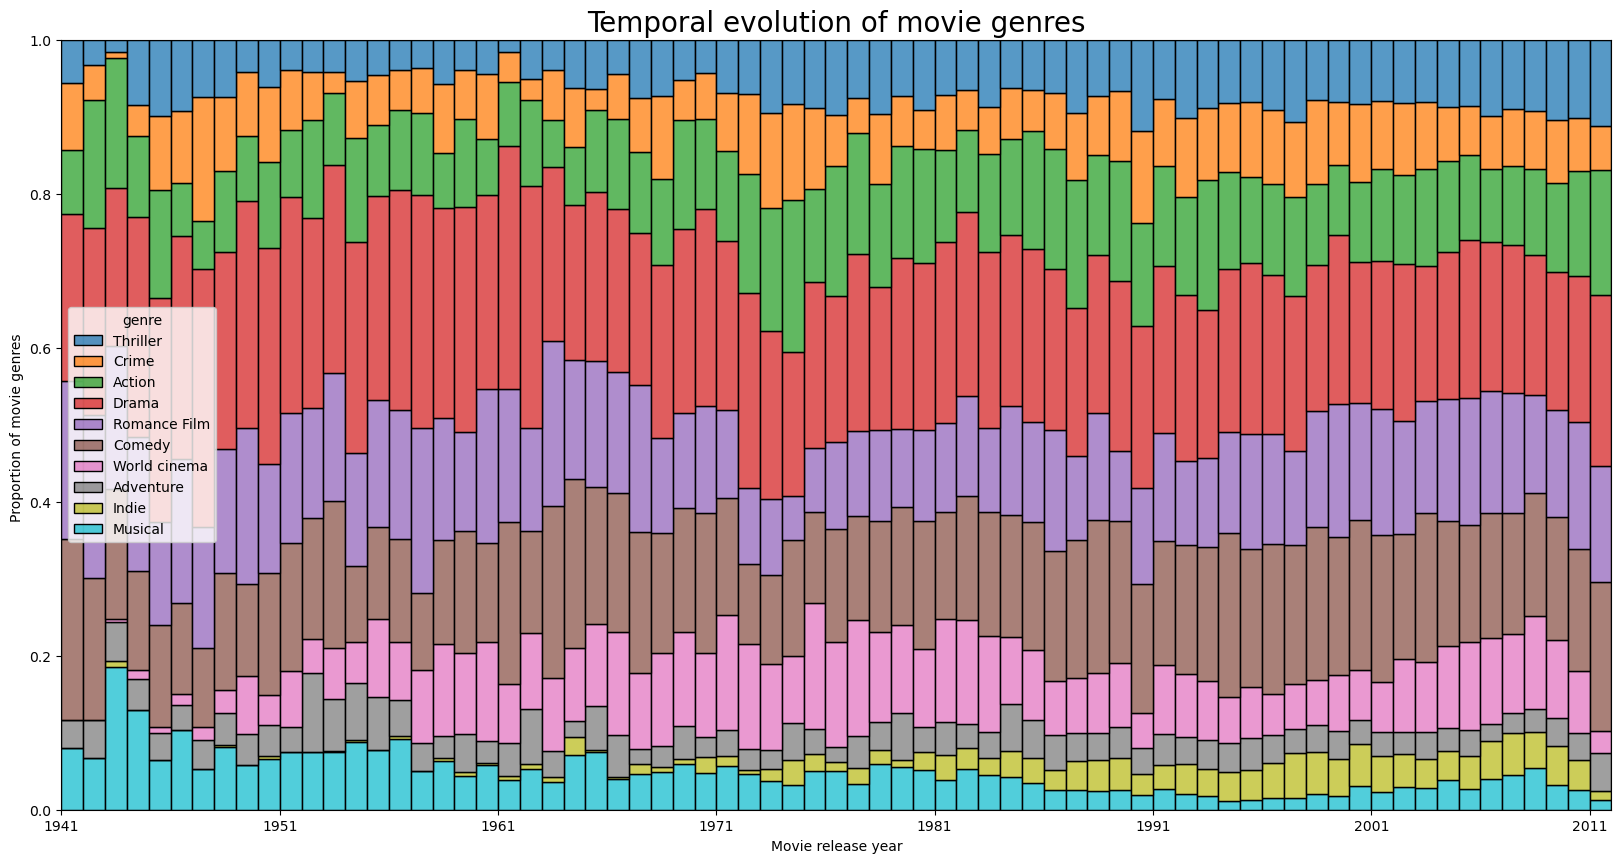

In [82]:
plt.figure(figsize=(20,10))
sns.histplot(data=main_character_genres,x='Movie release year',hue='genre',multiple='fill',stat='probability', binwidth=1)
plt.title("Temporal evolution of movie genres",fontsize=20)
plt.xticks(np.arange(characters_movies['Movie release year'].min(),characters_movies['Movie release year'].max(),10))
plt.ylabel('Proportion of movie genres ')

We notice that before 1929, the data looks a bit strange. In our future analysis we can consider removing the data before this date. Since there are very little characters in this period anyway, this will not impact this analysis.

Text(0.5, 1.0, 'Distribution of ethnic group depending on the genre')

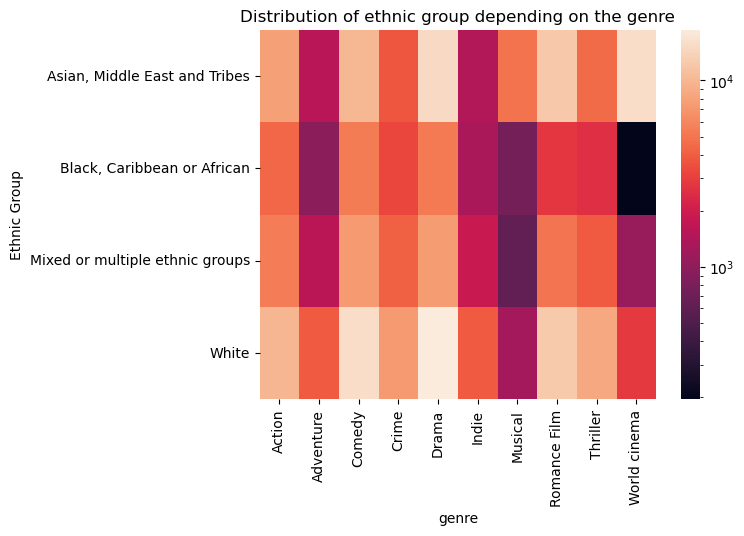

In [83]:
map_movies = pd.crosstab(main_character_genres['Ethnic Group'], main_character_genres['genre'])
sns.heatmap(map_movies,norm = LogNorm())
plt.title("Distribution of ethnic group depending on the genre")

Text(0, 0.5, 'Number of characters')

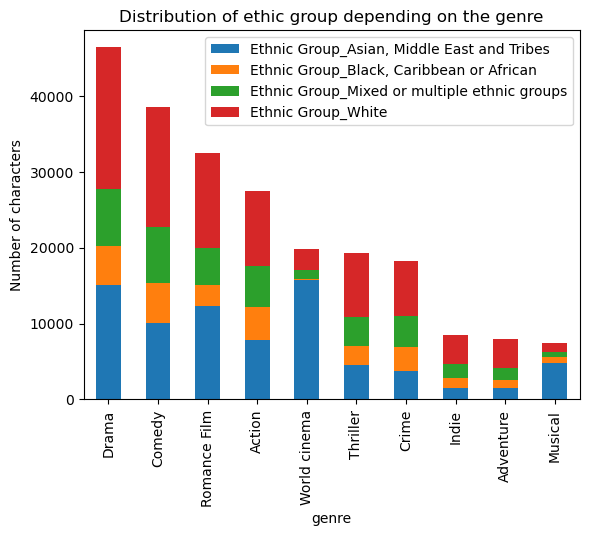

In [84]:
bar_main_character_genres = pd.get_dummies(main_character_genres[['genre','Ethnic Group']], columns=['Ethnic Group'])
sum_genre_etni = bar_main_character_genres.groupby('genre').sum().reindex(main_genres.index)
sum_genre_etni.plot(kind='bar',stacked =True)
plt.title("Distribution of ethic group depending on the genre")
plt.ylabel("Number of characters")

We see that the Drama genre is the most common. Moreover, the Ethnic group proportion seems to be somewhat similar for the different genres, except for World cinema and Musicals.

#### <a id='toc1_3_1_5_'></a>[Role Analysis](#toc0_)
For this part, we will be looking at the importance that each ethnic group has in a movie. 

We will start by seeing the proportion of actors that were unnamed, which means that they were probably not playing a major role in the movie.

Text(0, 0.5, 'Percentage of unnamed actors')

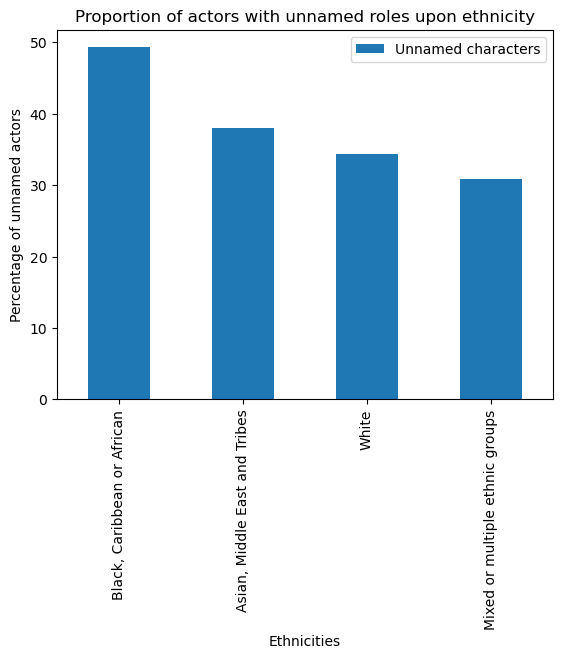

In [85]:
proportion_unnamed_actors = characters_movies.copy().groupby('Ethnic Group').apply(lambda x: pd.Series({
        'Unnamed characters': x['Character name'].isna().sum()*100/len(x['Character name'])
    })).sort_values(ascending=False,by = 'Unnamed characters')
proportion_unnamed_actors.plot(kind='bar')
plt.title("Proportion of actors with unnamed roles upon ethnicity")
plt.xlabel('Ethnicities')
plt.ylabel('Percentage of unnamed actors')

We see that Black, Caribbean or African are the ones with the highest amount of missing values while the other ethnicities have similar amounts of missing actor names. Let's see if this is the case over time:

Text(0, 0.5, 'Proportion of actors')

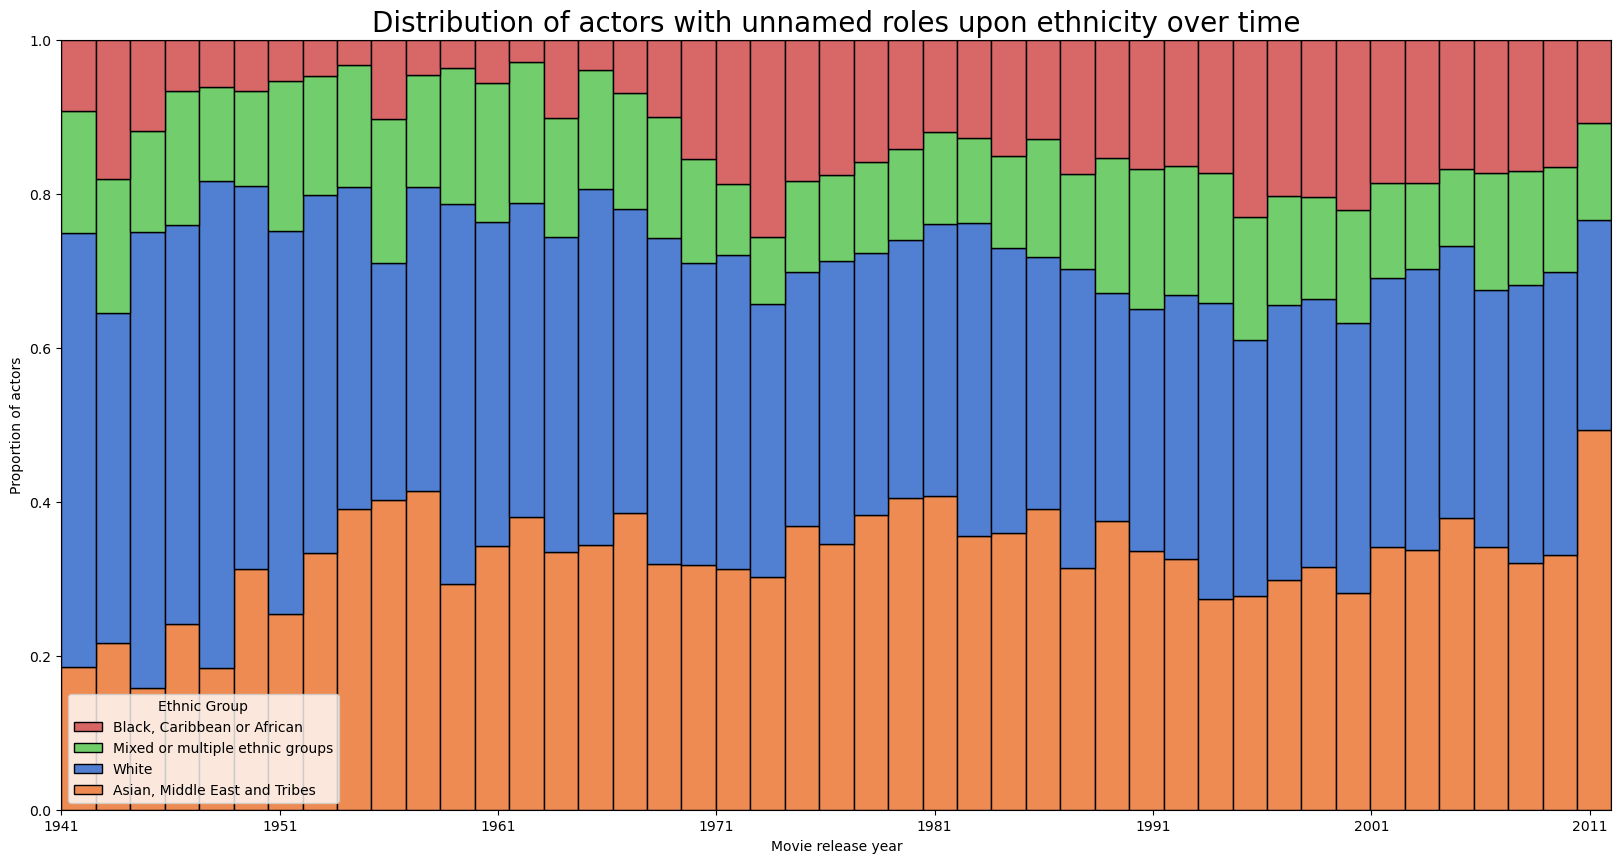

In [86]:
unnamed_actors = characters_movies[characters_movies['Character name'].isna()]
plt.figure(figsize=(20,10))
sns.histplot(data=unnamed_actors,x='Movie release year',hue='Ethnic Group',multiple='fill',palette=ethnic_group_palette,alpha=0.95)
plt.title("Distribution of actors with unnamed roles upon ethnicity over time",fontsize=20)
plt.xticks(np.arange(unnamed_actors['Movie release year'].min(),unnamed_actors['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')


Here we see that despite Black, Caribbean or African, were the ones with higher percentage, since there are not that many actors in comparison to the other ethinc groups, their yearly percentage is lower. Asian, Middle East and Tribes, and White, are the ones with more missing names for each year in proportion to the other groups. 

### <a id='toc1_3_2_'></a>[Diversity score](#toc0_)

In an attempt to vizualize the diversity of movies, we would like to compute the proportion and the number of different unique ethnicity in a movie.

In [87]:
#Compute the proportion of unique ethnicities in a movie cast 
diversity_per_movie = characters_movies.groupby('Wikipedia Movie ID')['Ethnicity'].apply(lambda x : (len(np.unique(x))/len(x))*100)
#Then for each year, find the mean number of unique ethnicities in the cast
diversity_per_movie = pd.DataFrame({'Wikipedia Movie ID': diversity_per_movie.index.values,'Unique ethnicity':diversity_per_movie.values })

characters_movies = characters_movies.merge(diversity_per_movie,how='left',on='Wikipedia Movie ID')

#Try another approch where we take the number of unique ethnicities

#Count the number of unique ethnicities in a movie cast 
number_diversity_per_movie = characters_movies.groupby('Wikipedia Movie ID')['Ethnicity'].apply(lambda x : (len(np.unique(x))))
#Then for each year, find the mean number of unique ethnicities in the cast
number_diversity_per_movie = pd.DataFrame({'Wikipedia Movie ID': number_diversity_per_movie.index.values,'Number unique ethnicity':number_diversity_per_movie.values })

characters_movies = characters_movies.merge(number_diversity_per_movie,how='left',on='Wikipedia Movie ID')

#Count the number of unique ethnic group in a movie cast 
ethnic_group_per_movie = characters_movies.groupby('Wikipedia Movie ID')['Ethnic Group'].apply(lambda x : (len(np.unique(x))))
#Then for each year, find the mean number of unique ethnicities in the cast
ethnic_group_per_movie = pd.DataFrame({'Wikipedia Movie ID': ethnic_group_per_movie.index.values,'Number ethnic group':ethnic_group_per_movie.values })

characters_movies = characters_movies.merge(ethnic_group_per_movie,how='left',on='Wikipedia Movie ID')

Let's vizualize these variables over time to see how "diversity" eveloved over time. We're aware that this analysis lacks precisions and we're going to go deepeer in it later.

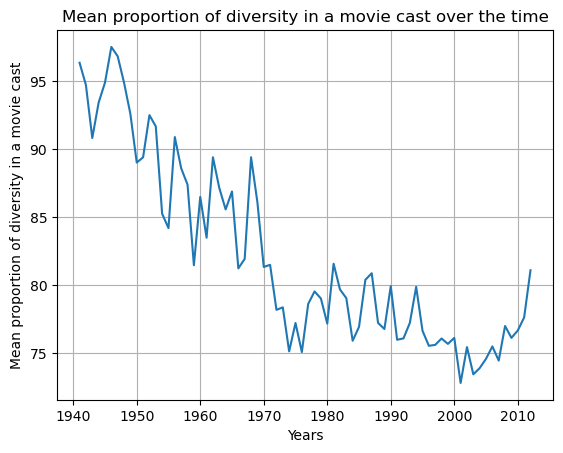

In [88]:
characters_movies.groupby('Movie release year')['Unique ethnicity'].mean().plot()
plt.title('Mean proportion of diversity in a movie cast over the time')
plt.xlabel('Years')
plt.ylabel('Mean proportion of diversity in a movie cast')
plt.grid()

We notice that this variable `Unique ethnicity` isn't a good score to measure the diversity. For example old movies where we have only one ethnicity of actors playing will get a 100% while very diverse movies but with a big cast will have a very bad score. We should find another way of expressing the diversity.

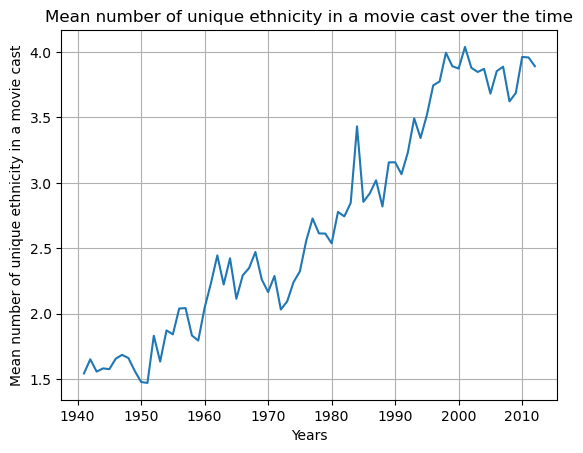

In [89]:
characters_movies.groupby('Movie release year')['Number unique ethnicity'].mean().plot()
plt.title('Mean number of unique ethnicity in a movie cast over the time')
plt.xlabel('Years')
plt.ylabel('Mean number of unique ethnicity in a movie cast')
plt.grid()

We see that the number of unique ethicities is increasing over time which is probably due to the fact that cast get also bigger with time. 
The issue with this second variables is that it does't take in account the proportion of each ethinicities in the cast. For example, if you have 20 white actors, 1 asian, 1 middle east and 1 black one, the score will be of 4 however we can really say that this cast is really diverse.

After these 2 attemps, we managed to create variables that capture the diversity of our movies. As mentionned before these variables are the `Ethnic Diversity Score` and the `Gender Diversity Score`.
The `Ethnic diversity score` roots from the idea that all ethnicities should be of equal percentage in the cast. We have 4 ethnic groups in our analysis so each of them should make up 25% of the cast. In our calculation, we penalise the changes with respect to this 25%, we subtract the difference for each group to 1. When en ethnic group makes up the whole cast this approach would yield -1 as a score. We then rescale the score to go from 0 to 1. We use a similar logic for the gender diversity score

In [90]:
def calculate_diversity_stats(group):
    white_percentage= (group[group['Ethnic Group'] == 'White']['Ethnic Group'].count() / group['Ethnic Group'].count())
    asian_percentage= (group[group['Ethnic Group'] == 'Asian, Middle East and Tribes']['Ethnic Group'].count() / group['Ethnic Group'].count())
    black_percentage= (group[group['Ethnic Group'] == 'Black, Caribbean or African']['Ethnic Group'].count() / group['Ethnic Group'].count())
    mixed_percentage= (group[group['Ethnic Group'] == 'Mixed or multiple ethnic groups']['Ethnic Group'].count() / group['Ethnic Group'].count())
    female_percentage= (group[group['Gender'] == 'F']['Gender'].count() / group['Gender'].count())
    male_percentage= (group[group['Gender'] == 'M']['Gender'].count() / group['Gender'].count())

    return pd.Series({
        'Total Characters': group['Ethnic Group'].count(),
        'White Percentage': white_percentage,
        'Asian Percentage': asian_percentage,
        'Black Percentage': black_percentage,
        'Mixed Percentage': mixed_percentage,
        'Ethnic Diversity Score': (2-abs(white_percentage-0.25)-abs(asian_percentage-0.25)-abs(black_percentage-0.25)-abs(black_percentage-0.25))/2,
        'Gender Diversity Score': (2-abs(female_percentage-0.5)-abs(male_percentage-0.5))/2
    })
ediversity_per_movie = characters_movies.groupby('Wikipedia Movie ID').apply(calculate_diversity_stats).reset_index()

characters_movies=characters_movies.merge(ediversity_per_movie[['Wikipedia Movie ID', 'Ethnic Diversity Score', 'Gender Diversity Score']],how="left",on='Wikipedia Movie ID')

In [91]:
characters_movies.head(4)

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Vote count,Box office revenue,Movie runtime,Movie release year,Main character,Unique ethnicity,Number unique ethnicity,Number ethnic group,Ethnic Diversity Score,Gender Diversity Score
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,299.0,14010832.0,98.0,2001,1,66.666667,2,2,0.416667,0.833333
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,299.0,14010832.0,98.0,2001,1,66.666667,2,2,0.416667,0.833333
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,299.0,14010832.0,98.0,2001,0,66.666667,2,2,0.416667,0.833333
3,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,...,NaN,NaN,95.0,2000,0,100.000000,1,1,0.000000,0.500000


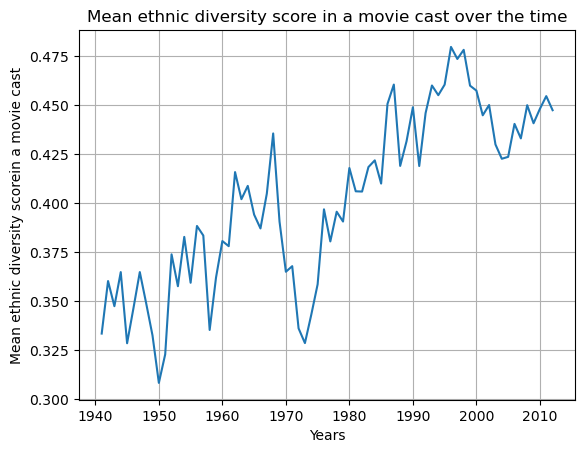

In [92]:
characters_movies.groupby('Movie release year')['Ethnic Diversity Score'].mean().plot()
plt.title('Mean ethnic diversity score in a movie cast over the time')
plt.xlabel('Years')
plt.ylabel('Mean ethnic diversity scorein a movie cast')
plt.grid()

This diversity score seems quite promissing.

### <a id='toc1_3_3_'></a>[Female and male proportion](#toc0_)

In [93]:
# Caluculate the proportion of Female and Male
proportion_gender = characters_movies.groupby('Wikipedia Movie ID')['Gender'].value_counts(normalize=True) * 100
proportion_gender = proportion_gender.unstack()
proportion_gender['Proportion Male'] = proportion_gender['M']
proportion_gender['Proportion Female'] = proportion_gender['F']
proportion_gender = proportion_gender[['Proportion Male', 'Proportion Female']]
proportion_gender = proportion_gender.fillna(0)

main_character_genres = main_character_genres.merge(proportion_gender,how='left',on='Wikipedia Movie ID')

characters_movies = characters_movies.merge(proportion_gender,how='left',on='Wikipedia Movie ID')
characters_movies.head()

,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie runtime,Movie release year,Main character,Unique ethnicity,Number unique ethnicity,Number ethnic group,Ethnic Diversity Score,Gender Diversity Score,Proportion Male,Proportion Female
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,98.0,2001,1,66.666667,2,2,0.416667,0.833333,66.666667,33.333333
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,98.0,2001,1,66.666667,2,2,0.416667,0.833333,66.666667,33.333333
2,975900,2001-08-24,Tres,1959-03-09,M,/m/064b9n,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,...,98.0,2001,0,66.666667,2,2,0.416667,0.833333,66.666667,33.333333
3,3196793,2000-02-16,NaN,1937-11-10,M,/m/0x67,62.0,/m/0lr37dy,NaN,/m/01lntp,...,95.0,2000,0,100.000000,1,1,0.000000,0.500000,100.000000,0.000000
4,156558,2001-06-27,Yvette,1970-09-11,F,/m/0x67,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,...,123.0,2001,1,8.333333,1,1,0.000000,1.000000,50.000000,50.000000


## <a id='toc1_4'></a>[Success analysis](#toc0_)

In this part, we're going to analyse the success of a movie based on different features.

### <a id='toc1_4_1'></a>[Box office revenue analysis](#toc0_)

First let's analysis how is the box office of a movie influenced. 
We will create a `movie_sucess` dataframe that will contain features of each movies while removing the duplicate movie corresponding to the different characters.

In [94]:
#Let's create a dataframe that will contain the movies revenue
movies_success = characters_movies[['Wikipedia Movie ID','Movie name','Box office revenue','Vote average', 'Movie release year',
                                    'Number ethnic group','Ethnic Diversity Score','Gender Diversity Score']].copy()
#Let's drop the duplicate movies, aka the character in the movie to only keep the movie information
movies_success = movies_success.drop_duplicates(subset=['Wikipedia Movie ID'])
movies_success

,Wikipedia Movie ID,Movie name,Box office revenue,Vote average,Movie release year,Number ethnic group,Ethnic Diversity Score,Gender Diversity Score
0,975900,Ghosts of Mars,14010832.0,4.8,2001,2,0.416667,0.833333
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,NaN,NaN,2000,1,0.000000,0.500000
4,156558,Baby Boy,29381649.0,7.3,2001,1,0.000000,1.000000
16,4951456,Kinjite: Forbidden Subjects,3416846.0,NaN,1989,3,0.750000,0.833333
19,2647998,The Human Tornado,NaN,NaN,1976,1,0.000000,0.500000
...,...,...,...,...,...,...,...,...
73558,9310096,Five,NaN,NaN,2003,1,0.250000,0.500000
73559,13093390,The Boys & Girls Guide to Getting Down,NaN,NaN,2006,1,0.500000,0.500000
73560,30751678,Wrestlemaniac,NaN,NaN,2005,1,0.500000,0.500000
73561,27027207,Countdown to Zero,0.0,6.3,2010,1,0.250000,0.500000


We notice that some movie have a budget of zero or are Nan, let's remove so they don't bias the analysis.

In [95]:
#Let's create a sub dataframe for the box office revenue analysis
movies_revenues = movies_success[['Wikipedia Movie ID','Box office revenue' ,'Movie release year',
                                    'Number ethnic group','Ethnic Diversity Score','Gender Diversity Score']].copy()
print(f"Model size after processing : {movies_revenues.shape[0]}")
movies_revenues = movies_revenues[movies_revenues['Box office revenue'] != 0]
print(f"Model size after processing : {movies_revenues.shape[0]}")
#Let's remove all the possible Nan values
movies_revenues = movies_revenues[movies_revenues['Box office revenue'].notna()]
print(f"Model size after processing : {movies_revenues.shape[0]}")

Model size after processing : 25174
Model size after processing : 22954
Model size after processing : 6776


We loose quit a lot of data by doing this processing step but it was necessary to prevent bias analysis. <br>
Let's notice that most of data are lost because of the `Nan` values.

Text(0.5, 1.0, 'Temporal evolution of the box office revenue')

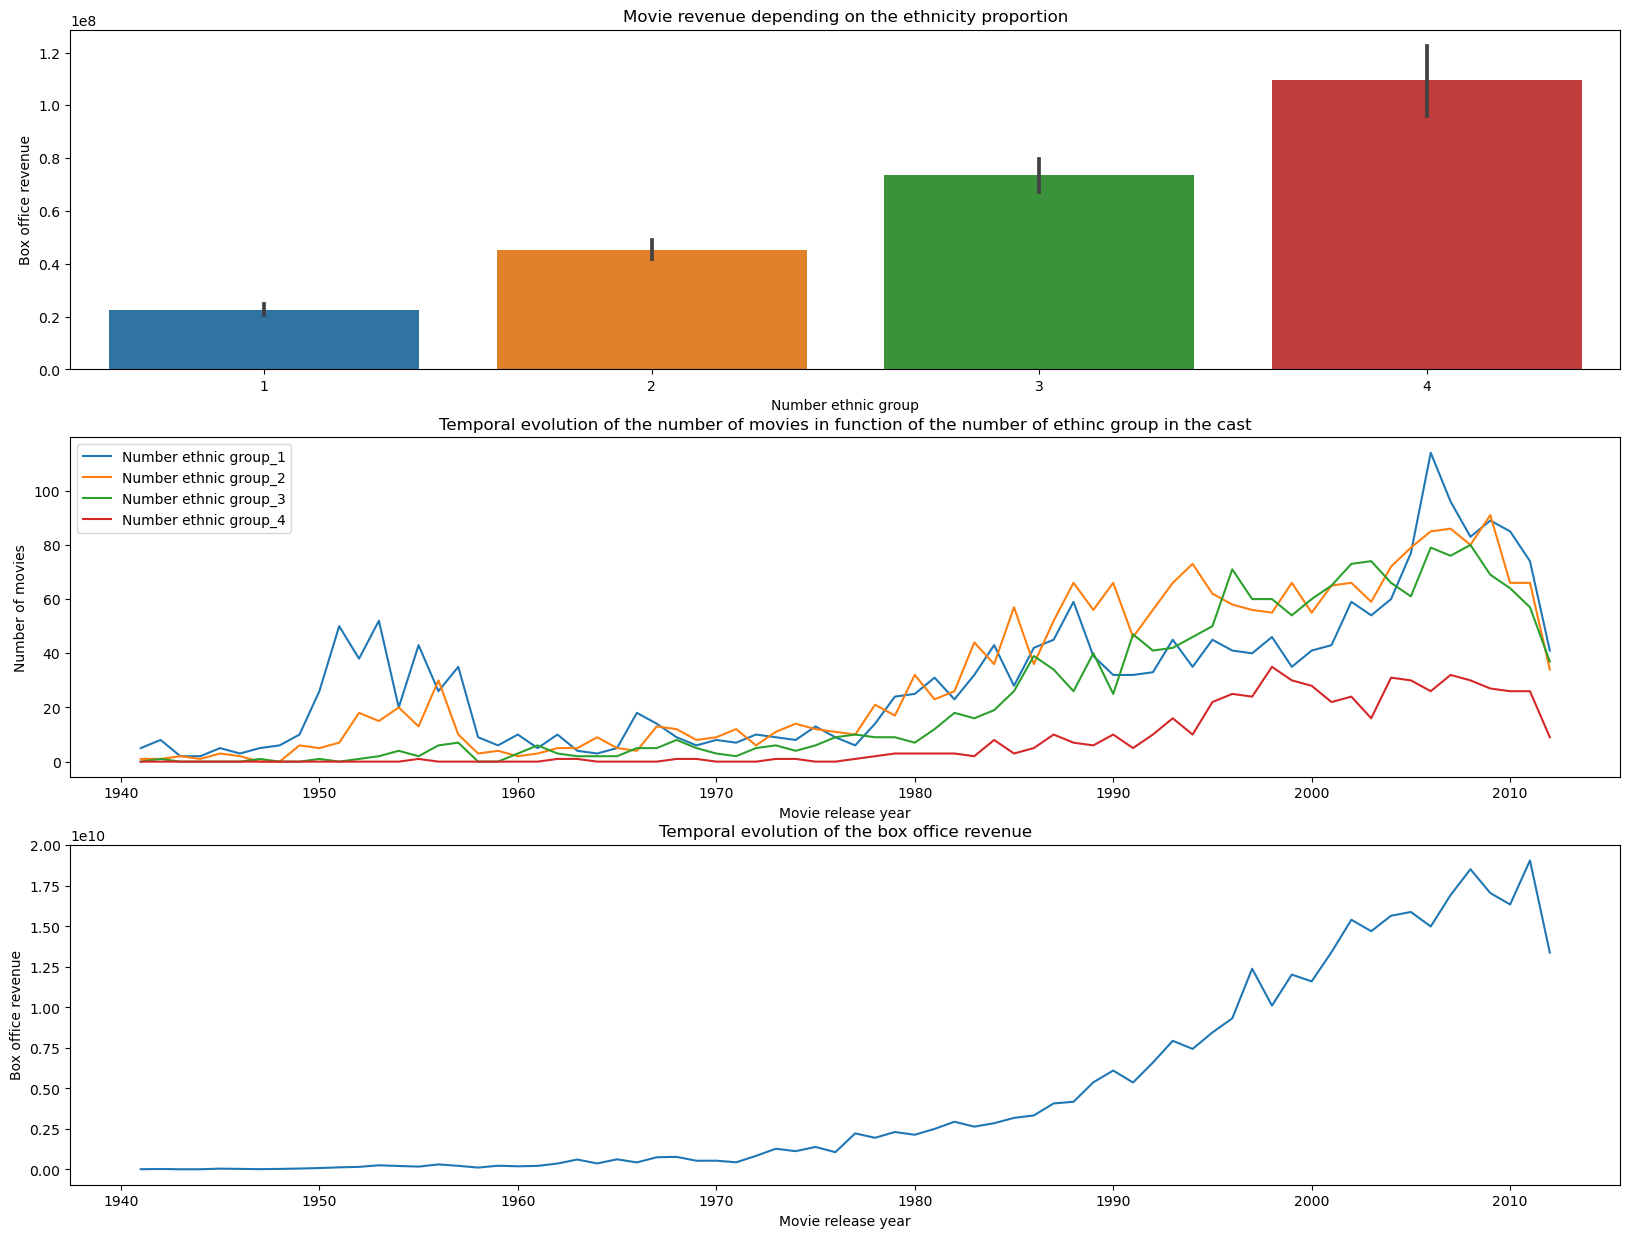

In [96]:
fig, axs = plt.subplots(3,1, figsize=(20, 15))

sns.barplot(data=movies_revenues, x='Number ethnic group', y='Box office revenue',ax=axs[0])
axs[0].set_title('Movie revenue depending on the ethnicity proportion')
axs[0].set_xlim

ethnicity_prop_year = pd.get_dummies(movies_revenues[['Number ethnic group','Movie release year']], columns=['Number ethnic group'])
ethnicity_prop_year = ethnicity_prop_year.groupby('Movie release year').sum()
ethnicity_prop_year.plot(ax=axs[1])
axs[1].set_ylabel("Number of movies")
axs[1].set_title("Temporal evolution of the number of movies in function of the number of ethinc group in the cast")

revenue_year = movies_revenues.groupby('Movie release year')['Box office revenue'].sum()
revenue_year.plot(ax=axs[2])
axs[2].set_ylabel("Box office revenue")
axs[2].set_title("Temporal evolution of the box office revenue")

This plot shows that as there are more ethnicities in a movie, the revenue of the movie tends to increase. However, keep in mind that the uncertainty also increases.

In [97]:
stats.pearsonr(movies_revenues['Number ethnic group'],movies_revenues['Box office revenue'])

PearsonRResult(statistic=0.24557370227608288, pvalue=1.2582066313514338e-93)

The above observation is confirmed by a Pearson correlation test, indeed the two variables are correlated, the differences are statistically significant. We still keep in mind that correlation doesn't imply causation.

In [98]:
from scipy.stats import ttest_ind
from itertools import combinations

for (x,y) in list(combinations(range(1,5),2)):
    p_value=ttest_ind(movies_revenues[movies_revenues['Number ethnic group']==x]['Box office revenue'],
                    movies_revenues[movies_revenues['Number ethnic group']==y]['Box office revenue'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," ethnicities and ", y, " Box office revenue: ",  p_value)

ttest p-value result between  1  ethnicities and  2  Box office revenue:  2.7313472024910987e-25
ttest p-value result between  1  ethnicities and  3  Box office revenue:  3.2429980726162575e-47
ttest p-value result between  1  ethnicities and  4  Box office revenue:  5.348858415567586e-30
ttest p-value result between  2  ethnicities and  3  Box office revenue:  7.36940289710119e-14
ttest p-value result between  2  ethnicities and  4  Box office revenue:  2.882317582628791e-17
ttest p-value result between  3  ethnicities and  4  Box office revenue:  5.491231924807967e-06


We see that the averages of revenues of the various number of ethnicities are statistically different. So, we could search for a causation based on these parameters.

Next, we can check if the different ethnic groups tend to play in movies with different box office revenues.

Text(0, 0.5, 'Box office revenue (log scale)')

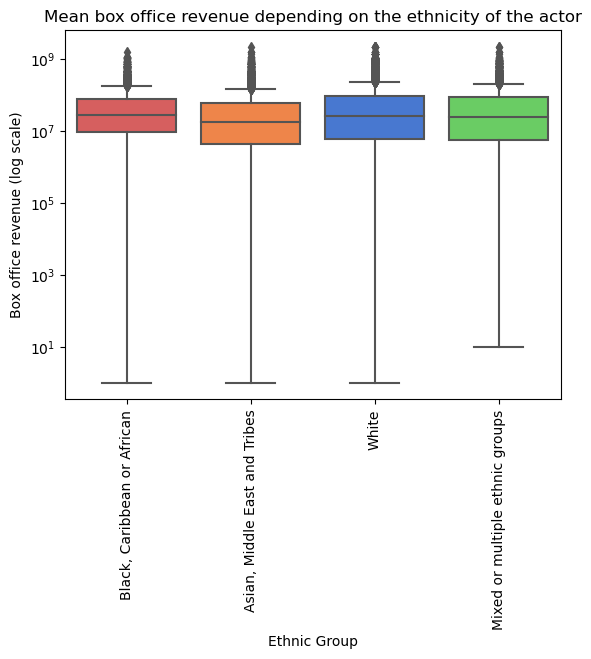

In [99]:
sns.boxplot(data=characters_movies[characters_movies['Box office revenue']!=0], y="Box office revenue", x="Ethnic Group",palette=ethnic_group_palette,saturation=1)
plt.title("Mean box office revenue depending on the ethnicity of the actor")
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel("Box office revenue (log scale)")

In [100]:
ethnic_groups=characters_movies['Ethnic Group'].unique()
for (x,y) in list(combinations(ethnic_groups,2)):
    p_value=ttest_ind(characters_movies[characters_movies['Ethnic Group']==x]['Box office revenue'],
                      characters_movies[characters_movies['Ethnic Group']==y]['Box office revenue'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," and ", y, ": ",  p_value)

ttest p-value result between  Black, Caribbean or African  and  Asian, Middle East and Tribes :  1.6664068574721443e-10
ttest p-value result between  Black, Caribbean or African  and  White :  1.2495461504990916e-18
ttest p-value result between  Black, Caribbean or African  and  Mixed or multiple ethnic groups :  0.13449627399552272
ttest p-value result between  Asian, Middle East and Tribes  and  White :  2.345819632526184e-58
ttest p-value result between  Asian, Middle East and Tribes  and  Mixed or multiple ethnic groups :  9.146729613128931e-16
ttest p-value result between  White  and  Mixed or multiple ethnic groups :  2.237761616311421e-13


We observe that Black, Caribbean or Afcrican actors and actors of mixed background play in movies with similar average box office revenues. The other groups have a statistical difference. We can also see on the graph that white actors tend to play in the movies with highest box office revenues, while the Asian, Middle East and Tribes group appears in those with the lowest revenue.

It's also important to analyze the box office revenue depending on our varaible `Ethnic Diversity Score`.

In [101]:
revenue_div = movies_revenues.groupby('Ethnic Diversity Score')['Box office revenue'].mean()
len(revenue_div.index)

264

The diversity score has too small step, let's rather take the mean of every 0.1 step.

In [102]:
new_revenue_div = []
for i in np.arange(0,1.1,0.1):
    new_revenue_div.append(revenue_div[np.logical_and(revenue_div.index <= i,revenue_div.index > i-0.1)].mean())
new_revenue_div = pd.DataFrame(new_revenue_div)
new_revenue_div.index = np.arange(0,1.1,0.1)

Text(0, 0.5, 'Box office revenue')

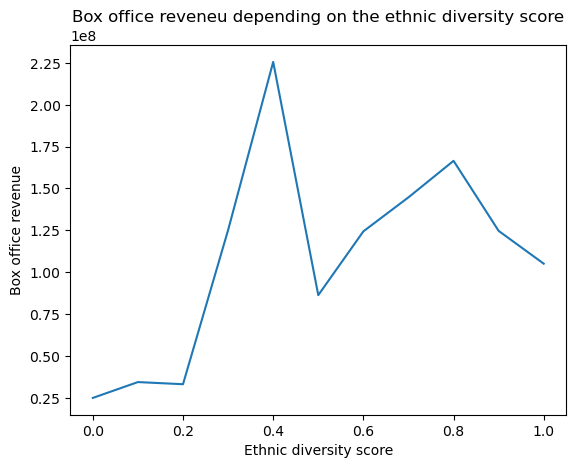

In [103]:
new_revenue_div.plot(legend=None)
plt.title("Box office reveneu depending on the ethnic diversity score")
plt.xlabel('Ethnic diversity score')
plt.ylabel('Box office revenue')

It doens't seem that the diversity score has any linear relation with the box office revenue.

Let's also have a quick look at the movie box office revenue depending on the actor's gender


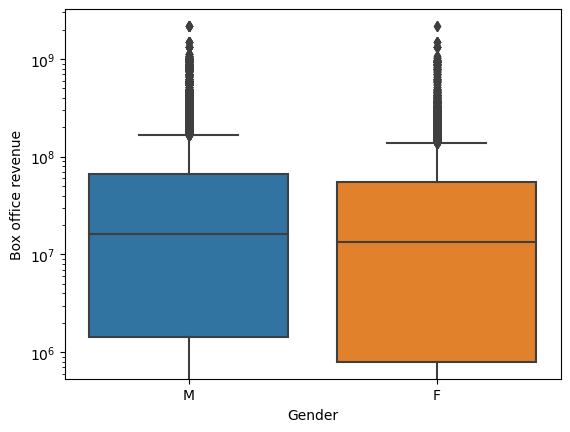

In [104]:
sns.boxplot(data=characters_movies, x="Gender", y="Box office revenue")
plt.yscale('log')

Text(0.5, 1.0, 'Box office revenue depending on the genre')

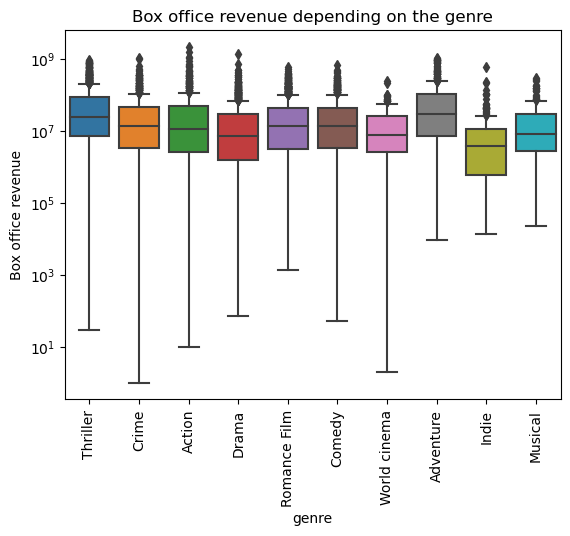

In [105]:
sns.boxplot(data=main_character_genres[main_character_genres['Box office revenue']!=0].drop_duplicates(subset='Wikipedia Movie ID'), x='genre',y='Box office revenue')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title("Box office revenue depending on the genre")

We notice that the most lucrative genre are Adventure movies and conversely, the least lucrative genre tends to be World cinema or the Indie movies.

### <a id='toc1_4_2'></a>[Rating analysis](#toc0_)

Let's know see how the ethnicity influence the rating.

In [106]:
movies_rating = movies_success[['Wikipedia Movie ID','Vote average' ,'Movie release year',
                                    'Number ethnic group','Ethnic Diversity Score','Gender Diversity Score']].copy()

As for the box office revenue, let's remove the Nan values

In [107]:
print(f"Model size after processing : {movies_rating.shape[0]}")
movies_rating = movies_rating[movies_rating['Vote average'] != 0]
#Let's remove all the possible Nan values
movies_rating = movies_rating[movies_rating['Vote average'].notna()]
print(f"Model size after processing : {movies_rating.shape[0]}")

Model size after processing : 25174
Model size after processing : 5149


(5.0, 6.2)

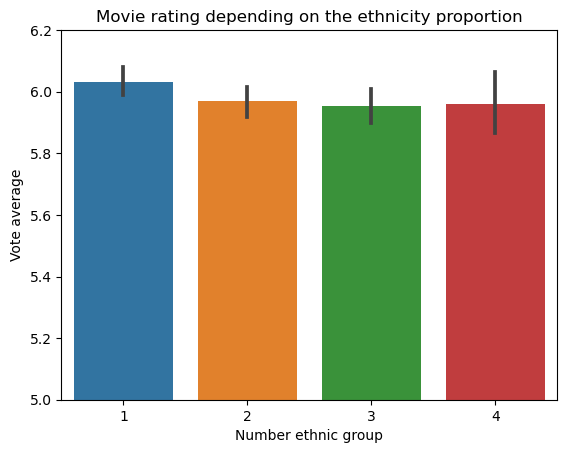

In [108]:
sns.barplot(data=movies_rating, x='Number ethnic group', y='Vote average')
plt.title('Movie rating depending on the ethnicity proportion')
plt.ylim([5, 6.2])

We see that contrary to the revenue, the ratings are much more similar. Nonetheless, we perform a pearson correlation test, to see if there is a relationship between the two, keeping always in mind de difference between causation and correlation.

In [109]:
stats.pearsonr(movies_rating['Number ethnic group'],movies_rating['Vote average'])

PearsonRResult(statistic=-0.030777457202805496, pvalue=0.02721148776906929)

As the p-value of this this test is much smaller than 0.05, we can conclude that despite the small differences, there is a positive statistically significant correlation between the number of ethnicities and the rating of a movie.

In [110]:
for (x,y) in list(combinations(range(1,5),2)):
    p_value=ttest_ind(movies_rating[movies_rating['Number ethnic group']==x]['Vote average'],
                    movies_rating[movies_rating['Number ethnic group']==y]['Vote average'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," ethnicities and ", y, " ethnicities in a movie: ",  p_value)

ttest p-value result between  1  ethnicities and  2  ethnicities in a movie:  0.05789021791526999
ttest p-value result between  1  ethnicities and  3  ethnicities in a movie:  0.03566386452069293
ttest p-value result between  1  ethnicities and  4  ethnicities in a movie:  0.19099017997823314
ttest p-value result between  2  ethnicities and  3  ethnicities in a movie:  0.7047859630543278
ttest p-value result between  2  ethnicities and  4  ethnicities in a movie:  0.8655673533720021
ttest p-value result between  3  ethnicities and  4  ethnicities in a movie:  0.9319831696998361


After the t-test we notice that there are only 2 statistically significant differences in the average of the ratings. This is the case between 1 and 3 as well as 1 and 4 ethnicities present in the movie.


<Axes: xlabel='Vote average', ylabel='Ethnic Group'>

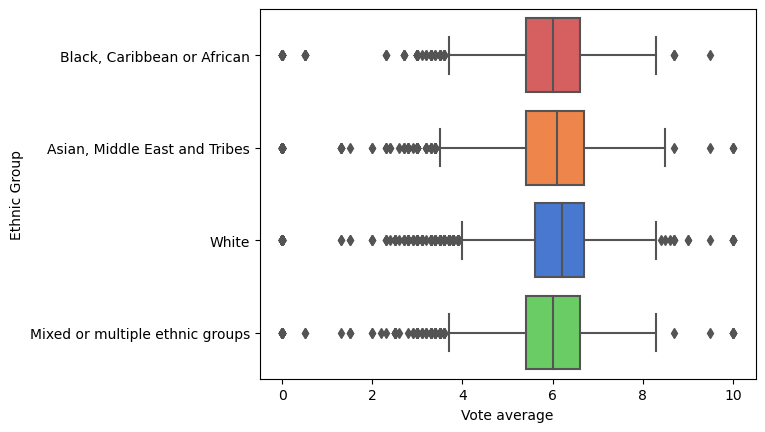

In [111]:
sns.boxplot(data=characters_movies, x="Vote average", y="Ethnic Group",palette=ethnic_group_palette,saturation=1)

In [112]:
for (x,y) in list(combinations(ethnic_groups,2)):
    p_value=ttest_ind(characters_movies[characters_movies['Ethnic Group']==x]['Vote average'],
                      characters_movies[characters_movies['Ethnic Group']==y]['Vote average'], equal_var=False, nan_policy='omit')[1]
    print("ttest p-value result between ", x," and ", y, ": ",  p_value)

ttest p-value result between  Black, Caribbean or African  and  Asian, Middle East and Tribes :  0.15999266343713575
ttest p-value result between  Black, Caribbean or African  and  White :  1.7353638913528163e-18
ttest p-value result between  Black, Caribbean or African  and  Mixed or multiple ethnic groups :  0.2906787839937738
ttest p-value result between  Asian, Middle East and Tribes  and  White :  9.995384165732796e-14
ttest p-value result between  Asian, Middle East and Tribes  and  Mixed or multiple ethnic groups :  0.6954165249247385
ttest p-value result between  White  and  Mixed or multiple ethnic groups :  3.3892772169000495e-16


Let's see if the ethnic diversity score has any relation to the box office revenue.

In [113]:
rating_div = movies_rating.groupby('Ethnic Diversity Score')['Vote average'].mean()
len(rating_div.index)

193

The diversity score has too small step, let's rather take the mean of every 0.1 step.

In [114]:
new_rating_div = []
for i in np.arange(0,1.1,0.1):
    new_rating_div.append(rating_div[np.logical_and(rating_div.index <= i,rating_div.index > i-0.1)].mean())
new_rating_div = pd.DataFrame(new_rating_div)
new_rating_div.index = np.arange(0,1.1,0.1)

Text(0, 0.5, 'Box office revenue')

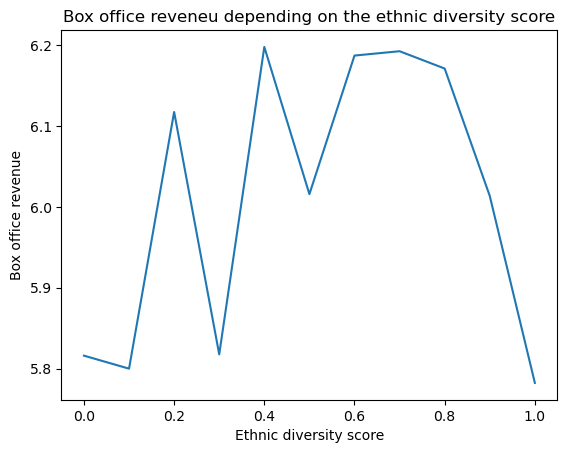

In [115]:
new_rating_div.plot(legend=None)
plt.title("Box office reveneu depending on the ethnic diversity score")
plt.xlabel('Ethnic diversity score')
plt.ylabel('Box office revenue')

### <a id='toc1_4_3_'></a>[Success score](#toc0_)

For the same reason as for the diversity score, we would to have a variable that capture how successful is our model. In order to do so, let's frist analyze a bit how the variables `Budget`, `Vote average` and `Box office revenue`.

/home/alirtabul/Anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



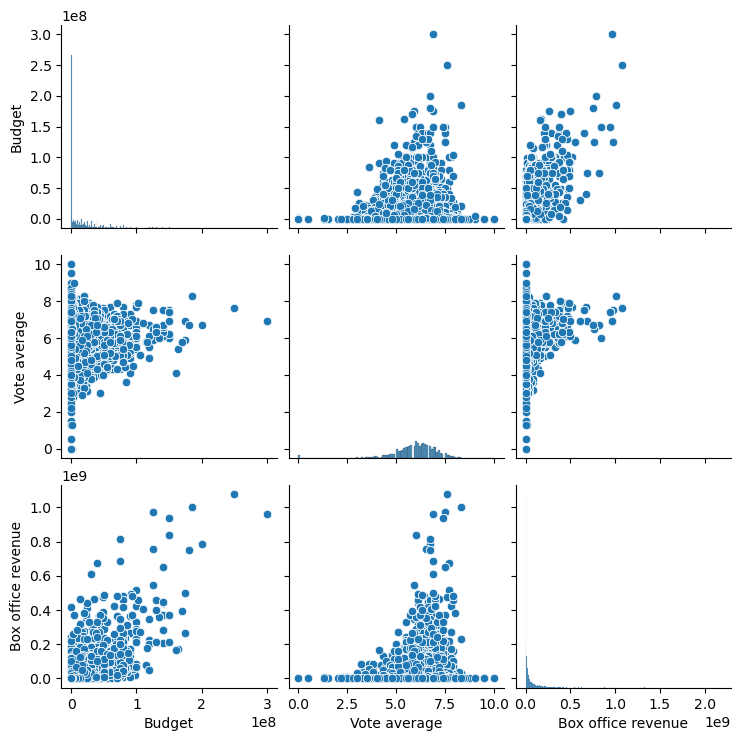

In [116]:
sns.pairplot(data=characters_movies[['Budget', 'Vote average', 'Box office revenue']])

None of these features are linearly dependant. We can the create a score variable without redundant composants.

In [117]:
success_score = characters_movies.copy()
success_score = success_score[success_score['Budget'] != 0]
success_score = success_score[success_score['Box office revenue'] != 0]
characters_movies['Success score'] = ((success_score['Box office revenue']-success_score['Budget']))*success_score['Vote average']

Let's now vizualise the success score and how different it is from its composants.

Text(0.5, 1.0, 'Vote average of movies over time')

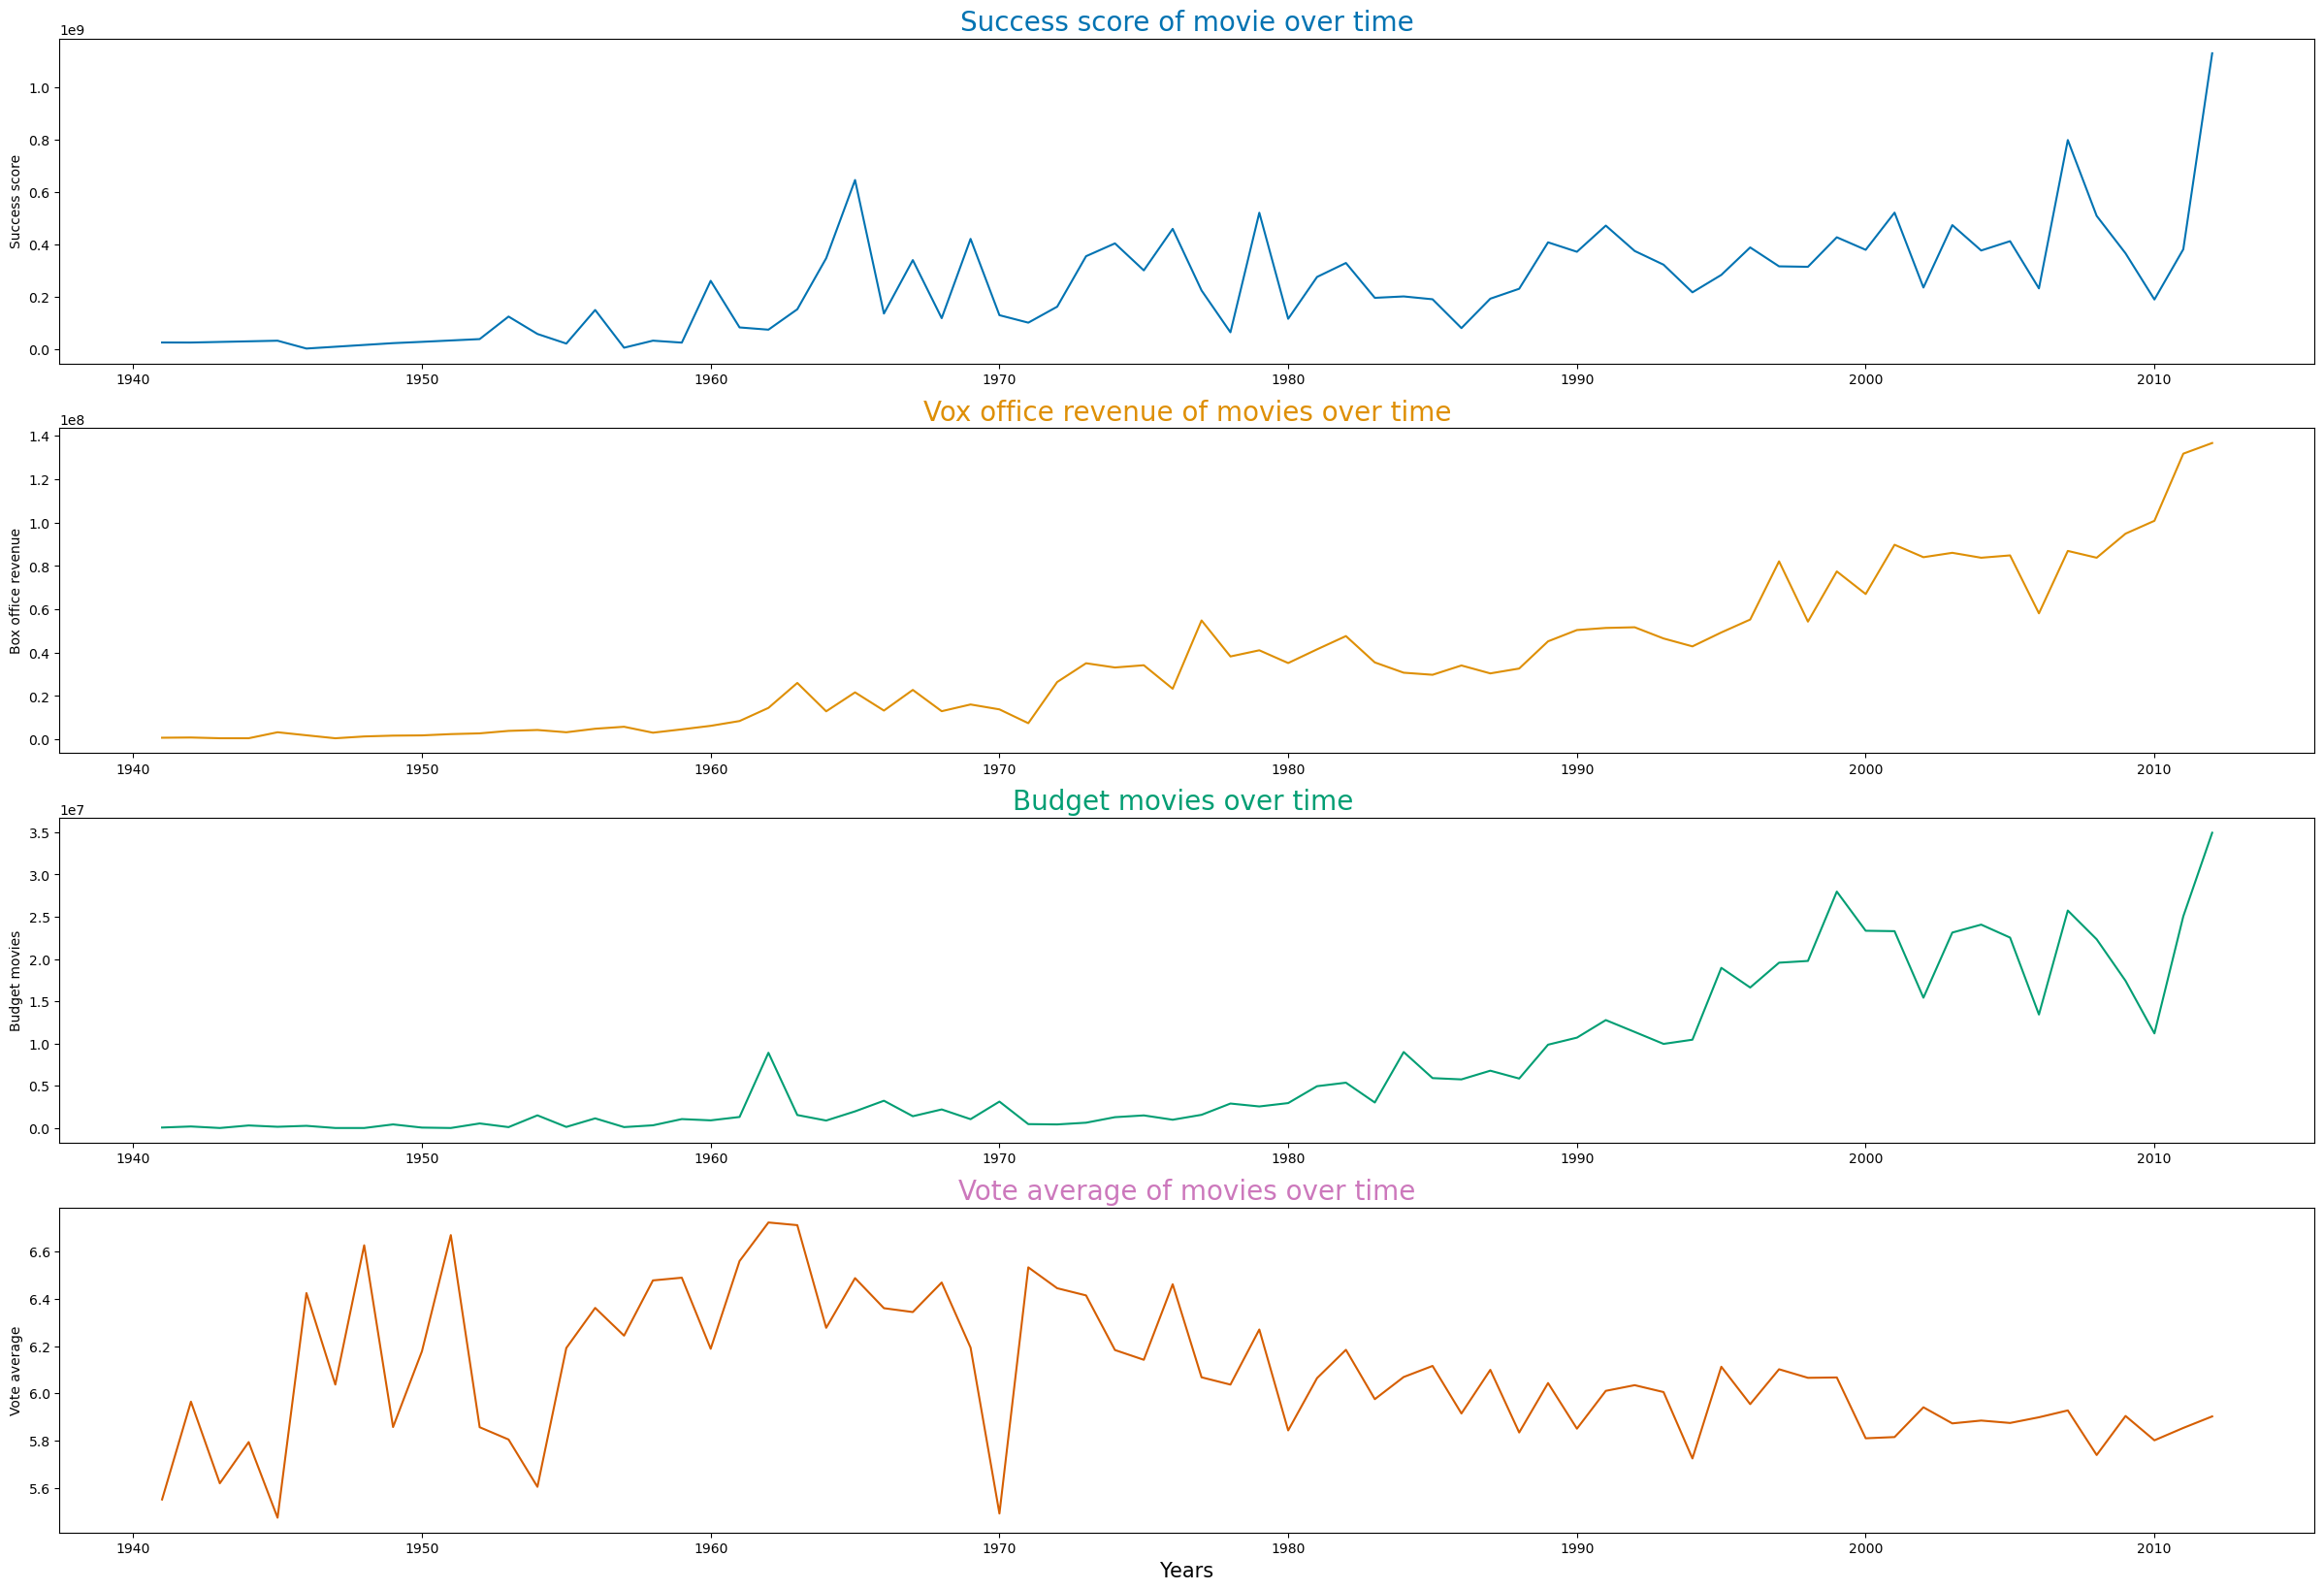

In [118]:
fig, axs = plt.subplots(4,1,figsize=(30,20))

colors = sns.color_palette("colorblind")

#Drop the Nan values of the success score
characters_movies_success  = characters_movies.dropna(subset=['Success score'])
#Drop the infinite values from the success score
characters_movies_success = characters_movies_success[characters_movies_success['Success score'] != np.inf]
#Group by year the movies where the Nan or inf success score have been removed
characters_movies_success = characters_movies_success[characters_movies_success['Success score'] != 0]
characters_movies_years = characters_movies_success.groupby('Movie release year')[['Box office revenue','Budget','Vote average','Success score']].mean()
characters_movies_years['Success score'].plot(ax=axs[0],color =colors[0])
axs[0].set_xlabel(None)
axs[0].set_ylabel('Success score')
axs[0].set_title("Success score of movie over time",fontsize=20,color =colors[0])
#axs[0].set_yscale('log')

#Group by year all the movies
characters_movies_years = characters_movies.groupby('Movie release year')[['Box office revenue','Budget','Vote average','Success score']].mean()
characters_movies_years['Box office revenue'].plot(ax=axs[1],color =colors[1])
axs[1].set_xlabel(None)
axs[1].set_ylabel("Box office revenue")
axs[1].set_title("Vox office revenue of movies over time",fontsize=20,color =colors[1])
characters_movies_years['Budget'].plot(ax=axs[2],color =colors[2])
axs[2].set_xlabel(None)
axs[2].set_ylabel("Budget movies")
axs[2].set_title("Budget movies over time ",fontsize=20,color =colors[2])

characters_movies_years['Vote average'].plot(ax=axs[3],color =colors[3])
axs[3].set_xlabel('Years',fontsize=15)
axs[3].set_ylabel('Vote average')
axs[3].set_title("Vote average of movies over time",fontsize=20,color =colors[4])

In [119]:
# Do it with plotly
import plotly.subplots as sp
import plotly.graph_objects as go

# Create a subplot with 4 rows and 1 column
fig = sp.make_subplots(rows=4, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=characters_movies_years.index, y=characters_movies_years['Success score'], mode='lines', name='Success score'), row=1, col=1)
fig.add_trace(go.Scatter(x=characters_movies_years.index, y=characters_movies_years['Box office revenue'], mode='lines', name='Box office revenue'), row=2, col=1)
fig.add_trace(go.Scatter(x=characters_movies_years.index, y=characters_movies_years['Budget'], mode='lines', name='Budget'), row=3, col=1)
fig.add_trace(go.Scatter(x=characters_movies_years.index, y=characters_movies_years['Vote average'], mode='lines', name='Vote average'), row=4, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Years", row=4, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Success score", row=1, col=1)
fig.update_yaxes(title_text="Box office revenue", row=2, col=1)
fig.update_yaxes(title_text="Budget", row=3, col=1)
fig.update_yaxes(title_text="Vote average", row=4, col=1)

# Update title and height
fig.update_layout(height=800, width=700, title_text="Movie Analysis Over Time")

# Show the plot
# fig.show()
fig.write_html("./Graphs_html/Success_over_time.html")

We can also check what are the 10 most successful movies on each categorie.

Text(0.5, 0.98, 'Top 10 depending on the score')

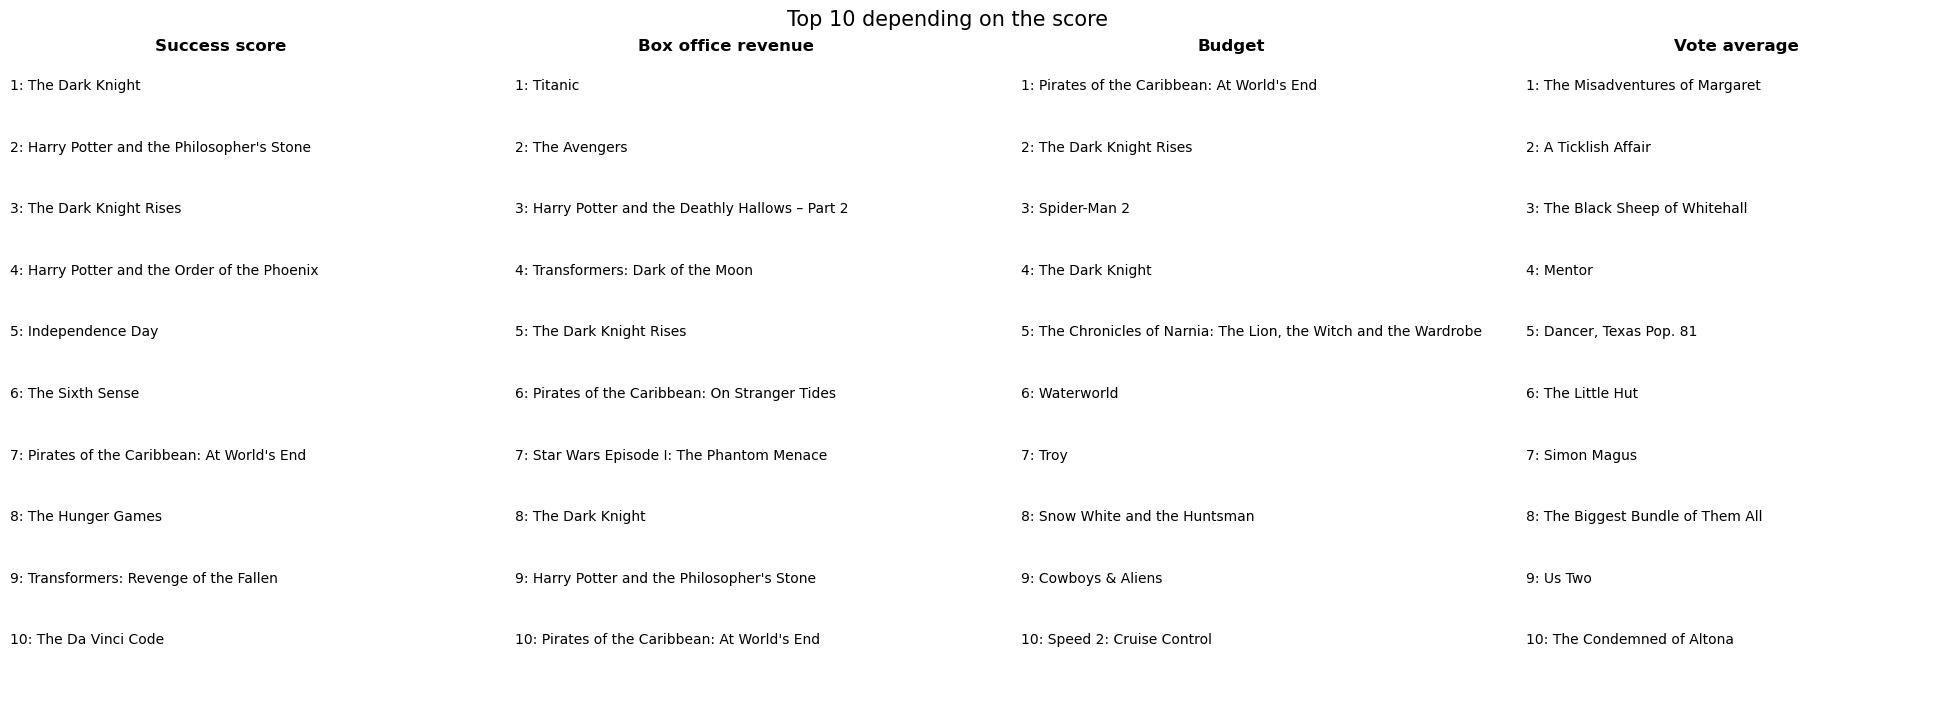

In [120]:
fig, axs = plt.subplots(1,4,figsize=(25,8))

top_success = characters_movies.drop_duplicates(subset='Wikipedia Movie ID').sort_values(by='Success score',ascending=False)['Movie name'][0:10]
top_success.index = np.arange(0,10)
for i in np.arange(10):
    axs[0].text(0,1-i/10,f'{i+1}: {top_success.loc[i]}')
    axs[0].axis('off')
    axs[0].set_title("Success score", y=1.05,fontweight="bold")
top_BOR = characters_movies.drop_duplicates(subset='Wikipedia Movie ID').sort_values(by='Box office revenue',ascending=False)['Movie name'][0:10]
top_BOR.index = np.arange(0,10)
for i in np.arange(10):
    axs[1].text(0,1-i/10,f'{i+1}: {top_BOR.loc[i]}')
    axs[1].axis('off')
    axs[1].set_title("Box office revenue", y=1.05,fontweight="bold")
top_budget = characters_movies.drop_duplicates(subset='Wikipedia Movie ID').sort_values(by='Budget',ascending=False)['Movie name'][0:10]
top_budget.index = np.arange(0,10)
for i in np.arange(10):
    axs[2].text(0,1-i/10,f'{i+1}: {top_budget.loc[i]}')
    axs[2].axis('off')
    axs[2].set_title("Budget", y=1.05,fontweight="bold")
top_vote = characters_movies.drop_duplicates(subset='Wikipedia Movie ID').sort_values(by='Vote average',ascending=False)['Movie name'][0:10]
top_vote.index = np.arange(0,10)
for i in np.arange(10):
    axs[3].text(0,1-i/10,f'{i+1}: {top_vote.loc[i]}')
    axs[3].axis('off')
    axs[3].set_title("Vote average", y=1.05,fontweight="bold")

fig.suptitle("Top 10 depending on the score",fontsize =15)

We can see that expect from the `Vote average` the top 10 among the different movies seems to be relatively similar. The `Success score` seems to be a good metrix as it capture the impact of the financial part but also give smaller movie with good rating to be better classified.

Let's analyse the number of movies where the `Success score` has been calculated.

In [121]:
print(f"Number of movies with Success score calculated : {characters_movies_success['Success score'].shape[0]}")
print(f"Number of movies with Success score calculated : {characters_movies.shape[0]}")

Number of movies with Success score calculated : 8454
Number of movies with Success score calculated : 73563


The `Success score` has only been calculated for a small portion of the dataset. It's then harder to draw any meaningful analysis using this score as the number of data is drastically smaller.

## <a id='toc1_4_'></a>[Machine learning analysis](#toc0_)

We would like to use machine learning tools to see if we can predict the `Box office revenue` value of a movie based on its characteristics, such as diversity, budget or genres. To archieve this objectif, we have to preprocess the dataframe to fit the format needed. It means that we need to select relevant features and binarize the categorical data.

### <a id='toc1_4_1_'></a>[Causal analysis](#toc0_)

A causal analysis is usefull to know how the variables are connected to each others and how do they influence each others. <br>
In our case, we first would like to analysis how the features of the characters in a movie influence its box office revenue. To do so, we'll rely on the correlation coefficient of the characters features on the `Box office revenue` variable. <br>
We also plan to repeat the process and analyse the movie features on its box office revenue.

#### <a id='toc1_4_1_1'></a>[Character analysis](#toc0_)

##### <a id='toc1_4_1_1_1'></a>[Features selection and binarization](#toc0_)

Let's start the feature selection and binarization by selecting properties of characters realted to the movie box office.

In [122]:
print(characters_movies.columns)
characters_movies.head(2)

Index(['Wikipedia Movie ID', 'Movie release date', 'Character name', 'Birth',
       'Gender', 'Ethnicity ID', 'Age at movie release',
       'Freebase character/actor map ID', 'Freebase character ID',
       'Freebase actor ID', 'Ethnicity', 'Ethnic Group', 'Movie name',
       'Movie language', 'Movie countries', 'Movie genres', 'Budget',
       'Plot summary', 'Vote average', 'Vote count', 'Box office revenue',
       'Movie runtime', 'Movie release year', 'Main character',
       'Unique ethnicity', 'Number unique ethnicity', 'Number ethnic group',
       'Ethnic Diversity Score', 'Gender Diversity Score', 'Proportion Male',
       'Proportion Female', 'Success score'],
      dtype='object')


,Wikipedia Movie ID,Movie release date,Character name,Birth,Gender,Ethnicity ID,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,...,Movie release year,Main character,Unique ethnicity,Number unique ethnicity,Number ethnic group,Ethnic Diversity Score,Gender Diversity Score,Proportion Male,Proportion Female,Success score
0,975900,2001-08-24,Desolation Williams,1969-06-15,M,/m/0x67,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,...,2001,1,66.666667,2,2,0.416667,0.833333,66.666667,33.333333,-67148006.4
1,975900,2001-08-24,Commander Helena Braddock,1949-05-26,F,/m/0x67,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,...,2001,1,66.666667,2,2,0.416667,0.833333,66.666667,33.333333,-67148006.4


For the characters features we should consider specificity of each characters and the movie contexte. However for now we're not going to consider the additional variables we have computed such as `Gender diersity score` or `Proportion of Male`, as their regroup all characters properties of the movie. Fow now we focus more on the impact of each individual character.

In [123]:
selected_features = ['Age at movie release','Ethnic Group','Movie language','Movie countries','Movie genres','Gender', 'Budget',
                     'Box office revenue','Movie runtime','Movie release year','Success score']
model_original = characters_movies[selected_features]
model_original.head(3)

,Age at movie release,Ethnic Group,Movie language,Movie countries,Movie genres,Gender,Budget,Box office revenue,Movie runtime,Movie release year,Success score
0,32.0,"Black, Caribbean or African",[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",M,28000000.0,14010832.0,98.0,2001,-67148006.4
1,52.0,"Black, Caribbean or African",[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",F,28000000.0,14010832.0,98.0,2001,-67148006.4
2,42.0,"Asian, Middle East and Tribes",[english language],[united states of america],"[Thriller, Science Fiction, Horror, Adventure,...",M,28000000.0,14010832.0,98.0,2001,-67148006.4


As we're going to use the `Box office revenue` and the `Budget` for our analysis, it is important to remove all Nan or zeros values from them.

In [124]:
print(f"Model size after processing : {model_original.shape[0]}")
model_processing = model_original.copy()
model_processing = model_processing[model_processing['Box office revenue'] != 0]
model_processing = model_processing[model_processing['Budget'] != 0]
#Let's remove all the possible Nan values
print(f"Model size after processing : {model_processing.shape[0]}")
model_processing = model_processing[model_processing['Box office revenue'].notna()]
model_processing = model_processing[model_processing['Budget'].notna()]
print(f"Model size after processing : {model_processing.shape[0]}")

Model size after processing : 73563
Model size after processing : 62987
Model size after processing : 8460


The model is drastically smaller after the processing step

In [125]:
print(f"Number of Nan value in the Box office revenue: {model_original['Box office revenue'].isna().sum()}")
print(f"Number of Nan value in the Budget: {model_original['Budget'].isna().sum()}")
print(f"Number of Nan value in the Success score: {model_original['Success score'].isna().sum()}")

Number of Nan value in the Box office revenue: 38509
Number of Nan value in the Budget: 54527
Number of Nan value in the Success score: 65103


The model is drastically smaller after the processing step and by deeper analysis we can notice that it is due to the fact that removing 0 and Nan Budget makes the model smaller. <br>
For a relevant analysis of movie feature is it important to have the highest number of data as possible, thus for now let's ignore the Budget 0 and Nan values and focus on other features. The `Success score` also contains a lot of Nan values, thus we're also going to first ignore this variable for the analysis.

In [126]:
print(f"Model size after processing : {model_original.shape[0]}")
model = model_original.copy()
model = model[model['Box office revenue'] != 0]
#Let's remove all the possible Nan values
model = model[model['Box office revenue'].notna()]
print(f"Model size after processing : {model.shape[0]}")

Model size after processing : 73563
Model size after processing : 29292


By ignoring the Budget, we have now a decently big dataframe which can be used for more accurate predictions.

Also it would be interesting to quickly see what kind of movies we're mostly discrading.

The variables in the columns `Movie language`, `Movie countries` and `Movie genres` could be binarized but this process will make the model huge and with a lot of unrevelevant variables (for example an movie language in italian or in spanish won't probably drastically change its success). To solve this issue we should investigate more the dataset on these categories. <br>
Let's strat handling the language and countries.

In [127]:
print(f"Number of different languages in the dataset : {len(model['Movie language'].value_counts())}")
model['Movie language'].value_counts().head(10)

Number of different languages in the dataset : 520


Movie language
[english language]                       21206
[english language, spanish language]       993
[french language, english language]        636
[italian language, english language]       340
[n, a, n]                                  310
[german language, english language]        222
[russian language, english language]       214
[korean language]                          155
[japanese language, english language]      136
[french language]                          135
Name: count, dtype: int64

In [128]:
print(f"Number of different countries in the dataset : {len(model['Movie countries'].value_counts())}")
model['Movie countries'].value_counts().head(10)

Number of different countries in the dataset : 424


Movie countries
[united states of america]                             19624
[united states of america, united kingdom]              1758
[united states of america, germany]                     1007
[united kingdom]                                         691
[united states of america, canada]                       571
[united states of america, australia]                    322
[india]                                                  320
[united states of america, france]                       243
[united states of america, united kingdom, germany]      227
[south korea]                                            191
Name: count, dtype: int64

We notice that movies are mostly distributed in English and come from the USA. <br>
For the model binarization, we can set a category to indicate if the movie is in english (True/False) and if it comes from the USA or not. <br>
Also one can argue that most movies from the USA are in englsih and vice versa, making the 2 variables redundant. To deeper investigate the issue, we'll first binarize the model.

Concerning the movie genres, we are going to binarize the categories upon the top 10 of the most represented movie genres.

We can now binarize the categorical columns of the dataset. These categories are `Gender`, `Ethnic group`, `Movie language`, `Movie countries` and `genre`. As a reminder, 0 corresponds to `False` whereas 1 correpsonds to `True`.

In [129]:
%%capture
#Binarize the language category
model.loc[:,'English language'] = model['Movie language'].apply(lambda x: 1 if 'english language' in x else 0)
#model.loc[:,'Hindi language'] = model['Movie language'].apply(lambda x: 1 if 'hindi language' in x else 0 )

#Binarize the country category
model.loc[:,'USA'] = model['Movie countries'].apply(lambda x: 1 if ('united states of america') in x else 0)
#model.loc[:,'India'] = model['Movie countries'].apply(lambda x: 1 if ('india') in x else 0)

#Binarize the genres category
for genre in main_genres.index:
    model[genre] = model['Movie genres'].apply(lambda x: 1 if genre in x else 0)

#Binarize the gender and the genre
model = pd.get_dummies(model, columns=['Gender','Ethnic Group'], dtype=int)
#Remove the "Ethnic Group_" prefix in the new columns
model.columns = model.columns.str.replace('Ethnic Group_','')

#Drop all the categorical columns
model = model.drop(columns=['Movie language','Movie countries','Movie genres'])

Let's check if there are still some remaining missing values

In [130]:
model.isna().value_counts()

Age at movie release  Budget  Box office revenue  Movie runtime  Movie release year  Success score  English language  USA    Drama  Comedy  Romance Film  Action  World cinema  Thriller  Crime  Indie  Adventure  Musical  Gender_F  Gender_M  Asian, Middle East and Tribes  Black, Caribbean or African  Mixed or multiple ethnic groups  White
False                 True    False               False          False               True           False             False  False  False   False         False   False         False     False  False  False      False    False     False     False                          False                        False                            False    16018
                      False   False               False          False               False          False             False  False  False   False         False   False         False     False  False  False      False    False     False     False                          False                        False        

As mentionned before let's verify if american (from USA) are mostly in english and vice versa.

In [131]:
print(f"Proportion of american (USA) movie in english {(np.logical_and(model['USA'] == 1, model['English language']==1).sum())/model[model['USA'] == 1]['USA'].count()*100:.2f}")

Proportion of american (USA) movie in english 98.84


In [132]:
print(f"Proportion of englsih movie from the USA {(np.logical_and(model['USA'] == 1, model['English language']==1).sum())/model[model['English language'] == 1]['English language'].count()*100:.2f}")

Proportion of englsih movie from the USA 93.22


Most of the movie from the USA are in english but a lower proportion of englsih movie come from the USA. The condition `USA` is mainly redundant with the `English language` condition and therefore `USA` can be removed.

In [133]:
model = model.drop(columns= 'USA',axis=1)

##### <a id='toc1_4_1_1_2'></a>[Features correlation analysis](#toc0_)

In order to process to a regression analysis, it is necessary to normalize the data.

In [134]:
import statsmodels.formula.api as smf
#First standardize the features
model_norm = model.copy()
for column in model_norm.columns:
    model_norm[column] = (model[column] - model[column].mean())/model[column].std()
model_norm.columns = model_norm.columns.str.replace('Asian, Middle East and Tribes','Asian')
model_norm.columns = model_norm.columns.str.replace('Black, Caribbean or African','Black')
model_norm.columns = model_norm.columns.str.replace('Mixed or multiple ethnic groups','Mixed')
model_norm.columns = model_norm.columns.str.replace('Action/Adventure','Action_Adventure')
model_norm.columns = model_norm.columns.str.replace(' ','_')
model_norm.describe()

,Age_at_movie_release,Budget,Box_office_revenue,Movie_runtime,Movie_release_year,Success_score,English_language,Drama,Comedy,Romance_Film,...,Crime,Indie,Adventure,Musical,Gender_F,Gender_M,Asian,Black,Mixed,White
count,2.929200e+04,1.327400e+04,2.929200e+04,2.929200e+04,2.929200e+04,8.460000e+03,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,...,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04,2.929200e+04
mean,-1.649492e-16,-2.355272e-17,-1.164347e-17,-5.239561e-17,4.257629e-15,-2.183701e-17,-6.209850e-17,-3.104925e-17,4.657388e-17,1.358405e-17,...,-1.698006e-17,1.940578e-18,3.104925e-17,1.552463e-17,-6.694995e-17,-7.083111e-17,-4.269272e-17,-6.986082e-17,5.045504e-17,-1.552463e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.713744e+00,-6.571066e-01,-5.152198e-01,-4.790090e+00,-4.393855e+00,-1.080358e+00,-4.748247e+00,-1.097279e+00,-9.141416e-01,-6.011598e-01,...,-2.263471e-02,-3.903927e-01,-4.039308e-01,-2.352392e-01,-7.045435e-01,-1.419310e+00,-4.633275e-01,-4.432428e-01,-5.165620e-01,-9.016277e-01
25%,-6.996002e-01,-6.571066e-01,-4.760689e-01,-6.892996e-01,-3.915033e-01,-4.504564e-01,2.105968e-01,-1.097279e+00,-9.141416e-01,-6.011598e-01,...,-2.263471e-02,-3.903927e-01,-4.039308e-01,-2.352392e-01,-7.045435e-01,-1.419310e+00,-4.633275e-01,-4.432428e-01,-5.165620e-01,-9.016277e-01
50%,-1.241306e-01,-3.915606e-01,-3.588266e-01,-2.124636e-01,2.363166e-01,-3.236755e-01,2.105968e-01,9.113138e-01,-9.141416e-01,-6.011598e-01,...,-2.263471e-02,-3.903927e-01,-4.039308e-01,-2.352392e-01,-7.045435e-01,7.045435e-01,-4.633275e-01,-4.432428e-01,-5.165620e-01,-9.016277e-01
75%,5.952065e-01,2.801146e-01,2.379488e-02,4.551069e-01,7.071815e-01,4.216611e-02,2.105968e-01,9.113138e-01,1.093885e+00,1.663394e+00,...,-2.263471e-02,-3.903927e-01,-4.039308e-01,-2.352392e-01,1.419310e+00,7.045435e-01,-4.633275e-01,-4.432428e-01,-5.165620e-01,1.109067e+00
max,3.976091e+00,8.715105e+00,1.366430e+01,6.081772e+00,1.178046e+00,7.464051e+00,2.105968e-01,9.113138e-01,1.093885e+00,1.663394e+00,...,4.417843e+01,2.561436e+00,2.475587e+00,4.250846e+00,1.419310e+00,7.045435e-01,2.158227e+00,2.256023e+00,1.935810e+00,1.109067e+00


In [135]:
mod = smf.ols(formula='Box_office_revenue ~  C(Asian) + C(Black) + C(Mixed)+ C(White) + C(Gender_M) + C(Gender_F)', data=model_norm)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Box_office_revenue   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     48.27
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.58e-40
Time:                        21:14:45   Log-Likelihood:                -41467.
No. Observations:               29292   AIC:                         8.294e+04
Df Residuals:                   29287   BIC:                         8.299e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Text(0, 0.5, 'Features')

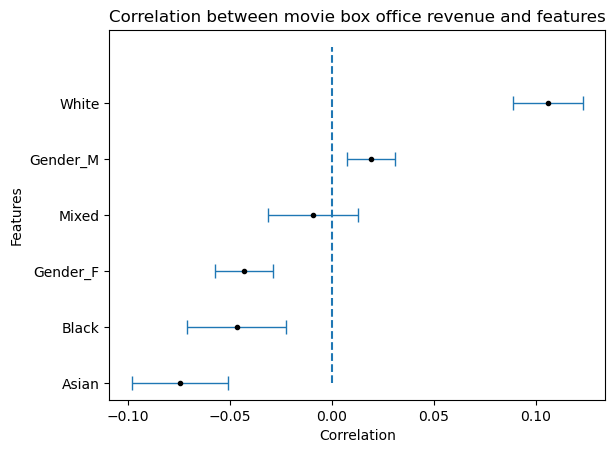

In [136]:
# ---- We took the following code from the Exercice on Causal analysis ----

# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)

#Change the format of the labels
labels = []
for i in np.arange(0,len(l2)):
    label = l2[i].split('(')[1]
    label = label.split(')')[0]
    labels.append(label)
labels

# fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')


plt.yticks(range(len(l2)),labels)

plt.title("Correlation between movie box office revenue and features")
plt.xlabel('Correlation')
plt.ylabel('Features')

As we can see beeing of a specific ethinicity seems to have a bigger impact on the movie success. As expected, we see that people of color and women are the categories that lie in the negative side. These are societal biases and not a measure of the talent or quality of work of the actors in these categories. 

However in general it is always better perform the analysis taking in account the highest number of factors to exactly isolate the influence of each individual feature. Therefore let's now perform the analysis using all the selected features. <br>
Let's also compare the results when taking or not the `Budget` in account.

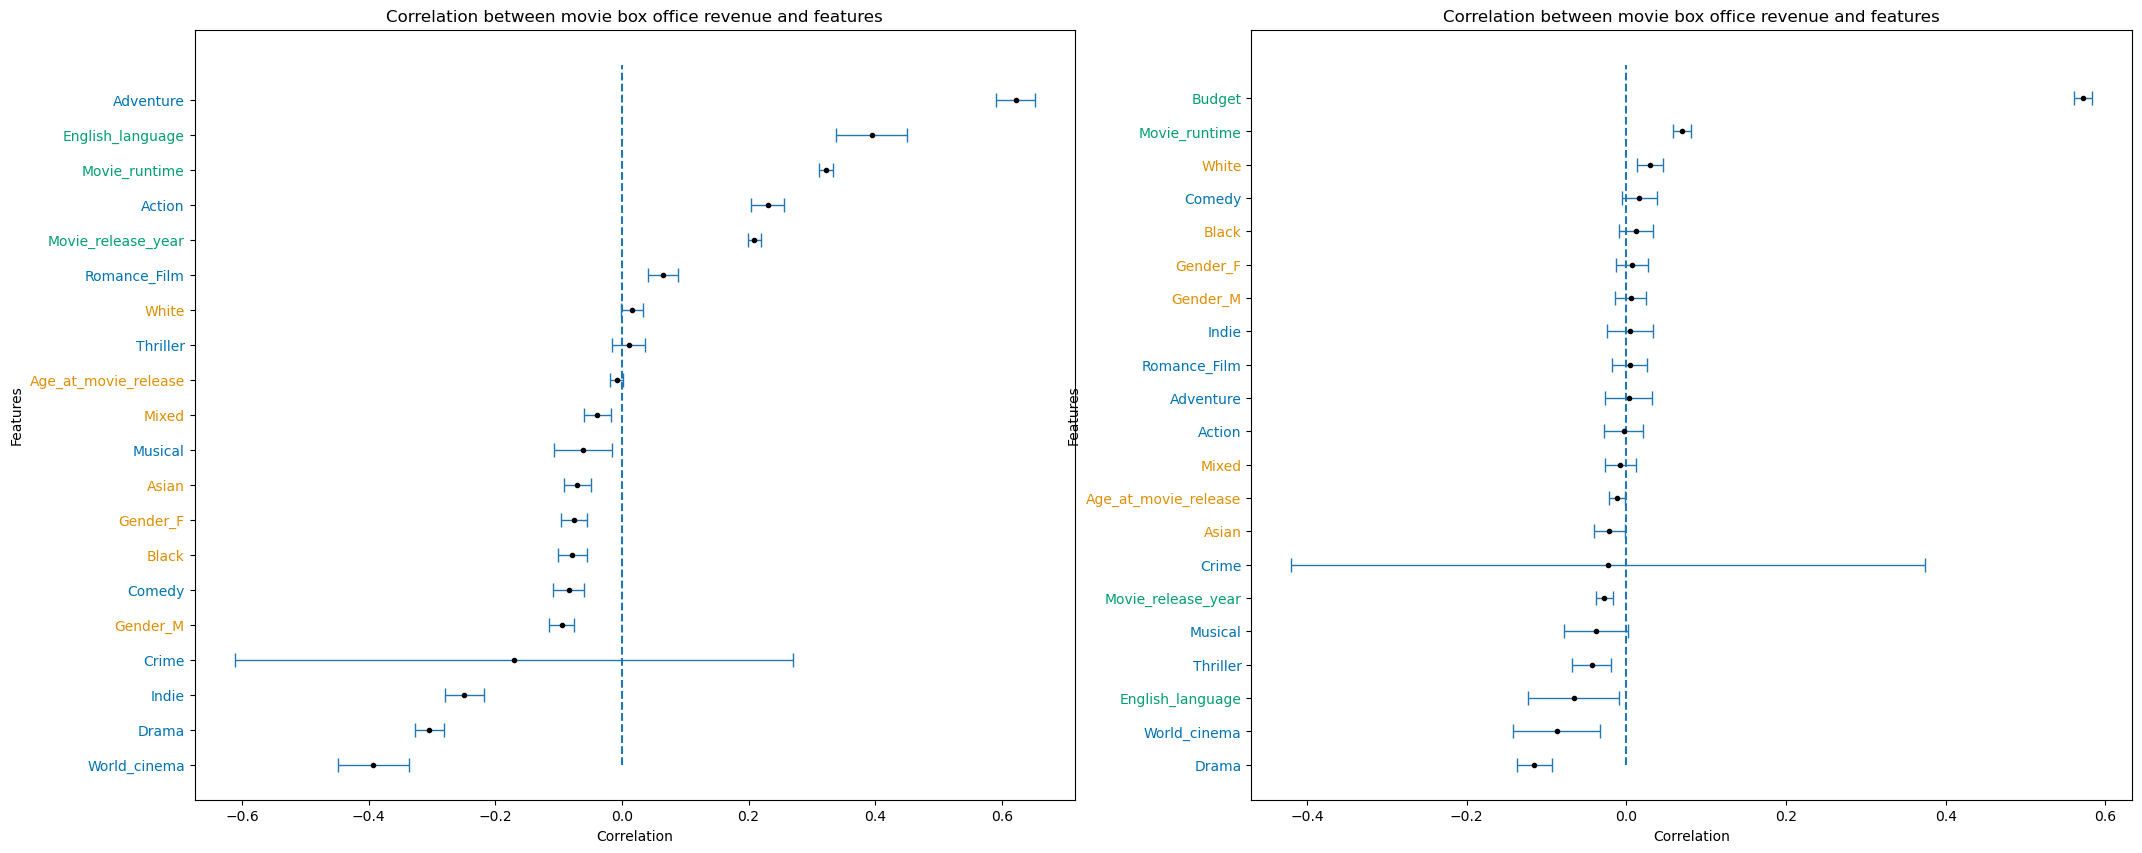

In [137]:
mod = smf.ols(formula='Box_office_revenue ~  Age_at_movie_release + Movie_runtime  + Movie_release_year +\
                C(English_language) + C(Gender_M) + C(Gender_F)+ C(Asian) + C(Black)+ \
                C(Mixed)+ C(White) + C(Action) + C(Adventure) + C(Comedy) + C(Crime) + C(Drama) + C(Indie) + \
                C(Romance_Film) + C(Musical) + C(Thriller) + C(World_cinema)', data=model_norm)
res = mod.fit()

# feature names
variables = res.params.index

# coefficients
coefficients = res.params.values
# p-values
p_values = res.pvalues
# standard errors
standard_errors = res.bse.values

# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

labels = []
for i in np.arange(0,len(l2)):
    if('(' in (l2[i])):
        label = l2[i].split('(')[1]
        label = label.split(')')[0]
        labels.append(label)
    else:
        labels.append(l2[i])

#Let's plot the results
fig, axs = plt.subplots(1,2,figsize = (25,10))        

axs[0].errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
        linestyle = 'none',marker = 'o',markersize= 3,
        markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

axs[0].set_yticks(range(len(l2)),labels)
axs[0].vlines(0,0, len(l1), linestyle = '--')
axs[0].set_title("Correlation between movie box office revenue and features")
axs[0].set_xlabel('Correlation')
axs[0].set_ylabel('Features')

#Let's colorate the axis depending on the categorie
movie_genres_labels = ['Adventure','Action','Romance_Film','Thriller','Musical','Comedy','Crime','Indie','Drama','World_cinema']
actor_labels = ['White','Age_at_movie_release','Mixed','Asian','Gender_F','Black','Gender_M']
movie_labels =['English_language','Movie_runtime','Movie_release_year','Budget']
colorblind = sns.color_palette("colorblind")
for i in np.arange(0,len(labels)):
    if(labels[i] in movie_genres_labels):
        axs[0].get_yticklabels()[i].set_color(colorblind[0])
    if(labels[i] in actor_labels):
        axs[0].get_yticklabels()[i].set_color(colorblind[1])
    if(labels[i] in movie_labels):
        axs[0].get_yticklabels()[i].set_color(colorblind[2])

#Repeat the process but adding the Budget
mod = smf.ols(formula='Box_office_revenue ~  Age_at_movie_release + Movie_runtime  + Movie_release_year + Budget +\
        C(English_language) + C(Gender_M) + C(Gender_F)+ C(Asian) + C(Black)+ \
        C(Mixed)+ C(White) + C(Action) + C(Adventure) + C(Comedy) + C(Crime) + C(Drama) + C(Indie) + \
        C(Romance_Film) + C(Musical) + C(Thriller) + C(World_cinema)', data=model_norm)
res = mod.fit()

# feature names
variables = res.params.index

# coefficients
coefficients = res.params.values
# p-values
p_values = res.pvalues
# standard errors
standard_errors = res.bse.values

# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

labels = []
for i in np.arange(0,len(l2)):
    if('(' in (l2[i])):
        label = l2[i].split('(')[1]
        label = label.split(')')[0]
        labels.append(label)
    else:
        labels.append(l2[i])

axs[1].errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
        linestyle = 'none',marker = 'o',markersize= 3,
        markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

axs[1].set_yticks(range(len(l2)),labels)
axs[1].vlines(0,0, len(l1), linestyle = '--')
axs[1].set_title("Correlation between movie box office revenue and features")
axs[1].set_xlabel('Correlation')
axs[1].set_ylabel('Features')

#Let's colorate the axis depending on the categorie
for i in np.arange(0,len(labels)):
    if(labels[i] in movie_genres_labels):
        axs[1].get_yticklabels()[i].set_color(colorblind[0])
    if(labels[i] in actor_labels):
        axs[1].get_yticklabels()[i].set_color(colorblind[1])
    if(labels[i] in movie_labels):
        axs[1].get_yticklabels()[i].set_color(colorblind[2])

When looking at the analysis without taking the `Budget` in account, it seems that the most positively impactful factors are the genres `Adventure`and `Action`, and the movie characteristics `English language`, `Movie runtime` and `Movie_release_year`. On the other side, the negatively impactfull factors are related to the movie genre. It appears that the actors characteristics don't really impact much the movie success compare to other factors. Intristingaly `Crime` is a genre that is highly variable on the impact on the `Box office revenue`.

When taking in account the `Budget`, we are working with a drastically smaller dataset where it's harder to generalize but let's still analyse the results.On the global picture, the budget is the factor that has the most effect on the box office revenue annd all other factors seem to have a negigeable impact compare to it.

In both cases, eventhough the actors characteristics seem to have an impact to the movie `Box office revenue`, this impact is signigicantly smaller compared to other factors such as the movie genre or characteristics (language, runtime).

As explained before `Success score` contains as much `Nan` values as the `Budget` and they both reduce drasically the size of the dataset. For the next analysis let's consider the same features as before but on the `Success score`.

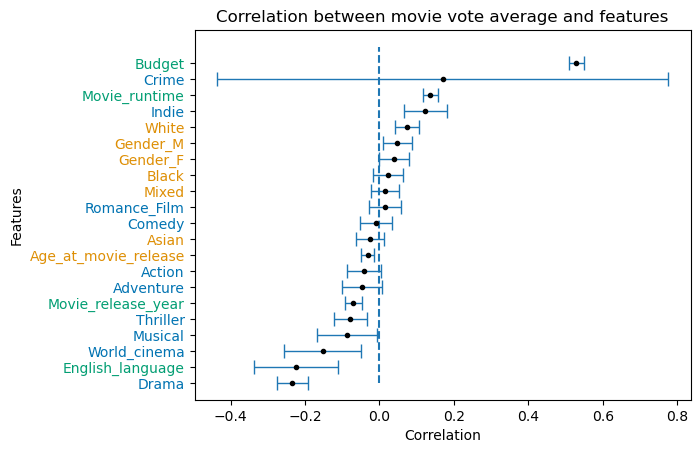

In [138]:
mod = smf.ols(formula='Success_score ~  Age_at_movie_release + Movie_runtime  + Movie_release_year + Budget +\
        C(English_language) + C(Gender_M) + C(Gender_F)+ C(Asian) + C(Black)+ \
        C(Mixed)+ C(White) + C(Action) + C(Adventure) + C(Comedy) + C(Crime) + C(Drama) + C(Indie) + \
        C(Romance_Film) + C(Musical) + C(Thriller) + C(World_cinema)', data=model_norm)
res = mod.fit()

# feature names
variables = res.params.index
# coefficients
coefficients = res.params.values
# p-values
p_values = res.pvalues
# standard errors
standard_errors = res.bse.values
# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

labels = []
for i in np.arange(0,len(l2)):
    if('(' in (l2[i])):
        label = l2[i].split('(')[1]
        label = label.split(')')[0]
        labels.append(label)
    else:
        labels.append(l2[i])
labels

# fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.yticks(range(len(l2)),labels)
plt.vlines(0,0, len(l1), linestyle = '--')
plt.title("Correlation between movie vote average and features")
plt.xlabel('Correlation')
plt.ylabel('Features')
for i in np.arange(0,len(labels)):
    if(labels[i] in movie_genres_labels):
        plt.gca().get_yticklabels()[i].set_color(colorblind[0])
    if(labels[i] in actor_labels):
        plt.gca().get_yticklabels()[i].set_color(colorblind[1])
    if(labels[i] in movie_labels):
        plt.gca().get_yticklabels()[i].set_color(colorblind[2])

Same as before, the actor characteristic isn't as important as the movie genre to impact the rating.

#### <a id='toc1_4_1_2'></a>[Movie analysis](#toc0_)

Now let's verify on characteristic of a movie can influence its box office.

In [139]:
%%capture
#Choose the features related to the movie
selected_features = ['Movie language','Movie countries','Movie genres', 'Budget',
                     'Box office revenue','Movie runtime','Movie release year','Success score',
                     'Gender Diversity Score', 'Ethnic Diversity Score']
model = characters_movies.drop_duplicates(subset='Wikipedia Movie ID')[selected_features]

In [140]:
#Remove the Nan and 0 values
print(f"Model size after processing : {model.shape[0]}")
model = model[model['Box office revenue'] != 0]
#Let's remove all the possible Nan values
model = model[model['Box office revenue'].notna()]
print(f"Model size after processing : {model.shape[0]}")

Model size after processing : 25174
Model size after processing : 6776


Contrary to the previous model, this dataset is really small after removing the Nan values from the Box office revenue. However we don't really have the choice as we can't do correlation analysis or use ML model with missing values.

In [141]:
#Remove the Nan and 0 values
model_processing = model.copy()
print(f"Model size after processing : {model_processing.shape[0]}")
model_processing = model_processing[model_processing['Budget'] != 0]
#Let's remove all the possible Nan values
model_processing = model_processing[model_processing['Budget'].notna()]
print(f"Model size after processing : {model_processing.shape[0]}")

Model size after processing : 6776
Model size after processing : 1693


Concerning the `Budget`, removing missing values lead to a data set extremly small (only almost 2000 data). Thus we have to take extra care when analysis the model features influence on the Box office revenue when taking `Budget` into account. Indeed it's really hard to generalize analysis when using such a small dataset.

Let's continue with the binarization process

In [142]:
#Binarize the language category
model.loc[:,'English language'] = model['Movie language'].apply(lambda x: 1 if 'english language' in x else 0)
#model.loc[:,'Hindi language'] = model['Movie language'].apply(lambda x: 1 if 'hindi language' in x else 0 )

#Binarize the country category
model.loc[:,'USA'] = model['Movie countries'].apply(lambda x: 1 if ('united states of america') in x else 0)
#model.loc[:,'India'] = model['Movie countries'].apply(lambda x: 1 if ('india') in x else 0)

#Binarize the genres category
for genre in main_genres.index:
    model[genre] = model['Movie genres'].apply(lambda x: 1 if genre in x else 0)

#Drop all the categorical columns
model = model.drop(columns=['Movie language','Movie countries','Movie genres'])

model = model.drop(columns= 'USA',axis=1)

##### <a id='toc1_4_1_1_1'></a>[Features selection and binarization](#toc0_)

Let's repear similair process but for the movies.  <br>
The first noticeable diference is that we're going to drop all the duplicate movies, which correspond to the different characters on the movie.

##### <a id='toc1_4_1_1_2'></a>[Features correlation analysis](#toc0_)

In [143]:
import statsmodels.formula.api as smf
#First standardize the features
model_norm = model.copy()
for column in model_norm.columns:
    model_norm[column] = (model[column] - model[column].mean())/model[column].std()
model_norm.columns = model_norm.columns.str.replace(' ','_')
model_norm.describe()

,Budget,Box_office_revenue,Movie_runtime,Movie_release_year,Success_score,Gender_Diversity_Score,Ethnic_Diversity_Score,English_language,Drama,Comedy,Romance_Film,Action,World_cinema,Thriller,Crime,Indie,Adventure,Musical
count,3.010000e+03,6.776000e+03,6.776000e+03,6.776000e+03,1.693000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03,6.776000e+03
mean,-9.442428e-18,-5.033361e-17,1.677787e-16,-4.194467e-15,1.259083e-17,7.214484e-16,-6.711147e-17,-1.677787e-17,-4.194467e-17,1.677787e-17,-4.194467e-17,-2.097234e-17,-1.677787e-17,3.355574e-17,1.153478e-17,4.823637e-17,-1.677787e-17,-9.437551e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.885348e-01,-4.729081e-01,-5.052930e+00,-3.277901e+00,-1.277358e+00,-1.139537e+00,-2.329661e+00,-3.486472e+00,-1.087573e+00,-8.216172e-01,-5.895777e-01,-5.509387e-01,-2.589917e-01,-6.061793e-01,-1.718147e-02,-3.960847e-01,-3.832724e-01,-2.385896e-01
25%,-5.885348e-01,-4.447573e-01,-6.483229e-01,-3.989402e-01,-4.454840e-01,-1.139537e+00,-1.114803e+00,2.867806e-01,-1.087573e+00,-8.216172e-01,-5.895777e-01,-5.509387e-01,-2.589917e-01,-6.061793e-01,-1.718147e-02,-3.960847e-01,-3.832724e-01,-2.385896e-01
50%,-4.832436e-01,-3.415449e-01,-1.819527e-01,2.895069e-01,-3.221005e-01,1.850628e-01,1.000546e-01,2.867806e-01,9.193428e-01,-8.216172e-01,-5.895777e-01,-5.509387e-01,-2.589917e-01,-6.061793e-01,-1.718147e-02,-3.960847e-01,-3.832724e-01,-2.385896e-01
75%,1.934277e-01,-2.531761e-02,4.398742e-01,7.901958e-01,3.578304e-02,8.473628e-01,7.074836e-01,2.867806e-01,9.193428e-01,1.216932e+00,1.695879e+00,-5.509387e-01,-2.589917e-01,1.649433e+00,-1.718147e-02,-3.960847e-01,-3.832724e-01,-2.385896e-01
max,1.114090e+01,1.998890e+01,6.761781e+00,1.165712e+00,1.011025e+01,1.509663e+00,2.529771e+00,2.867806e-01,9.193428e-01,1.216932e+00,1.695879e+00,1.814816e+00,3.860557e+00,1.649433e+00,5.819364e+01,2.524340e+00,2.608725e+00,4.190679e+00


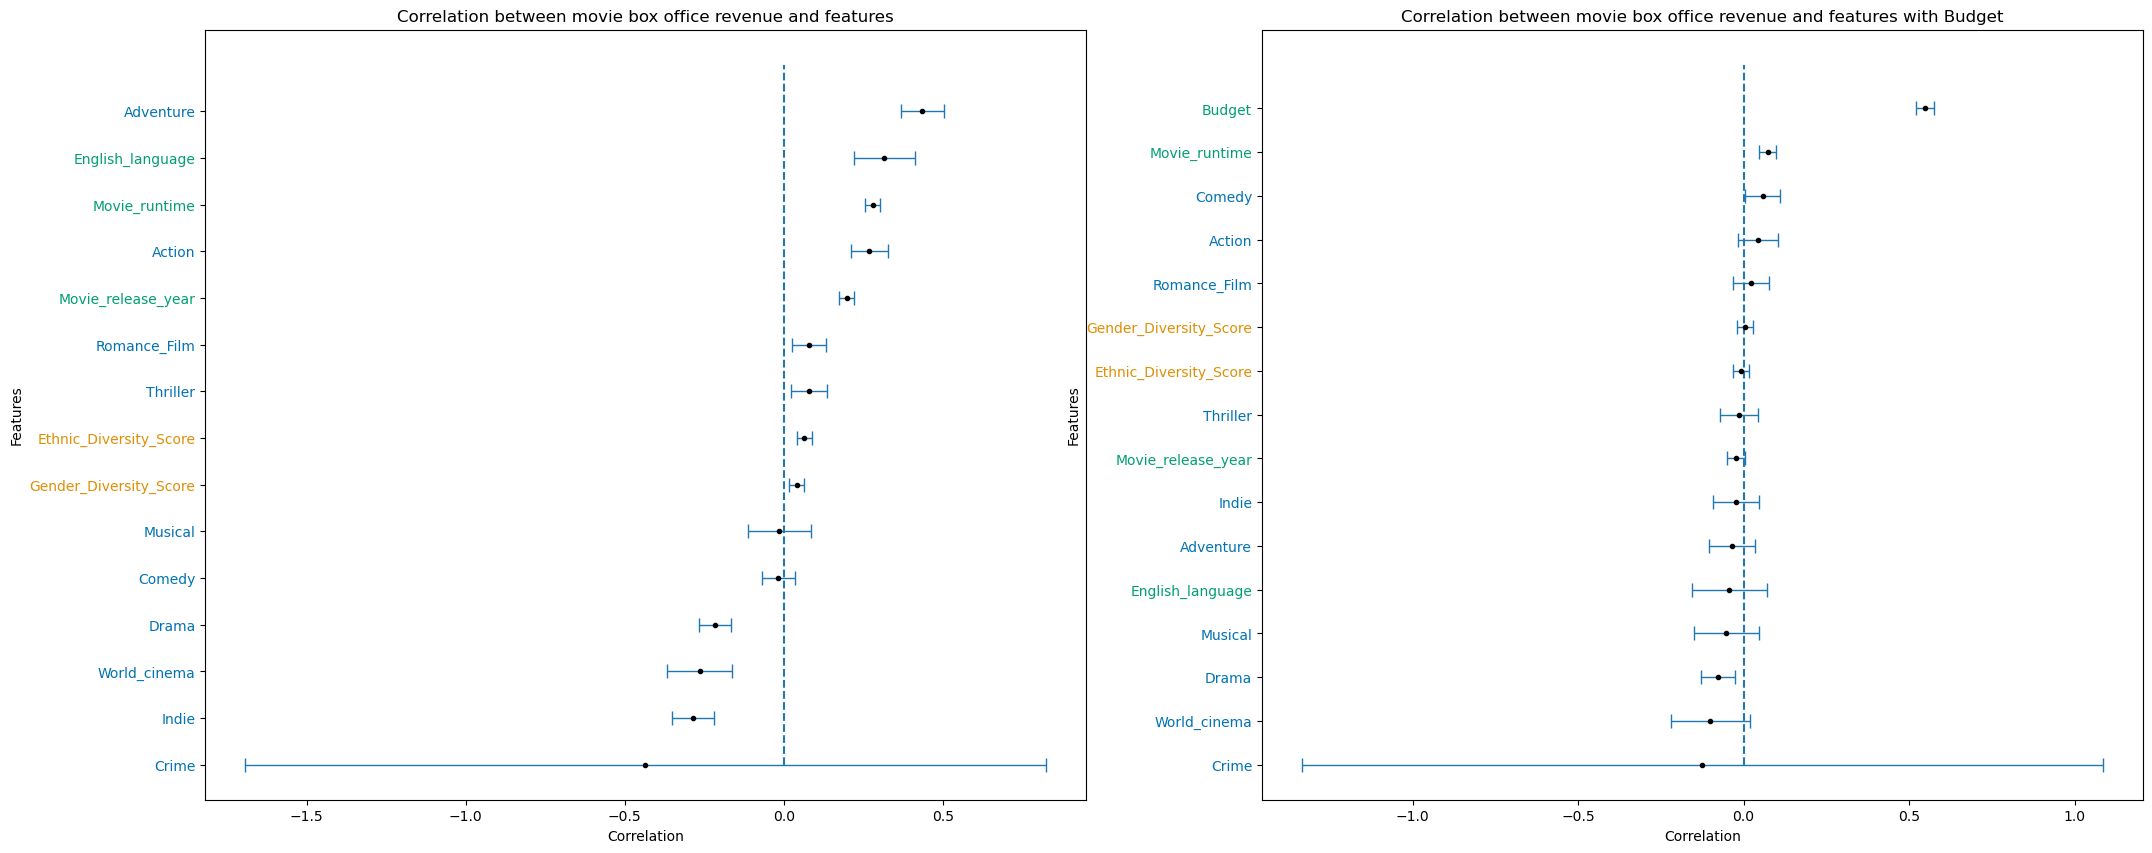

In [144]:
mod = smf.ols(formula='Box_office_revenue ~   Movie_runtime  + Movie_release_year +\
                C(English_language)  + Gender_Diversity_Score + Ethnic_Diversity_Score	+ \
                C(Action) + C(Adventure) + C(Comedy) + C(Crime) + C(Drama) + C(Indie) + \
                C(Romance_Film) + C(Musical) + C(Thriller) + C(World_cinema)', data=model_norm)
res = mod.fit()

# feature names
variables = res.params.index

# coefficients
coefficients = res.params.values
# p-values
p_values = res.pvalues
# standard errors
standard_errors = res.bse.values

# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

labels = []
for i in np.arange(0,len(l2)):
    if('(' in (l2[i])):
        label = l2[i].split('(')[1]
        label = label.split(')')[0]
        labels.append(label)
    else:
        labels.append(l2[i])

#Let's plot the results
fig, axs = plt.subplots(1,2,figsize = (25,10))        

axs[0].errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
        linestyle = 'none',marker = 'o',markersize= 3,
        markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

axs[0].set_yticks(range(len(l2)),labels)
axs[0].vlines(0,0, len(l1), linestyle = '--')
axs[0].set_title("Correlation between movie box office revenue and features")
axs[0].set_xlabel('Correlation')
axs[0].set_ylabel('Features')

#Let's colorate the axis depending on the categorie
movie_genres_labels = ['Adventure','Action','Romance_Film','Thriller','Musical','Comedy','Crime','Indie','Drama','World_cinema']
diversity_labels = ['Gender_Diversity_Score','Ethnic_Diversity_Score']
movie_labels =['English_language','Movie_runtime','Movie_release_year','Budget']
colorblind = sns.color_palette("colorblind")

for i in np.arange(0,len(labels)):
    if(labels[i] in movie_genres_labels):
        axs[0].get_yticklabels()[i].set_color(colorblind[0])
    if(labels[i] in diversity_labels):
        axs[0].get_yticklabels()[i].set_color(colorblind[1])
    if(labels[i] in movie_labels):
        axs[0].get_yticklabels()[i].set_color(colorblind[2])

#Repeat the process but adding the Budget
mod = smf.ols(formula='Box_office_revenue ~  Movie_runtime  + Movie_release_year + Budget +\
                C(English_language)  + Gender_Diversity_Score + Ethnic_Diversity_Score	+ \
                C(Action) + C(Adventure) + C(Comedy) + C(Crime) + C(Drama) + C(Indie) + \
                C(Romance_Film) + C(Musical) + C(Thriller) + C(World_cinema)', data=model_norm)
res = mod.fit()

# feature names
variables = res.params.index

# coefficients
coefficients = res.params.values
# p-values
p_values = res.pvalues
# standard errors
standard_errors = res.bse.values

# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

labels = []
for i in np.arange(0,len(l2)):
    if('(' in (l2[i])):
        label = l2[i].split('(')[1]
        label = label.split(')')[0]
        labels.append(label)
    else:
        labels.append(l2[i])

axs[1].errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
        linestyle = 'none',marker = 'o',markersize= 3,
        markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

axs[1].set_yticks(range(len(l2)),labels)
axs[1].vlines(0,0, len(l1), linestyle = '--')
axs[1].set_title("Correlation between movie box office revenue and features with Budget")
axs[1].set_xlabel('Correlation')
axs[1].set_ylabel('Features')


#Let's colorate the axis depending on the categorie
for i in np.arange(0,len(labels)):
    if(labels[i] in movie_genres_labels):
        axs[1].get_yticklabels()[i].set_color(colorblind[0])
    if(labels[i] in diversity_labels):
        axs[1].get_yticklabels()[i].set_color(colorblind[1])
    if(labels[i] in movie_labels):
        axs[1].get_yticklabels()[i].set_color(colorblind[2])

We notice that in both figures, the features related to the diverstiy (`Ethnic diversity score` and `Gender diversity score`) have a correlation coefficient really close to 0, meaning that theit impact on the `Box office revenue` is really small and almost negligeable (especially for the situation where we take the budget into acccount).
One more time, it seems that the diversity has negligeable impact on the `Box office revenue`.

### <a id='toc1_4_2_'></a>[Linear regression models](#toc0_)

#### <a id='toc1_4_2_1'></a>[No Budget involved](#toc0_)

In this section we will delve into the creation of ML algorithm that can predict the box office revenue based on the movie features. For this part, we're going to the same model as before, which means the model were we drop the character and only kept informations relative to the movie. 

#The analysis of the movie success will be based on the box office revenue and therefore we need to remove any outliners that could bias our analysis

In [145]:
"""plt.hist(model['Box office revenue'], bins=100)
plt.title("Distribution of the box office revenue of movies")
plt.xlabel("Box office revenue")
plt.ylabel("Number")"""

'plt.hist(model[\'Box office revenue\'], bins=100)\nplt.title("Distribution of the box office revenue of movies")\nplt.xlabel("Box office revenue")\nplt.ylabel("Number")'

"""
As we can see, most movie have a box office revenue smaller than 1e9 but few of them have a higher one up to 2e9 for the best one (Titanic). <br>
For future training we would like to keep resonable values that can be used to allow the model predict values accuratly. Outliners have a high risk of pertubating the estimation. <br>
Thus let's remove movies with a box office than 0.5e9.
"""

In [146]:
#model = model[model['Box office revenue'] < 0.5e9]

**Better prediction if we don't remove outliners.**

Let's now set up the model

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#To be sure that we fit the noramlized fromat required for the machine learning models, let's use the scaler to transform the data
scaler = StandardScaler()

# Let's first create a new dataset with the features we want to use 
#We selected the features that either interest us or that where to have the impact on the Box office revenue
model_reg = model.copy()[['Box office revenue','Movie release year', 'Ethnic Diversity Score',
                           'Gender Diversity Score','Adventure','English language','Movie runtime', 'Indie',
                           'World cinema','Action','Drama']]

# For now we're removing the Budget and the Success score from our model
scaler = scaler.fit(model_reg.drop(columns=['Box office revenue'],axis=1))

# Create a new dataframe with the standardized data
model_reg = pd.DataFrame(model_reg, columns=model_reg.columns)

# Separate the data into X and Y
X = model_reg.drop(columns=['Box office revenue'],axis=1)
Y = model_reg['Box office revenue']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [148]:
""" 
# Create a "success score" with ML. Analyste teh success score Y with the following features:
# ['Gender', 'Age at movie release' , 'Ethnic Group',
# 'Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Unique ethnicity'] 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Let's first create a new dataset with the features we want to use
model_reg = characters_movies.copy()[['Budget', 'Vote average', 'Box office revenue', \
                                                'Movie release year', 'Ethnic Diversity Score', 'Gender Diversity Score']]
# drop the NaN values
model_reg = model_reg.dropna()
# Drop values with Budget 0 or Box office revenue 0
model_reg['Budget'] = model_reg['Budget'].astype(float)
model_reg = model_reg[model_reg['Budget'] != 0]
success_score = success_score[success_score['Box office revenue'] < 5000]
model_reg = model_reg[model_reg['Box office revenue'] != 0]


scaler = StandardScaler()
# Use scaler to standardize the data
# Standardize the data using the scaler
scaled_data = scaler.fit_transform(model_reg[['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Ethnic Diversity Score', 'Gender Diversity Score']])

# Create a new dataframe with the standardized data
scaled_success_score = pd.DataFrame(scaled_data, columns=['Budget', 'Vote average', 'Box office revenue', 'Movie release year', 'Ethnic Diversity Score', 'Gender Diversity Score'])

# Add the 'Success Score' column to the scaled dataframe
#scaled_success_score['Success Score'] = success_score['Success Score'].reset_index(drop=True)

# Print the scaled success score dataframe
scaled_success_score.head()

# Separate the data into X and Y
#X = success_score[success_score.columns[:-1]]
#Y = success_score['Success Score']
X = model_reg.drop(columns='Box office revenue',axis=1)
Y = model_reg['Box office revenue']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
"""

' \n# Create a "success score" with ML. Analyste teh success score Y with the following features:\n# [\'Gender\', \'Age at movie release\' , \'Ethnic Group\',\n# \'Budget\', \'Vote average\', \'Box office revenue\', \'Movie release year\', \'Unique ethnicity\'] \nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\n\n# Let\'s first create a new dataset with the features we want to use\nmodel_reg = characters_movies.copy()[[\'Budget\', \'Vote average\', \'Box office revenue\',                                                 \'Movie release year\', \'Ethnic Diversity Score\', \'Gender Diversity Score\']]\n# drop the NaN values\nmodel_reg = model_reg.dropna()\n# Drop values with Budget 0 or Box office revenue 0\nmodel_reg[\'Budget\'] = model_reg[\'Budget\'].astype(float)\nmodel_reg = model_reg[model_reg[\'Budget\'] != 0]\nsuccess_score = success_scor

R2 score: 0.21820404630330392


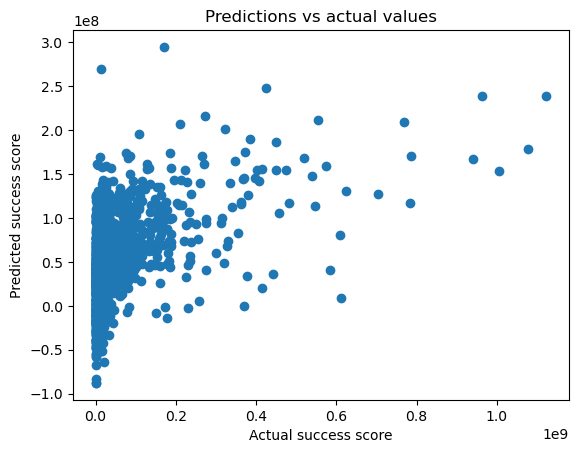

In [149]:
# Make predictions on the test set. Make pipeline to include scalar
# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)
predictions
# Compute the R2 score and print it
r2 = pipeline.score(X_test, Y_test)
print(f"R2 score: {r2}")

# Plot the predictions vs the actual values
plt.scatter(Y_test, predictions)
plt.xlabel('Actual success score')
plt.ylabel('Predicted success score')
plt.title('Predictions vs actual values')

plt.show()

>lr 0.203 (0.018)
>lasso 0.203 (0.018)
>ridge 0.203 (0.018)
>en 0.189 (0.021)


>svr -0.120 (0.016)
>rf 0.218 (0.123)


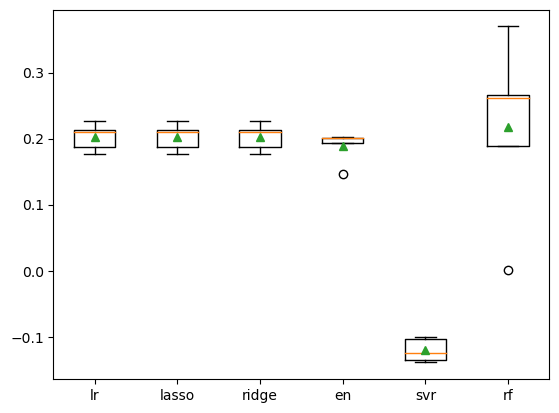

In [150]:
# train with other models for regression:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


models = dict()
models['lr'] = LinearRegression()
models['lasso'] = Lasso()
models['ridge'] = Ridge()
models['en'] = ElasticNet()
models['svr'] = SVR()
models['rf'] = RandomForestRegressor()

# evaluate the models and store results
results, names = list(), list()

for name, ml_model in models.items():
    # create a pipeline with scaling and the model
    pipeline = make_pipeline(scaler, ml_model)
    

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipeline, X_train, Y_train, cv=5)

    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

R2 score: 0.30339354408985


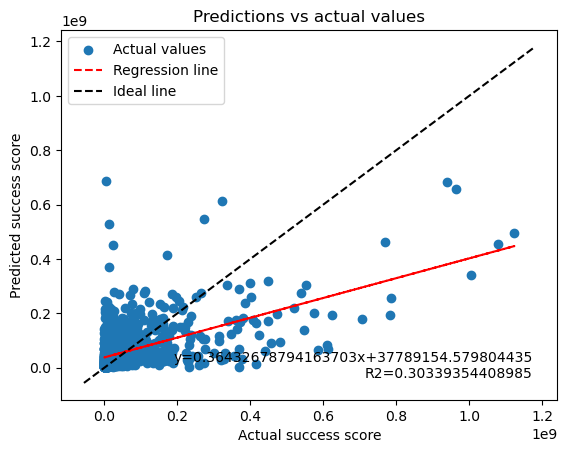

In [151]:
# Choose the best model
best_model = models['rf']
pipeline = make_pipeline(scaler, best_model)
    
pipeline.fit(X_train, Y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)
predictions
# Compute the R2 score and print it
r2 = pipeline.score(X_test, Y_test)
print(f"R2 score: {r2}")

# Plot the predictions vs the actual values
plt.scatter(Y_test, predictions)
# Add regression line
z = np.polyfit(Y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"r--")
# Add line equation and r2
plt.text(0.95, 0.05, f"y={z[0]}x+{z[1]}\nR2={r2}", fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes)
# Now draw ideal line of slope 1
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', linestyle='--')

plt.legend(['Actual values','Regression line', 'Ideal line'])
plt.xlabel('Actual success score')
plt.ylabel('Predicted success score')
plt.title('Predictions vs actual values')
plt.show()

The prediction has a low R2 score, meaning that the model really has trouble predicting the `Box office revenue` using the movie features. 
This indicate that it seems actually hard to predict a movie based on its features. We were able to see what features influence the `Box office revenue` but predicting it using these features is way harder.

In [152]:
#This part is too long to run 
"""# Python
# conda install shap in case you do not have it installed
import shap

# Create a TreeExplainer object
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


# Plot the SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")"""

'# Python\n# conda install shap in case you do not have it installed\nimport shap\n\n# Create a TreeExplainer object\nexplainer = shap.TreeExplainer(best_model)\n\n# Compute SHAP values\nshap_values = explainer.shap_values(X_train)\n\n\n# Plot the SHAP values\nshap.summary_plot(shap_values, X_train, plot_type="bar")'

#### <a id='toc1_4_2_2'></a>[Budget involved](#toc0_)

Now let's repeat the same analysis but using the budget in our features. <br>
Thus we should reminder to remove Nan and 0 values from the `Budget`.

In [153]:
#Remove the Nan and 0 values
print(f"Model size after processing : {model.shape[0]}")
model = model[model['Budget'] != 0]
#Let's remove all the possible Nan values
model = model[model['Budget'].notna()]
print(f"Model size after processing : {model.shape[0]}")

Model size after processing : 6776
Model size after processing : 1693


Text(0, 0.5, 'Number')

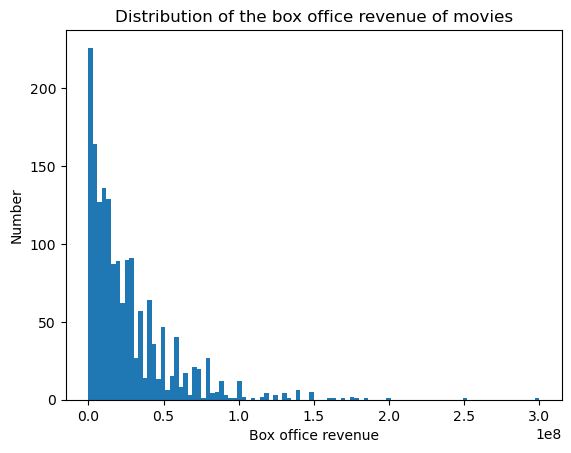

In [154]:
plt.hist(model['Budget'], bins=100)
plt.title("Distribution of the box office revenue of movies")
plt.xlabel("Box office revenue")
plt.ylabel("Number")

The distribution of the Budget seems realist and doen't need any further processing.

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#To be sure that we fit the normalized fromat required for the machine learning models, let's use the scaler to transform the data
scaler = StandardScaler()

# Let's first create a new dataset with the features we want to use 
#We selected the features that either interest us or that where to have the impact on the Box office revenue
model_reg = model.copy()[['Budget','Box office revenue','Movie release year', 'Ethnic Diversity Score',
                           'Gender Diversity Score','Adventure','English language','Movie runtime', 'Indie',
                           'World cinema','Action','Drama']]

X = model_reg.drop(columns=['Box office revenue'],axis=1)
Y = model_reg['Box office revenue']

# For now we're removing the Budget and the Success score from our model
scaler = scaler.fit(X)

# Create a new dataframe with the standardized data
model_reg = pd.DataFrame(model_reg, columns=model_reg.columns)

# Separate the data into X and Y
X = model_reg.drop(columns=['Box office revenue'],axis=1)
Y = model_reg['Box office revenue']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

>lr 0.389 (0.033)
>lasso 0.389 (0.033)
>ridge 0.389 (0.033)
>en 0.348 (0.021)
>svr -0.145 (0.023)


>rf 0.312 (0.027)


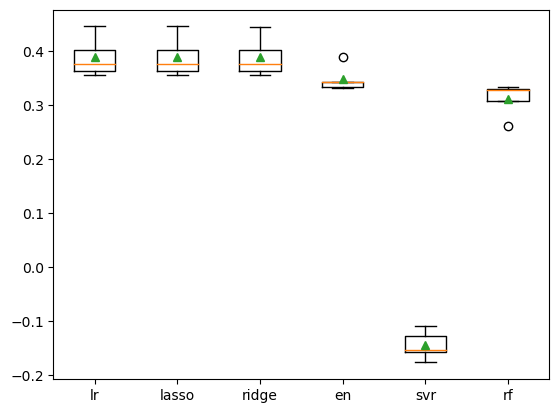

In [156]:
# train with other models for regression:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


models = dict()
models['lr'] = LinearRegression()
models['lasso'] = Lasso()
models['ridge'] = Ridge()
models['en'] = ElasticNet()
models['svr'] = SVR()
models['rf'] = RandomForestRegressor()

# evaluate the models and store results
results, names = list(), list()

for name, ml_model in models.items():
    # create a pipeline with scaling and the model
    pipeline = make_pipeline(scaler, ml_model)
    

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipeline, X_train, Y_train, cv=5)

    
    # store the results
    results.append(scores)
    names.append(name)
    
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

R2 score: 0.6132148793573358


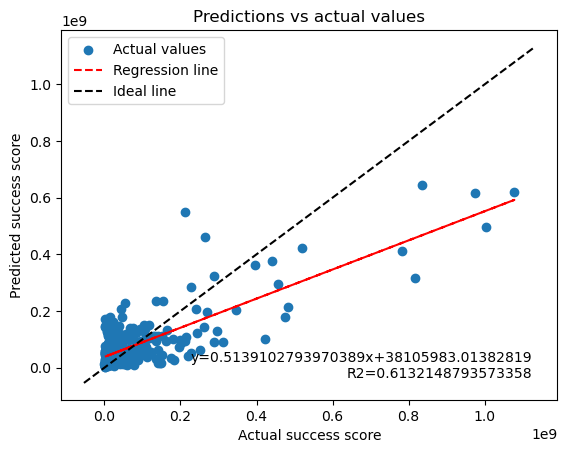

In [163]:
import joblib

# Choose the best model
best_model = models['rf']
pipeline = make_pipeline(scaler, best_model)
    
pipeline.fit(X_train, Y_train)

# Save the pipeline
joblib.dump(pipeline, './Models/linear_regression_model.pkl')
    
# Make predictions on the test set
predictions = pipeline.predict(X_test)
predictions
# Compute the R2 score and print it
r2 = pipeline.score(X_test, Y_test)
print(f"R2 score: {r2}")

# Plot the predictions vs the actual values
plt.scatter(Y_test, predictions)
# Add regression line
z = np.polyfit(Y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"r--")
# Add line equation and r2
plt.text(0.95, 0.05, f"y={z[0]}x+{z[1]}\nR2={r2}", fontsize=10, ha='right', va='bottom', transform=plt.gca().transAxes)
# Now draw ideal line of slope 1
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black', linestyle='--')

plt.legend(['Actual values','Regression line', 'Ideal line'])
plt.xlabel('Actual success score')
plt.ylabel('Predicted success score')
plt.title('Predictions vs actual values')
plt.show()

The `Budget` makes the `Box office revenue` prediction more accurate however this process isn't perfect.

In [164]:
# Python
# conda install shap in case you do not have it installed
import shap

# Create a TreeExplainer object
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


# shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(10, 6), show=False)


# plt.xlabel("Mean SHAP value")

# # Show the plot
# plt.show()


In [165]:
import plotly.express as px

# Create a DataFrame with the SHAP values and feature names
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# Calculate the mean SHAP values
mean_shap_values = shap_df.abs().mean()

# Sort the mean SHAP values in descending order
sorted_shap_values = mean_shap_values.sort_values(ascending=False)

# Create a bar plot using Plotly
fig = px.bar(sorted_shap_values, orientation='h')

# Set the x-axis label to "Mean SHAP value"
fig.update_layout(xaxis_title="Mean SHAP value")
# Remove the legend
fig.update_layout(showlegend=False)
# Save the plot as an HTML file
fig.write_html("./Graphs_html/shap_summary_plot.html")

# Display the plot
fig.show()

The features that the model relied the most on was the `Budget`, the `Movie runtime` and the `Movie release year`. The `Gender Diversity score` and the `Ethnic Diversity score` only appear after that and they have as much weight as the `Drama` categorie. 
In conclusion, we can say that movie Box office revenue mostly depends on pratical features, mostly the Budget, but also the runtime, the release year and the genre. In all our analysis we found that diversity wasn't a main factors impacting the Box office revenue.